<a href="https://colab.research.google.com/github/P-197-719-971-C/Predicting_home_prices_nationally/blob/main/Home_prices_in_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home Prices in USA Analysis

## Table of Contents
* [Factors affecting USA home prices (Demand and Supply)](#(A)-Factors-affecting-US-Home-prices)
    1. [Housing Subsidies (Yearly)](#Housing-Subsidies)
    2. [Interest Rates (Monthly)](#Interest-Rates)
    3. [Unemployment Rate (Monthly)](#Unemployment-Rate)
    4. [Per Capita GDP (Monthly)](#Per-Capita-GDP)
    5. [Construction Price Index (Monthly)](#Construction-price-index)
    6. [Consumer Price Index (CPI) (Monthly)](#Consumer-Price-Index-(CPI))
    7. [Monthly New Household (Monthly)](#Monthly-New-Household)
    8. [Population above 65 (Yearly)](#Population-above-65)
    9. [Urban Population Percentage (Yearly)](#Urban-Population-Percentage)
    10. [Working Age Population (Monthly)](#Working-Age-Population)
    11. [Real Median Household Income (Monthly)](#Real-Median-Household-Income)
    12. [Number of Households (Yearly)](#Number-of-Households)
* [Data Merging](#(B)-Merging-Data)
* [Filling Missing Data](#Filling-Missing-Values)
* [Exploratory Data Analysis (EDA)](#EDA)
* [Scaling Factors](#Scaling-factors)
* [Dimensionality Reduction](#Dimensionality-Reduction)
* [Model Training](#Model-Training)
* [Summary](#Summary)

Data Sources
1.   https://fred.stlouisfed.org/
2.   https://data.worldbank.org/



##  As a proxy to the home prices, S&P CASE-SHILLER Index is used.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading CASE-SHILLER Index into a dataframe
df_CS = pd.read_csv("CSUSHPISA.csv")

#Changing dtype of date column
df_CS["DATE"] = pd.to_datetime(df_CS["DATE"])

#Selecting data post JUNE 2001
mask = df_CS["DATE"] > "2000-12-12"
df_CS = df_CS[mask]

#Resetting Index
df_CS.reset_index(inplace = True)
df_CS.drop(columns = ["index"], inplace = True)

# Creating "Year" and "Month" columns
df_CS["Year"] = pd.DatetimeIndex(df_CS["DATE"]).year
df_CS["Month"] = pd.DatetimeIndex(df_CS["DATE"]).month
print(df_CS.shape)
df_CS.head()

(278, 4)


<ipython-input-2-09102c1e355e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CS.drop(columns = ["index"], inplace = True)
<ipython-input-2-09102c1e355e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CS["Year"] = pd.DatetimeIndex(df_CS["DATE"]).year
<ipython-input-2-09102c1e355e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

DATE  CSUSHPISA  Year  Month
0 2001-01-01    109.846  2001      1
1 2001-02-01    110.501  2001      2
2 2001-03-01    111.109  2001      3
3 2001-04-01    111.651  2001      4
4 2001-05-01    112.163  2001      5

In [3]:
df_CS.shape

(278, 4)

In [4]:
df_CS.tail()

DATE  CSUSHPISA  Year  Month
273 2023-10-01    312.946  2023     10
274 2023-11-01    313.629  2023     11
275 2023-12-01    314.338  2023     12
276 2024-01-01    315.297  2024      1
277 2024-02-01    316.576  2024      2

In [5]:
df_CS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE       278 non-null    datetime64[ns]
 1   CSUSHPISA  278 non-null    float64       
 2   Year       278 non-null    int32         
 3   Month      278 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(2)
memory usage: 6.6 KB


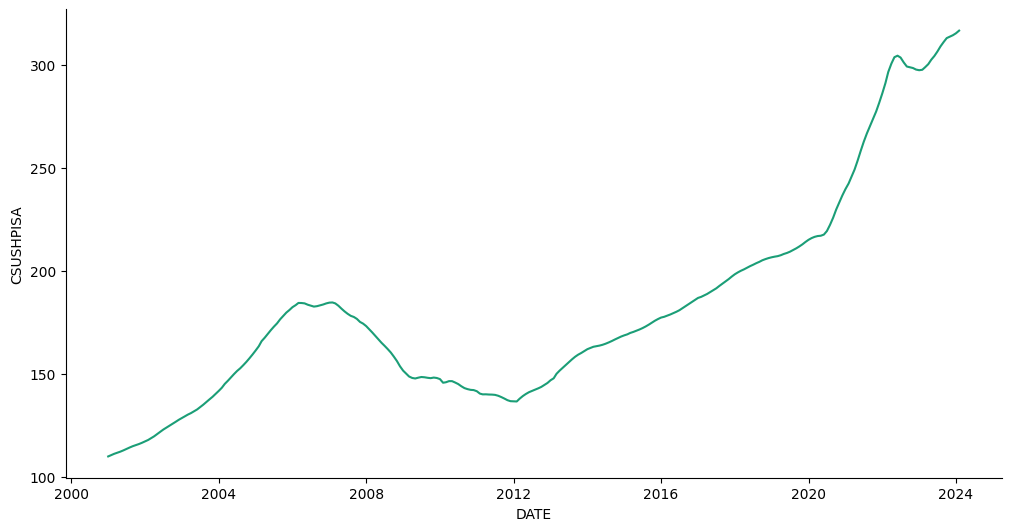

In [6]:
# @title DATE vs CSUSHPISA

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DATE']
  ys = series['CSUSHPISA']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_CS.sort_values('DATE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DATE')
_ = plt.ylabel('CSUSHPISA')

# (A) Factors affecting US Home prices

## Housing Subsidies

In [7]:
df_subsidy = pd.read_csv("housing_subsidy.csv", names = ["DATE", "Subsidy"], skiprows = 1)
print(df_subsidy.shape)
df_subsidy.head()

(63, 2)


DATE  Subsidy
0  1960-01-01    0.146
1  1961-01-01    0.159
2  1962-01-01    0.176
3  1963-01-01    0.195
4  1964-01-01    0.210

In [8]:
df_subsidy.shape

(63, 2)

In [9]:
df_subsidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     63 non-null     object 
 1   Subsidy  63 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [10]:
df_subsidy.isna().sum()

DATE       0
Subsidy    0
dtype: int64

In [11]:
df_subsidy["DATE"] = df_subsidy["DATE"].astype("datetime64[ns]")

In [12]:
df_subsidy = df_subsidy[df_subsidy["DATE"] > '2000-12-12']

In [13]:
df_subsidy.shape

(22, 2)

In [14]:
df_subsidy.head()

DATE  Subsidy
41 2001-01-01   20.573
42 2002-01-01   24.183
43 2003-01-01   25.930
44 2004-01-01   27.201
45 2005-01-01   27.651

In [15]:
df_subsidy.dtypes

DATE       datetime64[ns]
Subsidy           float64
dtype: object

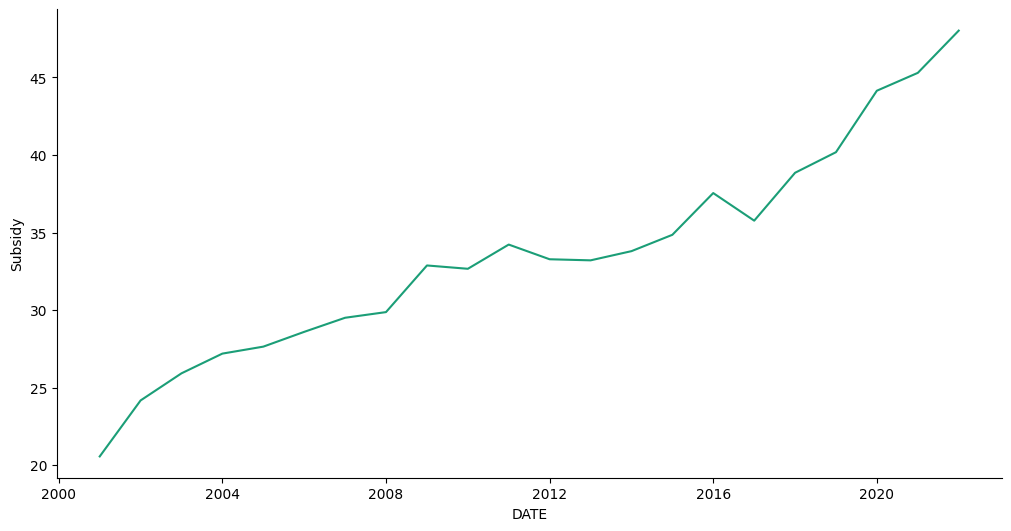

In [16]:
# @title DATE vs Subsidy

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DATE']
  ys = series['Subsidy']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_subsidy.sort_values('DATE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DATE')
_ = plt.ylabel('Subsidy')

## Interest Rates

In [17]:
# Interest Rate Data
df_Fed_rate = pd.read_csv("interest_rate.csv").drop([252,253])
print(df_Fed_rate.shape)
df_Fed_rate.head()

(836, 2)


DATE  FEDFUNDS
0  1954-07-01      0.80
1  1954-08-01      1.22
2  1954-09-01      1.07
3  1954-10-01      0.85
4  1954-11-01      0.83

In [18]:
df_Fed_rate.shape

(836, 2)

In [19]:
df_Fed_rate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 836 entries, 0 to 837
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      836 non-null    object 
 1   FEDFUNDS  836 non-null    float64
dtypes: float64(1), object(1)
memory usage: 51.9+ KB


In [20]:
df_Fed_rate["DATE"] = df_Fed_rate["DATE"].astype("datetime64[ns]")

In [21]:
df_Fed_rate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 836 entries, 0 to 837
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DATE      836 non-null    datetime64[ns]
 1   FEDFUNDS  836 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 51.9 KB


In [22]:
df_Fed_rate.isna().sum()

DATE        0
FEDFUNDS    0
dtype: int64

In [23]:
df_Fed_rate = df_Fed_rate[df_Fed_rate["DATE"] > '2000-12-12']

In [24]:
df_Fed_rate.head()

DATE  FEDFUNDS
558 2001-01-01      5.98
559 2001-02-01      5.49
560 2001-03-01      5.31
561 2001-04-01      4.80
562 2001-05-01      4.21

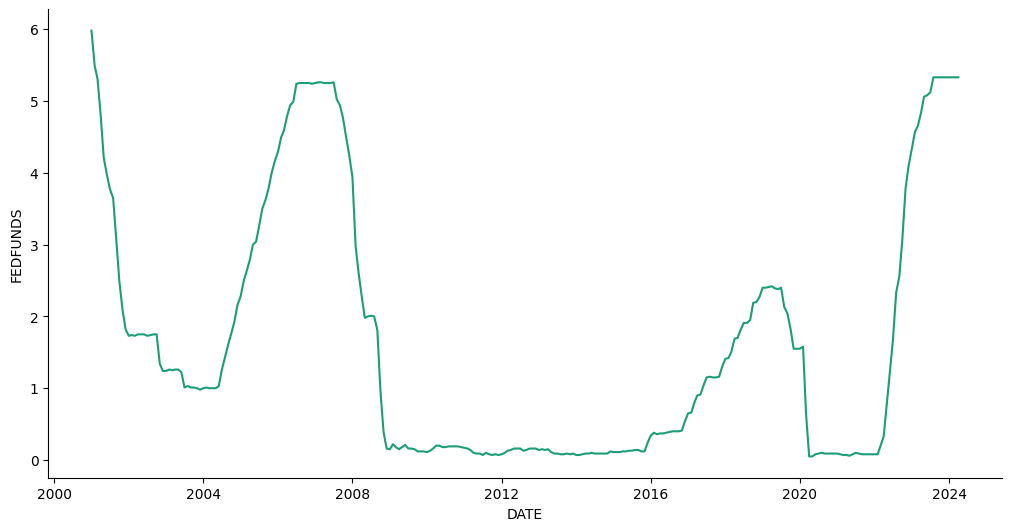

In [25]:
# @title DATE vs FEDFUNDS

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DATE']
  ys = series['FEDFUNDS']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_Fed_rate.sort_values('DATE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DATE')
_ = plt.ylabel('FEDFUNDS')

## Unemployment Rate

In [26]:
# Reading Unemployment Rate Data into a dataframe
df_unemp = pd.read_csv("UNRATE.csv")
df_unemp.drop([252,253], inplace = True)
print(df_unemp.shape)
df_unemp.head()

(914, 2)


DATE  UNRATE
0  1948-01-01     3.4
1  1948-02-01     3.8
2  1948-03-01     4.0
3  1948-04-01     3.9
4  1948-05-01     3.5

In [27]:
df_unemp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 914 entries, 0 to 915
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    914 non-null    object 
 1   UNRATE  914 non-null    float64
dtypes: float64(1), object(1)
memory usage: 53.7+ KB


In [28]:
df_unemp.isna().sum()

DATE      0
UNRATE    0
dtype: int64

In [29]:
df_unemp["DATE"] = df_unemp["DATE"].astype("datetime64[ns]")

In [30]:
df_unemp = df_unemp[df_unemp["DATE"] > '2000-12-12']

In [31]:
df_unemp.head()

DATE  UNRATE
636 2001-01-01     4.2
637 2001-02-01     4.2
638 2001-03-01     4.3
639 2001-04-01     4.4
640 2001-05-01     4.3

In [32]:
df_unemp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 636 to 915
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    280 non-null    datetime64[ns]
 1   UNRATE  280 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.6 KB


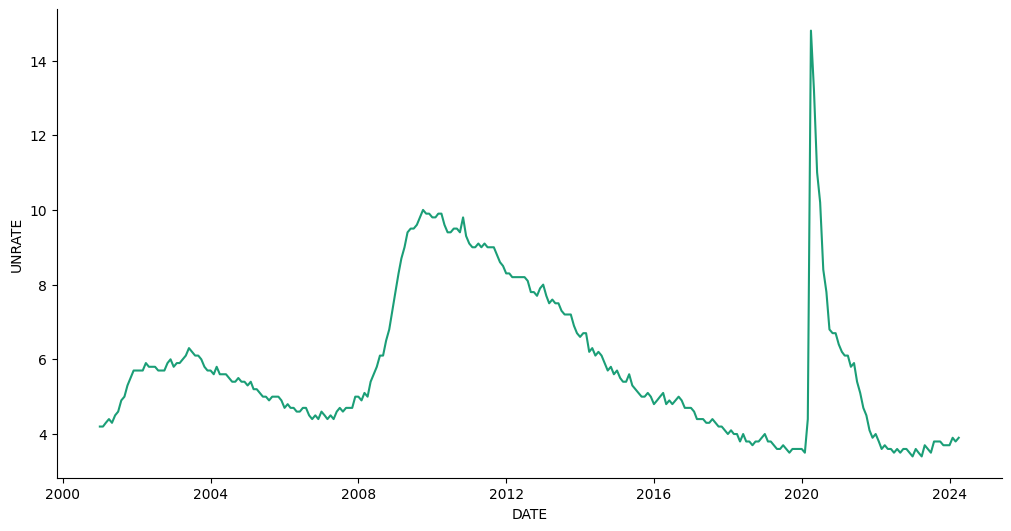

In [33]:
# @title DATE vs UNRATE

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DATE']
  ys = series['UNRATE']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_unemp.sort_values('DATE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DATE')
_ = plt.ylabel('UNRATE')

## Per Capita GDP

In [34]:
# Reading Per Capita GDP Data into a dataframe
df_pcgdp = pd.read_csv("per_capita_gdp.csv", names = ["DATE", "Per_Capita_GDP"], skiprows = 1)
print(df_pcgdp.shape)
df_pcgdp.head()

(309, 2)


DATE  Per_Capita_GDP
0  1947-01-01         15248.0
1  1947-04-01         15139.0
2  1947-07-01         15039.0
3  1947-10-01         15204.0
4  1948-01-01         15371.0

In [35]:
df_pcgdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATE            309 non-null    object 
 1   Per_Capita_GDP  309 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.0+ KB


In [36]:
df_pcgdp.isna().sum()

DATE              0
Per_Capita_GDP    0
dtype: int64

In [37]:
df_pcgdp["DATE"] = df_pcgdp["DATE"].astype("datetime64[ns]")

In [38]:
df_pcgdp = df_pcgdp[df_pcgdp["DATE"] > '2000-12-12']

In [39]:
df_pcgdp.head()

DATE  Per_Capita_GDP
216 2001-01-01         49911.0
217 2001-04-01         50105.0
218 2001-07-01         49774.0
219 2001-10-01         49783.0
220 2002-01-01         50091.0

In [40]:
df_pcgdp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93 entries, 216 to 308
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            93 non-null     datetime64[ns]
 1   Per_Capita_GDP  93 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.2 KB


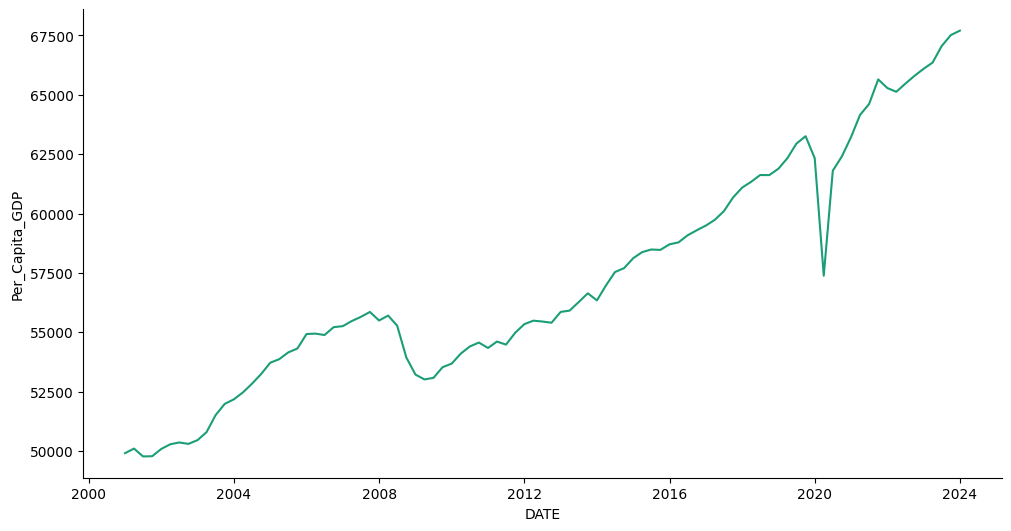

In [41]:
# @title DATE vs Per_Capita_GDP

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DATE']
  ys = series['Per_Capita_GDP']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_pcgdp.sort_values('DATE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DATE')
_ = plt.ylabel('Per_Capita_GDP')

## Construction price index

In [42]:
# Reading Per Capita GDP Data into a dataframe
df_cons_price_index = pd.read_csv("construction_price_index.csv", names = ["DATE", "Cons_Materials"], skiprows = 1)
df_cons_price_index.drop([252], inplace = True)
print(df_cons_price_index.shape)
df_cons_price_index.head()

(927, 2)


DATE  Cons_Materials
0  1947-01-01            22.2
1  1947-02-01            22.5
2  1947-03-01            22.9
3  1947-04-01            23.2
4  1947-05-01            23.3

In [43]:
df_cons_price_index.info()

<class 'pandas.core.frame.DataFrame'>
Index: 927 entries, 0 to 927
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATE            927 non-null    object 
 1   Cons_Materials  927 non-null    float64
dtypes: float64(1), object(1)
memory usage: 54.0+ KB


In [44]:
df_cons_price_index.isna().sum()

DATE              0
Cons_Materials    0
dtype: int64

In [45]:
df_cons_price_index["DATE"] = df_cons_price_index["DATE"].astype("datetime64[ns]")

In [46]:
df_cons_price_index = df_cons_price_index[df_cons_price_index["DATE"] > '2000-12-12']

In [47]:
df_cons_price_index.head()

DATE  Cons_Materials
648 2001-01-01           142.0
649 2001-02-01           142.4
650 2001-03-01           142.4
651 2001-04-01           142.5
652 2001-05-01           144.2

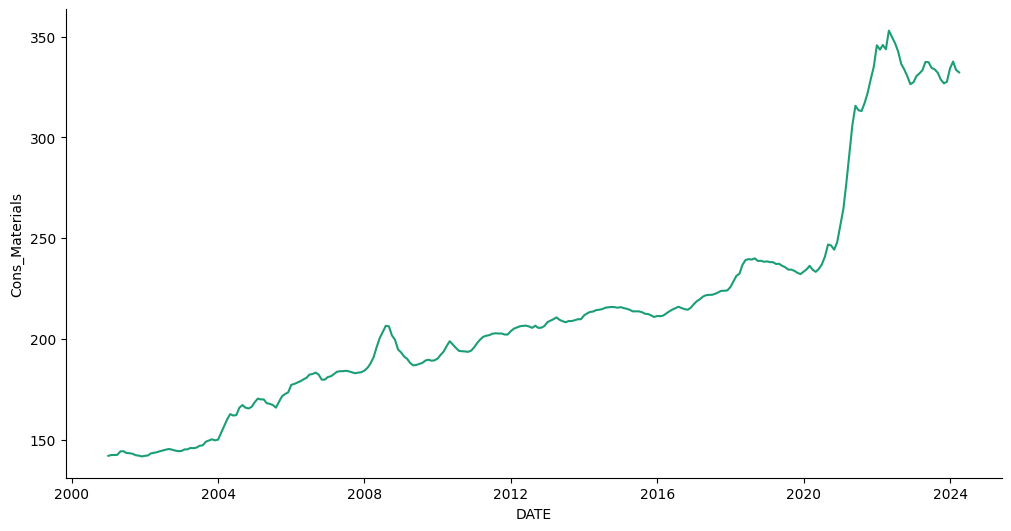

In [48]:
# @title DATE vs Cons_Materials

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DATE']
  ys = series['Cons_Materials']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_cons_price_index.sort_values('DATE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DATE')
_ = plt.ylabel('Cons_Materials')

## Consumer Price Index (CPI)

In [49]:
# Consumer Price Index
df_CPI = pd.read_csv("CPI.csv", names = ["DATE", "CPI"], skiprows = 1).drop([252])
print(df_CPI.shape)
df_CPI.head()

(927, 2)


DATE    CPI
0  1947-01-01  21.48
1  1947-02-01  21.62
2  1947-03-01  22.00
3  1947-04-01  22.00
4  1947-05-01  21.95

In [50]:
df_CPI.info()

<class 'pandas.core.frame.DataFrame'>
Index: 927 entries, 0 to 927
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    927 non-null    object 
 1   CPI     927 non-null    float64
dtypes: float64(1), object(1)
memory usage: 54.0+ KB


In [51]:
df_CPI["DATE"] = df_CPI["DATE"].astype("datetime64[ns]")

In [52]:
df_CPI = df_CPI[df_CPI["DATE"] > '2000-12-12']

In [53]:
df_CPI.head(12)

DATE    CPI
648 2001-01-01  175.6
649 2001-02-01  176.0
650 2001-03-01  176.1
651 2001-04-01  176.4
652 2001-05-01  177.3
653 2001-06-01  177.7
654 2001-07-01  177.4
655 2001-08-01  177.4
656 2001-09-01  178.1
657 2001-10-01  177.6
658 2001-11-01  177.5
659 2001-12-01  177.4

In [54]:
df_CPI.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 648 to 927
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    280 non-null    datetime64[ns]
 1   CPI     280 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.6 KB


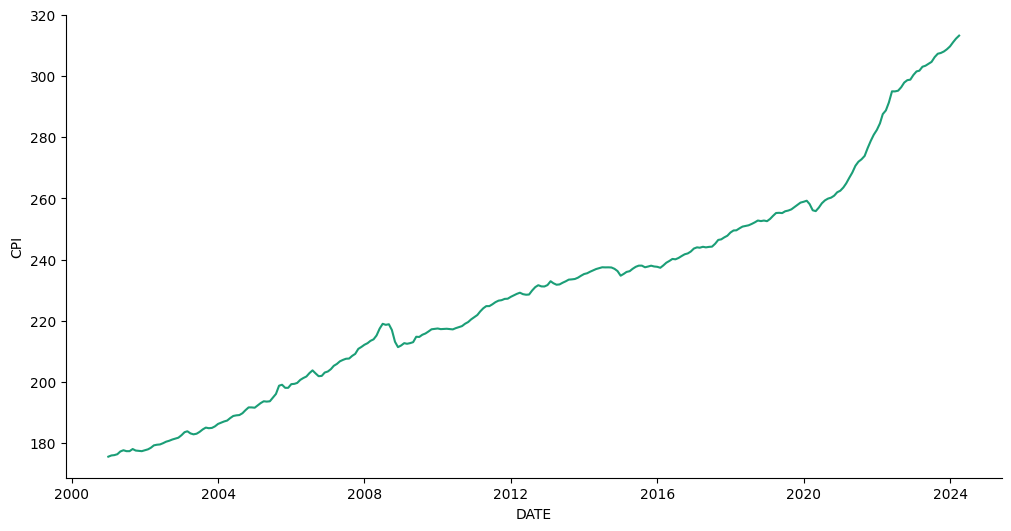

In [55]:
# @title DATE vs CPI

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DATE']
  ys = series['CPI']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_CPI.sort_values('DATE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DATE')
_ = plt.ylabel('CPI')

## Monthly suply of New Household

In [56]:
# Monthly new house supply
df_house = pd.read_csv("monthly_new_house.csv", names = ["DATE", "Houses"], skiprows = 1).drop([252])
print(df_house.shape)
df_house.head()

(735, 2)


DATE  Houses
0  1963-01-01     4.7
1  1963-02-01     6.6
2  1963-03-01     6.4
3  1963-04-01     5.3
4  1963-05-01     5.1

In [57]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735 entries, 0 to 735
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    735 non-null    object 
 1   Houses  735 non-null    float64
dtypes: float64(1), object(1)
memory usage: 33.4+ KB


In [58]:
df_house.isna().sum()

DATE      0
Houses    0
dtype: int64

In [59]:
df_house["DATE"] = df_house["DATE"].astype("datetime64[ns]")

In [60]:
df_house = df_house[df_house["DATE"] > '2000-12-12']

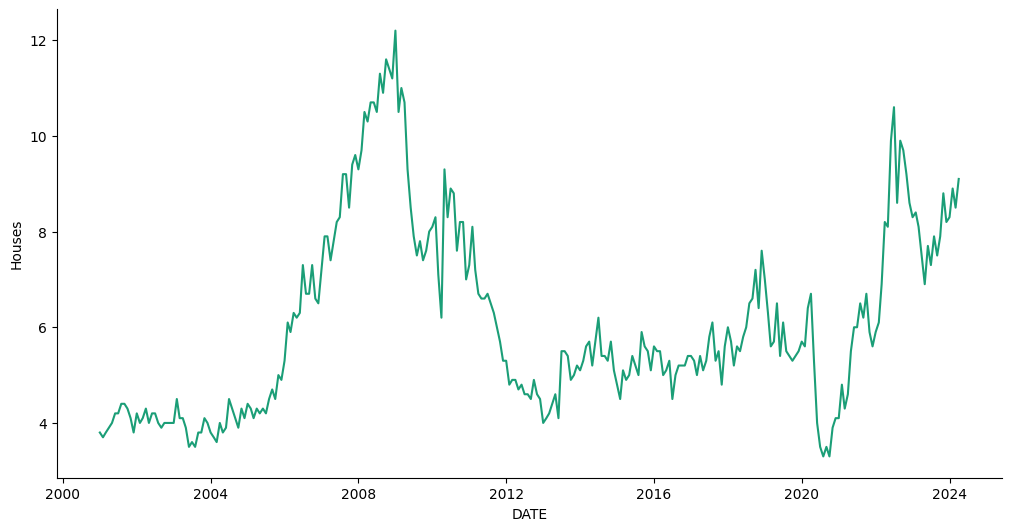

In [61]:
# @title DATE vs Houses

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DATE']
  ys = series['Houses']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_house.sort_values('DATE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DATE')
_ = plt.ylabel('Houses')

## Population above 65

In [62]:
# Population above 65

df_oldpop = pd.read_csv("population_above_65.csv", names = ["DATE", "old_percent"], skiprows = 1)
print(df_oldpop.shape)
df_oldpop.tail()


(63, 2)


DATE  old_percent
58  2018-01-01    15.397698
59  2019-01-01    15.791801
60  2020-01-01    16.223400
61  2021-01-01    16.678895
62  2022-01-01    17.128121

In [63]:
df_oldpop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         63 non-null     object 
 1   old_percent  63 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [64]:
df_oldpop["DATE"] = df_oldpop["DATE"].astype("datetime64[ns]")

In [65]:
df_oldpop = df_oldpop[df_oldpop["DATE"] > '2000-12-12']

In [66]:
df_oldpop.head()

DATE  old_percent
41 2001-01-01    12.296945
42 2002-01-01    12.287458
43 2003-01-01    12.277934
44 2004-01-01    12.304719
45 2005-01-01    12.360163

In [67]:
df_oldpop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 41 to 62
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         22 non-null     datetime64[ns]
 1   old_percent  22 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 528.0 bytes


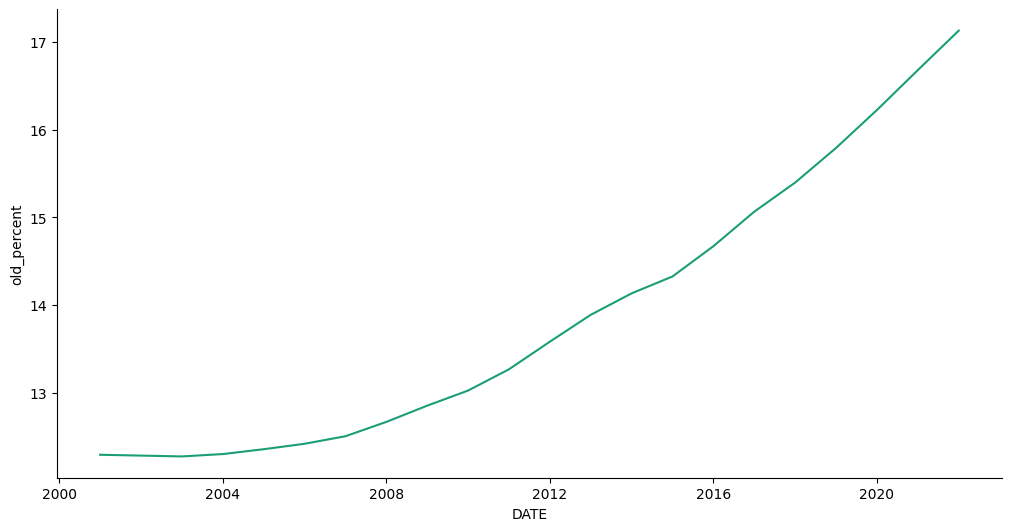

In [68]:
# @title DATE vs old_percent

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DATE']
  ys = series['old_percent']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_oldpop.sort_values('DATE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DATE')
_ = plt.ylabel('old_percent')

## Urban Population Percentage

In [69]:
# to read just one sheet to dataframe:
df_urban = pd.read_csv("API_SP.URB.TOTL.IN.ZS_DS2_en_csv_v2_484736.csv", skiprows=4)

print(df_urban.shape)
df_urban.head()


(266, 69)


Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                             Indicator Name     Indicator Code       1960  \
0  Urban population (% of total population)  SP.URB.TOTL.IN.ZS  50.776000   
1  Urban population (% of total population)  SP.URB.TOTL.IN.ZS  14.563810   
2  Urban population (% of total population)  SP.URB.TOTL.IN.ZS   8.401000   
3  Urban population (% of total population)  SP.URB.TOTL.IN.ZS  14.705391   
4  Urban population (% of total population)  SP.URB.TOTL.IN.ZS  10.435000   

        1961       1962       1963       1964       1965  ...       2015  \
0  50.761000  50.746000  50.730000  50.715000  50.700000  ...  43.108000   
1  14.811410  15.069249  15.347976  15.640195  15.941282  ...  34.425584   
2   8.684000   8.976000   9.276000   9.586000   9.904000  ...  24.803000   
3  15.090123  15.484076  15.897592  16.329208  16.778650  ...  44.805863   
4  10.798000  11.204000  11.624000  12.058000  12.504000  ...  63.446000   

        2016       2017       2018       2019       2020       2021  \
0  43.192000  43.293000  43.411000  43.546000  43.697000  43.866000   
1  34.894753  35.358901  35.847598  36.336259  36.828302  37.323699   
2  25.020000  25.250000  25.495000  25.754000  26.026000  26.314000   
3  45.425066  46.039478  46.649426  47.255413  47.857831  48.454806   
4  64.149000  64.839000  65.514000  66.177000  66.825000  67.460000   

        2022  2023  Unnamed: 68  
0  44.052000   NaN          NaN  
1  37.825158   NaN          NaN  
2  26.616000   NaN          NaN  
3  49.047385   NaN          NaN  
4  68.081000   NaN          NaN  

[5 rows x 69 columns]

In [70]:
df_urban = df_urban[df_urban["Country Name"] == "United States"]
df_urban.drop(labels = ["Country Name", "Country Code", "Indicator Code"], axis = 1, inplace = True)
df_urban.set_index("Indicator Name", inplace = True)
df_urban = df_urban.T
df_urban.reset_index(inplace = True)
df_urban = df_urban[:-1]
df_urban.head()

Indicator Name index  Urban population (% of total population)
0               1960                                    69.996
1               1961                                    70.377
2               1962                                    70.757
3               1963                                    71.134
4               1964                                    71.508

In [71]:
df_urban.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   index                                     64 non-null     object 
 1   Urban population (% of total population)  63 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [72]:
df_urban['DATE'] = pd.to_datetime(df_urban['index'])

In [73]:
df_urban = df_urban[df_urban["DATE"] > '2000-12-12']

In [74]:
df_urban = df_urban.iloc[:,1:]

In [75]:
df_urban.head()


Indicator Name  Urban population (% of total population)       DATE
41                                                79.234 2001-01-01
42                                                79.409 2002-01-01
43                                                79.583 2003-01-01
44                                                79.757 2004-01-01
45                                                79.928 2005-01-01

In [76]:
df_urban.reset_index(drop = True, inplace = True)

In [77]:
df_urban = df_urban[["DATE", "Urban population (% of total population)"]]

In [78]:
df_urban.head()

Indicator Name       DATE  Urban population (% of total population)
0              2001-01-01                                    79.234
1              2002-01-01                                    79.409
2              2003-01-01                                    79.583
3              2004-01-01                                    79.757
4              2005-01-01                                    79.928

In [79]:
df_urban.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   DATE                                      23 non-null     datetime64[ns]
 1   Urban population (% of total population)  22 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 496.0 bytes


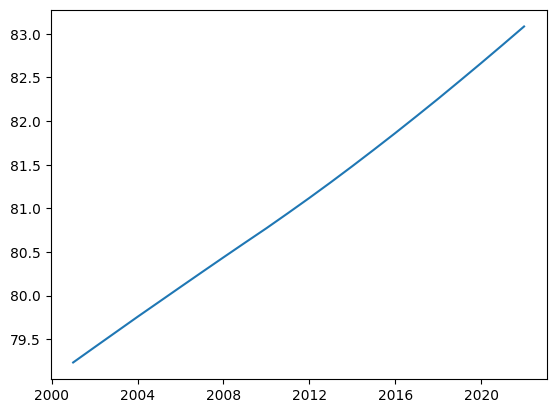

In [80]:
plt.plot(df_urban["DATE"], df_urban["Urban population (% of total population)"])

In [81]:
df_urban.shape

(23, 2)

## Working Age Population

In [82]:
# Working age population
df_working = pd.read_csv("working_age_population.csv", names = ["DATE", "Working_Population"], skiprows = 1).drop([252])
print(df_working.shape)
df_working.tail()

(567, 2)


DATE  Working_Population
563  2023-12-01         209118700.0
564  2024-01-01         208623100.0
565  2024-02-01         208640600.0
566  2024-03-01         208580800.0
567  2024-04-01         208530600.0

In [83]:
df_working.info()

<class 'pandas.core.frame.DataFrame'>
Index: 567 entries, 0 to 567
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DATE                567 non-null    object 
 1   Working_Population  567 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.3+ KB


In [84]:
df_working["DATE"] = pd.to_datetime(df_working["DATE"])

In [85]:
df_working = df_working[df_working["DATE"].dt.strftime('%Y') > '2000-12-12']

In [86]:
df_working = df_working[["DATE", "Working_Population"]]

In [87]:
df_working.head()

DATE  Working_Population
288 2001-01-01         180348500.0
289 2001-02-01         180507700.0
290 2001-03-01         180597500.0
291 2001-04-01         180853700.0
292 2001-05-01         181012800.0

In [88]:
df_working.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 288 to 567
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DATE                280 non-null    datetime64[ns]
 1   Working_Population  280 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.6 KB


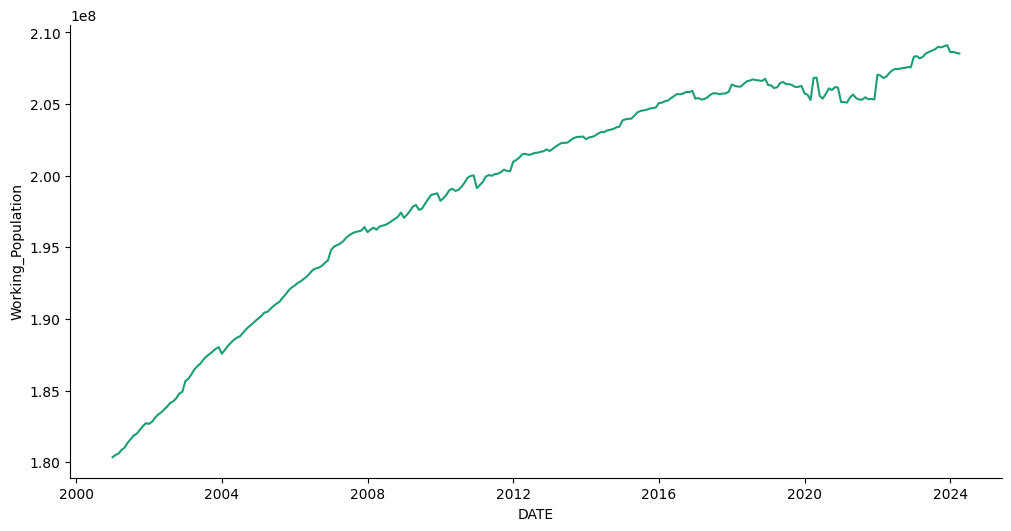

In [89]:
# @title DATE vs Working_Population

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DATE']
  ys = series['Working_Population']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_working.sort_values('DATE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DATE')
_ = plt.ylabel('Working_Population')

## Real disposable personal Income

In [90]:
# Real Median Household Income
df_income = pd.read_csv("real_disposable_personal_income.csv", names = ["DATE", "Income"], skiprows = 1)
print(df_income.shape)
df_income.head()

(783, 2)


DATE  Income
0  1959-01-01  2318.4
1  1959-02-01  2325.4
2  1959-03-01  2338.7
3  1959-04-01  2353.8
4  1959-05-01  2366.6

In [91]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    783 non-null    object 
 1   Income  783 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.4+ KB


In [92]:
df_income["DATE"] = df_income['DATE'].astype('datetime64[ns]')

In [93]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    783 non-null    datetime64[ns]
 1   Income  783 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.4 KB


In [94]:
df_income = df_income[df_income["DATE"] > '2000-12-12']

In [95]:
df_income.head()

DATE   Income
504 2001-01-01  10211.7
505 2001-02-01  10223.4
506 2001-03-01  10254.4
507 2001-04-01  10233.1
508 2001-05-01  10214.7

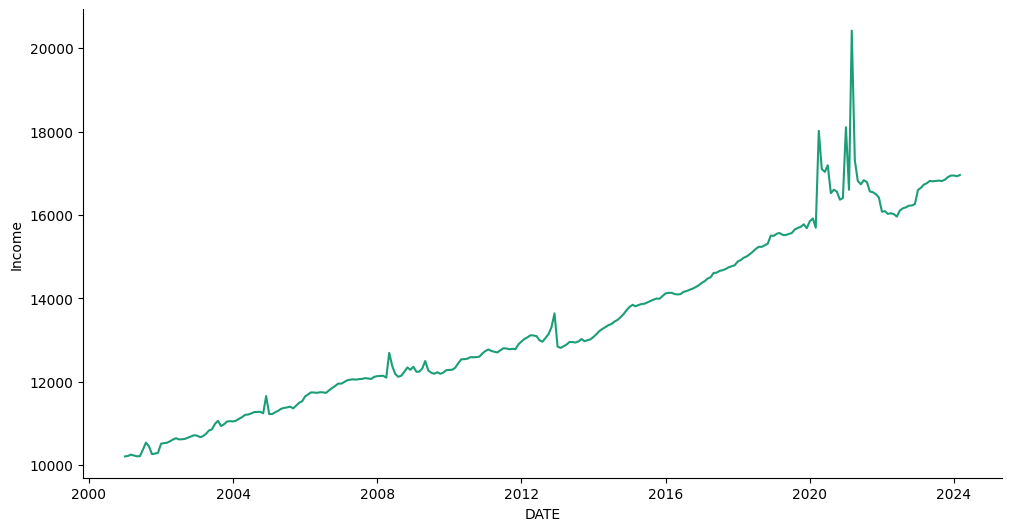

In [96]:
# @title DATE vs Income

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DATE']
  ys = series['Income']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_income.sort_values('DATE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DATE')
_ = plt.ylabel('Income')

## Number of Households

In [97]:
# Number of households

df_households = pd.read_csv("total_households.csv", names = ["DATE", "Num_Households"], skiprows = 1)
print(df_households.shape)
df_households

(84, 2)


DATE Num_Households
0   1940-01-01          34949
1   1941-01-01              .
2   1942-01-01              .
3   1943-01-01              .
4   1944-01-01              .
..         ...            ...
79  2019-01-01       128579.0
80  2020-01-01       128451.0
81  2021-01-01       129224.0
82  2022-01-01       131202.0
83  2023-01-01       131434.0

[84 rows x 2 columns]

In [98]:
df_households.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATE            84 non-null     object
 1   Num_Households  84 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [99]:
df_households["DATE"] = df_households["DATE"].astype('datetime64[ns]')

In [100]:
df_households.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            84 non-null     datetime64[ns]
 1   Num_Households  84 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.4+ KB


In [101]:
df_households = df_households[df_households["DATE"] > '2000-12-12']

In [102]:
df_households.head()

DATE Num_Households
61 2001-01-01         108209
62 2002-01-01         109297
63 2003-01-01         111278
64 2004-01-01         112000
65 2005-01-01         113343

In [103]:
df_households["Num_Households"].values

array(['108209', '109297', '111278', '112000', '113343', '114384',
       '116011', '116783', '117181', '117538', '119927', '121084',
       '122459', '123229', '124587', '125819', '126224', '127586',
       '128579.0', '128451.0', '129224.0', '131202.0', '131434.0'],
      dtype=object)

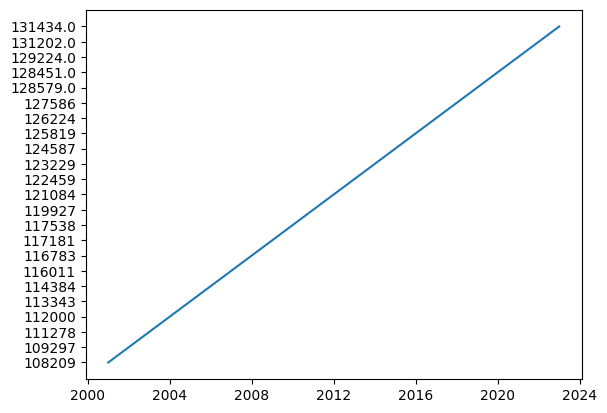

In [104]:
plt.plot(df_households["DATE"], df_households["Num_Households"])

# (B) Merging Data

Merging Monthly data (outer join) so all the dates are covered month-wise

In [105]:
# Concating dataframes having monthly data to create one dataframe
df = pd.DataFrame()
df_bymonth = [df_CS,df_pcgdp, df_working, df_house, df_CPI, df_unemp, df_cons_price_index, df_Fed_rate, df_income]
for df1 in df_bymonth:
    df1 = df1.set_index("DATE")
    df = pd.concat([df,df1],join ="outer", axis = 1)
print(df.shape)
df.head()

(280, 11)


CSUSHPISA    Year  Month  Per_Capita_GDP  Working_Population  \
DATE                                                                       
2001-01-01    109.846  2001.0    1.0         49911.0         180348500.0   
2001-02-01    110.501  2001.0    2.0             NaN         180507700.0   
2001-03-01    111.109  2001.0    3.0             NaN         180597500.0   
2001-04-01    111.651  2001.0    4.0         50105.0         180853700.0   
2001-05-01    112.163  2001.0    5.0             NaN         181012800.0   

            Houses    CPI  UNRATE  Cons_Materials  FEDFUNDS   Income  
DATE                                                                  
2001-01-01     3.8  175.6     4.2           142.0      5.98  10211.7  
2001-02-01     3.7  176.0     4.2           142.4      5.49  10223.4  
2001-03-01     3.8  176.1     4.3           142.4      5.31  10254.4  
2001-04-01     3.9  176.4     4.4           142.5      4.80  10233.1  
2001-05-01     4.0  177.3     4.3           144.2      4.21  10214.7

In [106]:
df.tail()

CSUSHPISA    Year  Month  Per_Capita_GDP  Working_Population  \
DATE                                                                       
2023-12-01    314.338  2023.0   12.0             NaN         209118700.0   
2024-01-01    315.297  2024.0    1.0         67702.0         208623100.0   
2024-02-01    316.576  2024.0    2.0             NaN         208640600.0   
2024-03-01        NaN     NaN    NaN             NaN         208580800.0   
2024-04-01        NaN     NaN    NaN             NaN         208530600.0   

            Houses      CPI  UNRATE  Cons_Materials  FEDFUNDS   Income  
DATE                                                                    
2023-12-01     8.2  308.742     3.7         327.644      5.33  16946.5  
2024-01-01     8.3  309.685     3.7         334.259      5.33  16947.4  
2024-02-01     8.9  311.054     3.9         337.658      5.33  16931.1  
2024-03-01     8.5  312.230     3.8         333.566      5.33  16961.3  
2024-04-01     9.1  313.207     3.9         332.277      5.33      NaN

In [107]:
df.isna().sum()

CSUSHPISA               2
Year                    2
Month                   2
Per_Capita_GDP        187
Working_Population      0
Houses                  0
CPI                     0
UNRATE                  0
Cons_Materials          0
FEDFUNDS                0
Income                  1
dtype: int64

In [108]:
# Merging other dataframes
others = [df_urban, df_oldpop, df_subsidy,df_households]
for df1 in others:
    if "Year" not in df1.columns:
        df1["Year"] = pd.DatetimeIndex(df1["DATE"]).year
        df1.set_index("DATE", inplace = True)
        df = pd.merge(df, df1, how = "left", on = "Year")
    else:
        df1.set_index("DATE", inplace = True)
        df = pd.merge(df, df1, how = "left", on = "Year")
df["DATE"] = df_CS["DATE"]
df.set_index("DATE", inplace = True)
df.head()

<ipython-input-108-6974a0ee22cc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Year"] = pd.DatetimeIndex(df1["DATE"]).year


CSUSHPISA    Year  Month  Per_Capita_GDP  Working_Population  \
DATE                                                                       
2001-01-01    109.846  2001.0    1.0         49911.0         180348500.0   
2001-02-01    110.501  2001.0    2.0             NaN         180507700.0   
2001-03-01    111.109  2001.0    3.0             NaN         180597500.0   
2001-04-01    111.651  2001.0    4.0         50105.0         180853700.0   
2001-05-01    112.163  2001.0    5.0             NaN         181012800.0   

            Houses    CPI  UNRATE  Cons_Materials  FEDFUNDS   Income  \
DATE                                                                   
2001-01-01     3.8  175.6     4.2           142.0      5.98  10211.7   
2001-02-01     3.7  176.0     4.2           142.4      5.49  10223.4   
2001-03-01     3.8  176.1     4.3           142.4      5.31  10254.4   
2001-04-01     3.9  176.4     4.4           142.5      4.80  10233.1   
2001-05-01     4.0  177.3     4.3           144.2      4.21  10214.7   

            Urban population (% of total population)  old_percent  Subsidy  \
DATE                                                                         
2001-01-01                                    79.234    12.296945   20.573   
2001-02-01                                    79.234    12.296945   20.573   
2001-03-01                                    79.234    12.296945   20.573   
2001-04-01                                    79.234    12.296945   20.573   
2001-05-01                                    79.234    12.296945   20.573   

           Num_Households  
DATE                       
2001-01-01         108209  
2001-02-01         108209  
2001-03-01         108209  
2001-04-01         108209  
2001-05-01         108209

In [109]:
df.tail()

CSUSHPISA    Year  Month  Per_Capita_GDP  Working_Population  \
DATE                                                                       
2023-12-01    314.338  2023.0   12.0             NaN         209118700.0   
2024-01-01    315.297  2024.0    1.0         67702.0         208623100.0   
2024-02-01    316.576  2024.0    2.0             NaN         208640600.0   
NaT               NaN     NaN    NaN             NaN         208580800.0   
NaT               NaN     NaN    NaN             NaN         208530600.0   

            Houses      CPI  UNRATE  Cons_Materials  FEDFUNDS   Income  \
DATE                                                                     
2023-12-01     8.2  308.742     3.7         327.644      5.33  16946.5   
2024-01-01     8.3  309.685     3.7         334.259      5.33  16947.4   
2024-02-01     8.9  311.054     3.9         337.658      5.33  16931.1   
NaT            8.5  312.230     3.8         333.566      5.33  16961.3   
NaT            9.1  313.207     3.9         332.277      5.33      NaN   

            Urban population (% of total population)  old_percent  Subsidy  \
DATE                                                                         
2023-12-01                                       NaN          NaN      NaN   
2024-01-01                                       NaN          NaN      NaN   
2024-02-01                                       NaN          NaN      NaN   
NaT                                              NaN          NaN      NaN   
NaT                                              NaN          NaN      NaN   

           Num_Households  
DATE                       
2023-12-01       131434.0  
2024-01-01            NaN  
2024-02-01            NaN  
NaT                   NaN  
NaT                   NaN

In [110]:
df.isna().sum()

CSUSHPISA                                     2
Year                                          2
Month                                         2
Per_Capita_GDP                              187
Working_Population                            0
Houses                                        0
CPI                                           0
UNRATE                                        0
Cons_Materials                                0
FEDFUNDS                                      0
Income                                        1
Urban population (% of total population)     16
old_percent                                  16
Subsidy                                      16
Num_Households                                4
dtype: int64

# (C) Filling Missing Values

In [111]:
# Filling missing values in the Per_Capita_GDP column using linear interpolation
df["Per_Capita_GDP"] = df["Per_Capita_GDP"].interpolate()

In [112]:
df.head()

CSUSHPISA    Year  Month  Per_Capita_GDP  Working_Population  \
DATE                                                                       
2001-01-01    109.846  2001.0    1.0    49911.000000         180348500.0   
2001-02-01    110.501  2001.0    2.0    49975.666667         180507700.0   
2001-03-01    111.109  2001.0    3.0    50040.333333         180597500.0   
2001-04-01    111.651  2001.0    4.0    50105.000000         180853700.0   
2001-05-01    112.163  2001.0    5.0    49994.666667         181012800.0   

            Houses    CPI  UNRATE  Cons_Materials  FEDFUNDS   Income  \
DATE                                                                   
2001-01-01     3.8  175.6     4.2           142.0      5.98  10211.7   
2001-02-01     3.7  176.0     4.2           142.4      5.49  10223.4   
2001-03-01     3.8  176.1     4.3           142.4      5.31  10254.4   
2001-04-01     3.9  176.4     4.4           142.5      4.80  10233.1   
2001-05-01     4.0  177.3     4.3           144.2      4.21  10214.7   

            Urban population (% of total population)  old_percent  Subsidy  \
DATE                                                                         
2001-01-01                                    79.234    12.296945   20.573   
2001-02-01                                    79.234    12.296945   20.573   
2001-03-01                                    79.234    12.296945   20.573   
2001-04-01                                    79.234    12.296945   20.573   
2001-05-01                                    79.234    12.296945   20.573   

           Num_Households  
DATE                       
2001-01-01         108209  
2001-02-01         108209  
2001-03-01         108209  
2001-04-01         108209  
2001-05-01         108209

In [113]:
df.shape

(280, 15)

In [114]:
df.isna().sum()

CSUSHPISA                                    2
Year                                         2
Month                                        2
Per_Capita_GDP                               0
Working_Population                           0
Houses                                       0
CPI                                          0
UNRATE                                       0
Cons_Materials                               0
FEDFUNDS                                     0
Income                                       1
Urban population (% of total population)    16
old_percent                                 16
Subsidy                                     16
Num_Households                               4
dtype: int64

In [115]:
df.dropna(inplace = True)

In [116]:
df.isna().sum()

CSUSHPISA                                   0
Year                                        0
Month                                       0
Per_Capita_GDP                              0
Working_Population                          0
Houses                                      0
CPI                                         0
UNRATE                                      0
Cons_Materials                              0
FEDFUNDS                                    0
Income                                      0
Urban population (% of total population)    0
old_percent                                 0
Subsidy                                     0
Num_Households                              0
dtype: int64

In [117]:
df.shape

(264, 15)

In [118]:
df.tail()

CSUSHPISA    Year  Month  Per_Capita_GDP  Working_Population  \
DATE                                                                       
2022-08-01    301.149  2022.0    8.0         65579.0         207443000.0   
2022-09-01    299.152  2022.0    9.0         65689.0         207505000.0   
2022-10-01    298.786  2022.0   10.0         65799.0         207525000.0   
2022-11-01    298.413  2022.0   11.0         65898.0         207585700.0   
2022-12-01    297.669  2022.0   12.0         65997.0         207565400.0   

            Houses      CPI  UNRATE  Cons_Materials  FEDFUNDS   Income  \
DATE                                                                     
2022-08-01     8.6  295.209     3.6         342.753      2.33  16161.4   
2022-09-01     9.9  296.341     3.5         336.464      2.56  16184.9   
2022-10-01     9.7  297.863     3.6         333.796      3.08  16223.5   
2022-11-01     9.2  298.648     3.6         330.369      3.78  16229.6   
2022-12-01     8.6  298.812     3.5         326.449      4.10  16265.1   

            Urban population (% of total population)  old_percent  Subsidy  \
DATE                                                                         
2022-08-01                                    83.084    17.128121   48.021   
2022-09-01                                    83.084    17.128121   48.021   
2022-10-01                                    83.084    17.128121   48.021   
2022-11-01                                    83.084    17.128121   48.021   
2022-12-01                                    83.084    17.128121   48.021   

           Num_Households  
DATE                       
2022-08-01       131202.0  
2022-09-01       131202.0  
2022-10-01       131202.0  
2022-11-01       131202.0  
2022-12-01       131202.0

In [119]:
df.shape

(264, 15)

In [120]:
df.duplicated().sum()

0

# (D) Exploratory Data Analysis (EDA)

## Basics

In [121]:
df.to_csv("prepared_dataset.csv")

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 264 entries, 2001-01-01 to 2022-12-01
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   CSUSHPISA                                 264 non-null    float64
 1   Year                                      264 non-null    float64
 2   Month                                     264 non-null    float64
 3   Per_Capita_GDP                            264 non-null    float64
 4   Working_Population                        264 non-null    float64
 5   Houses                                    264 non-null    float64
 6   CPI                                       264 non-null    float64
 7   UNRATE                                    264 non-null    float64
 8   Cons_Materials                            264 non-null    float64
 9   FEDFUNDS                                  264 non-null    float64
 10  Income             

In [123]:
df['Num_Households'].unique()

array(['108209', '109297', '111278', '112000', '113343', '114384',
       '116011', '116783', '117181', '117538', '119927', '121084',
       '122459', '123229', '124587', '125819', '126224', '127586',
       '128579.0', '128451.0', '129224.0', '131202.0'], dtype=object)

In [124]:
df['Num_Households'].apply(type).value_counts()

Num_Households
<class 'str'>    264
Name: count, dtype: int64

In [125]:
df['Num_Households'] = pd.to_numeric(df['Num_Households'], errors='coerce')

In [126]:
df['Num_Households'].dtype

dtype('float64')

In [127]:
df['Num_Households'].unique()

array([108209., 109297., 111278., 112000., 113343., 114384., 116011.,
       116783., 117181., 117538., 119927., 121084., 122459., 123229.,
       124587., 125819., 126224., 127586., 128579., 128451., 129224.,
       131202.])

In [128]:
#df= pd.read_csv("prepared_dataset.csv").set_index("DATE")
df.tail()

CSUSHPISA    Year  Month  Per_Capita_GDP  Working_Population  \
DATE                                                                       
2022-08-01    301.149  2022.0    8.0         65579.0         207443000.0   
2022-09-01    299.152  2022.0    9.0         65689.0         207505000.0   
2022-10-01    298.786  2022.0   10.0         65799.0         207525000.0   
2022-11-01    298.413  2022.0   11.0         65898.0         207585700.0   
2022-12-01    297.669  2022.0   12.0         65997.0         207565400.0   

            Houses      CPI  UNRATE  Cons_Materials  FEDFUNDS   Income  \
DATE                                                                     
2022-08-01     8.6  295.209     3.6         342.753      2.33  16161.4   
2022-09-01     9.9  296.341     3.5         336.464      2.56  16184.9   
2022-10-01     9.7  297.863     3.6         333.796      3.08  16223.5   
2022-11-01     9.2  298.648     3.6         330.369      3.78  16229.6   
2022-12-01     8.6  298.812     3.5         326.449      4.10  16265.1   

            Urban population (% of total population)  old_percent  Subsidy  \
DATE                                                                         
2022-08-01                                    83.084    17.128121   48.021   
2022-09-01                                    83.084    17.128121   48.021   
2022-10-01                                    83.084    17.128121   48.021   
2022-11-01                                    83.084    17.128121   48.021   
2022-12-01                                    83.084    17.128121   48.021   

            Num_Households  
DATE                        
2022-08-01        131202.0  
2022-09-01        131202.0  
2022-10-01        131202.0  
2022-11-01        131202.0  
2022-12-01        131202.0

In [129]:

df.drop(columns = ["Year", "Month"], inplace = True)

## **Univariate Analysis**

In [130]:
df.describe()

CSUSHPISA  Per_Capita_GDP  Working_Population      Houses         CPI  \
count  264.000000      264.000000        2.640000e+02  264.000000  264.000000   
mean   174.930307    56724.863636        1.985585e+08    5.950379  225.334981   
std     43.320793     4335.095423        7.761588e+06    1.958466   30.114999   
min    109.846000    49774.000000        1.803485e+08    3.300000  175.600000   
25%    144.887250    53821.083333        1.933554e+08    4.400000  201.875000   
50%    168.191500    55558.833333        2.006964e+08    5.400000  227.532500   
75%    190.750250    59675.500000        2.054132e+08    6.700000  244.205500   
max    304.407000    65997.000000        2.075857e+08   12.200000  298.812000   

           UNRATE  Cons_Materials    FEDFUNDS        Income  \
count  264.000000      264.000000  264.000000    264.000000   
mean     5.942424      206.538076    1.435758  13217.341288   
std      1.962892       46.959145    1.623337   1958.725988   
min      3.500000      141.700000    0.050000  10211.700000   
25%      4.575000      179.875000    0.130000  11747.350000   
50%      5.400000      205.300000    0.990000  12829.700000   
75%      6.825000      221.900000    2.137500  14629.075000   
max     14.800000      353.015000    5.980000  20422.600000   

       Urban population (% of total population)  old_percent     Subsidy  \
count                                264.000000   264.000000  264.000000   
mean                                  81.084864    13.871815   33.559318   
std                                    1.151132     1.543841    6.755191   
min                                   79.234000    12.277934   20.573000   
25%                                   80.099000    12.422072   28.604000   
50%                                   81.031500    13.427320   33.248000   
75%                                   82.058000    15.066290   37.550000   
max                                   83.084000    17.128121   48.021000   

       Num_Households  
count      264.000000  
mean    120199.772727  
std       6866.442531  
min     108209.000000  
25%     114384.000000  
50%     120505.500000  
75%     126224.000000  
max     131202.000000

CSUSHPISA
Skew: 1.2



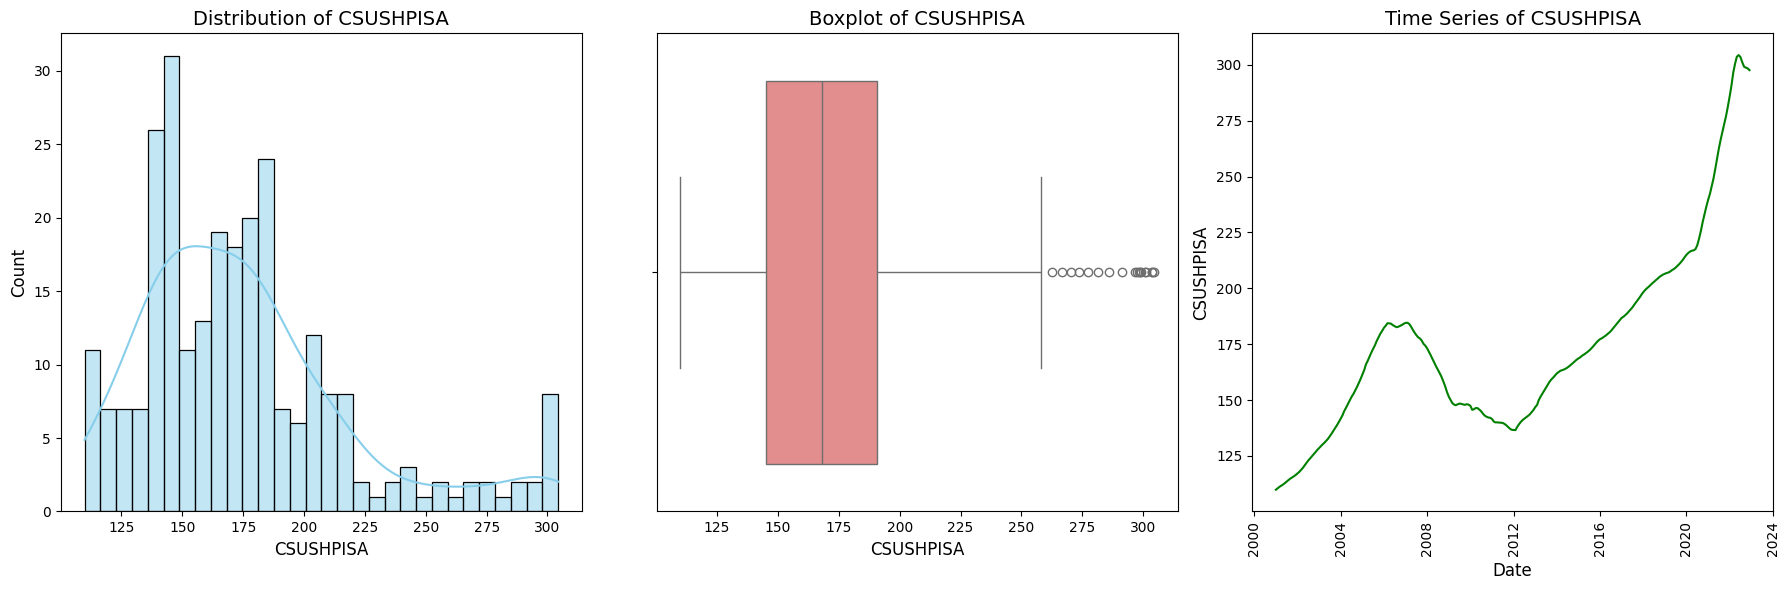

Per_Capita_GDP
Skew: 0.43



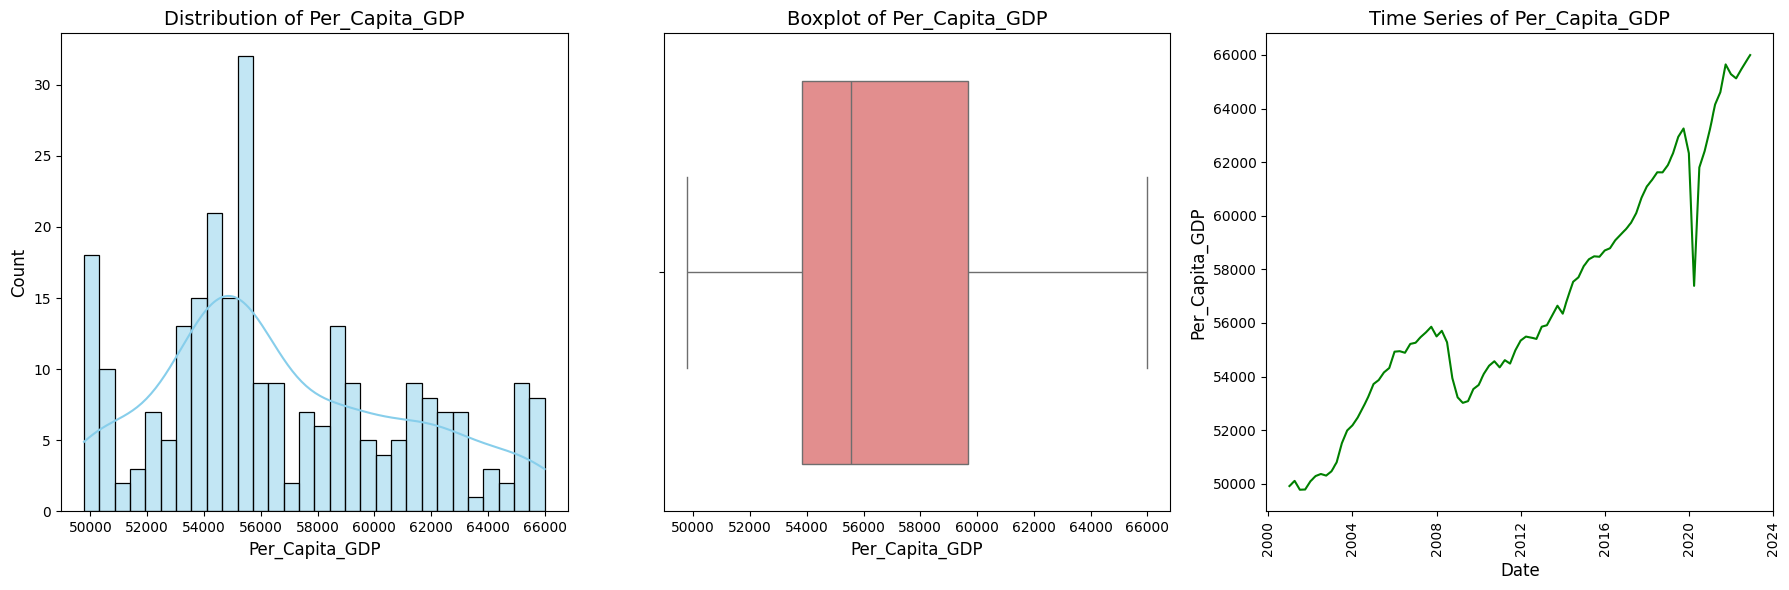

Working_Population
Skew: -0.79



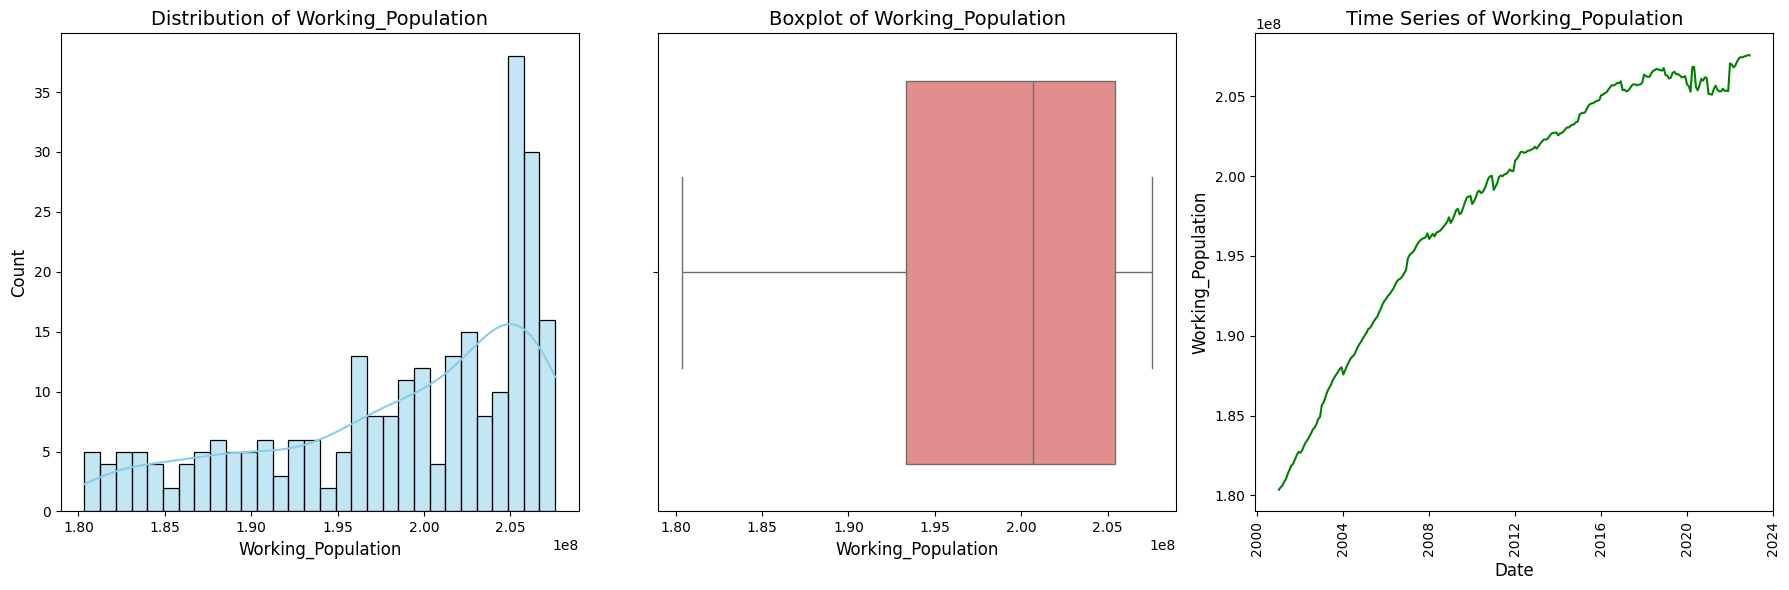

Houses
Skew: 1.11



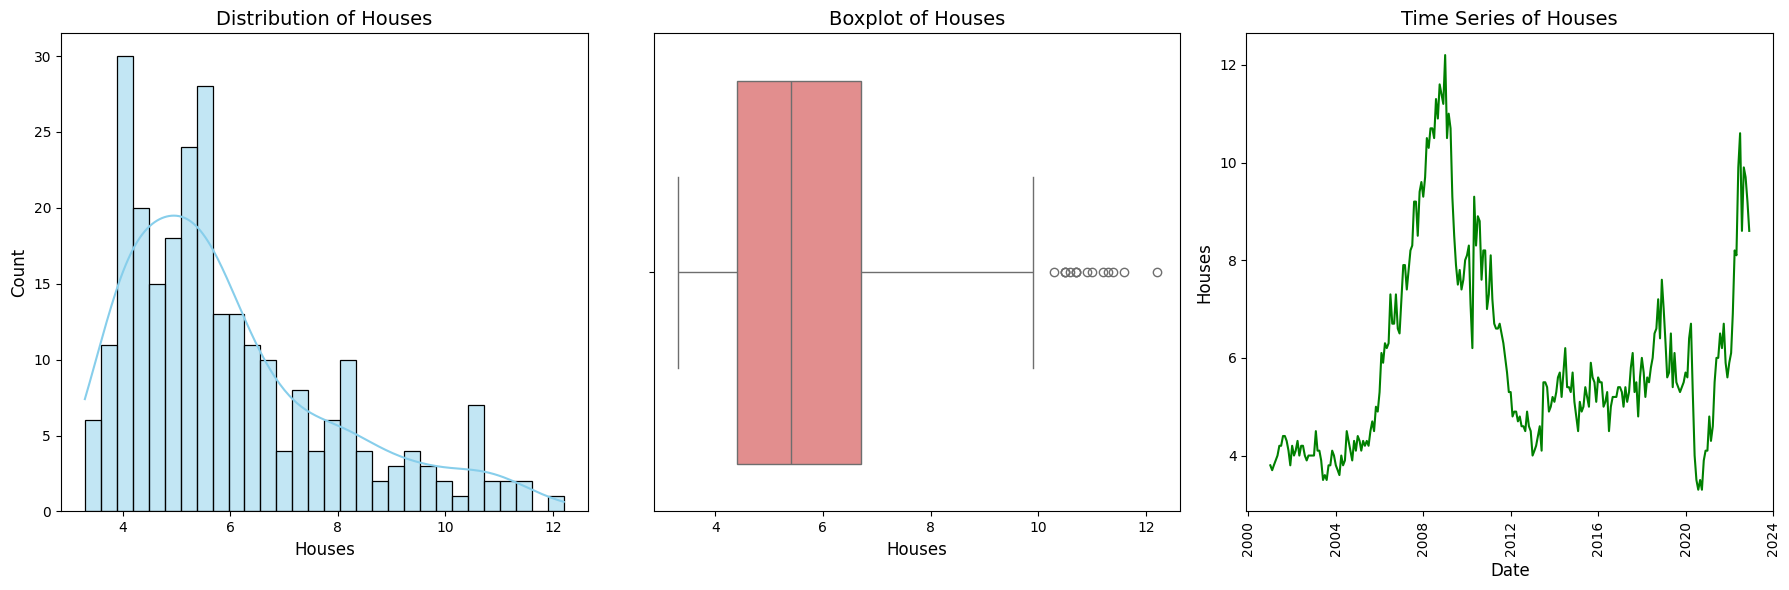

CPI
Skew: 0.22



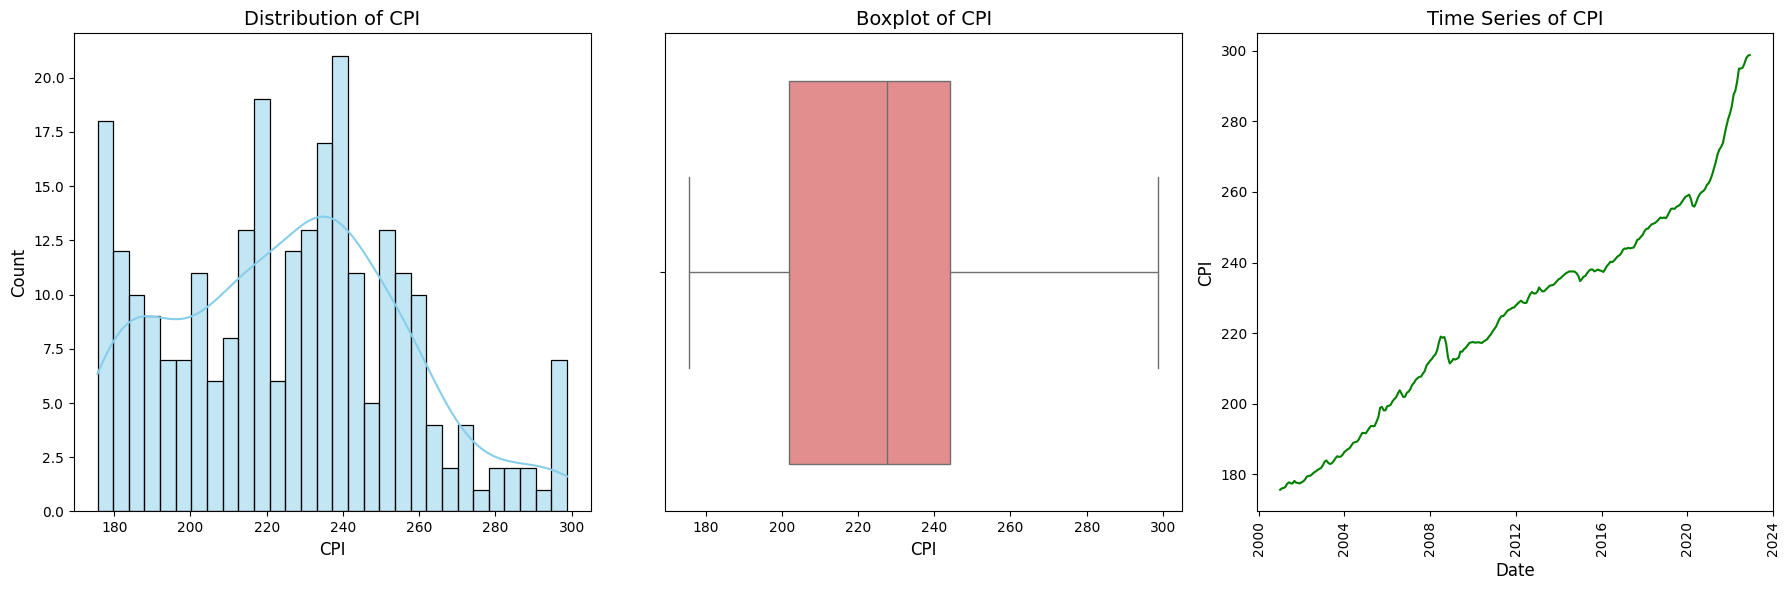

UNRATE
Skew: 1.15



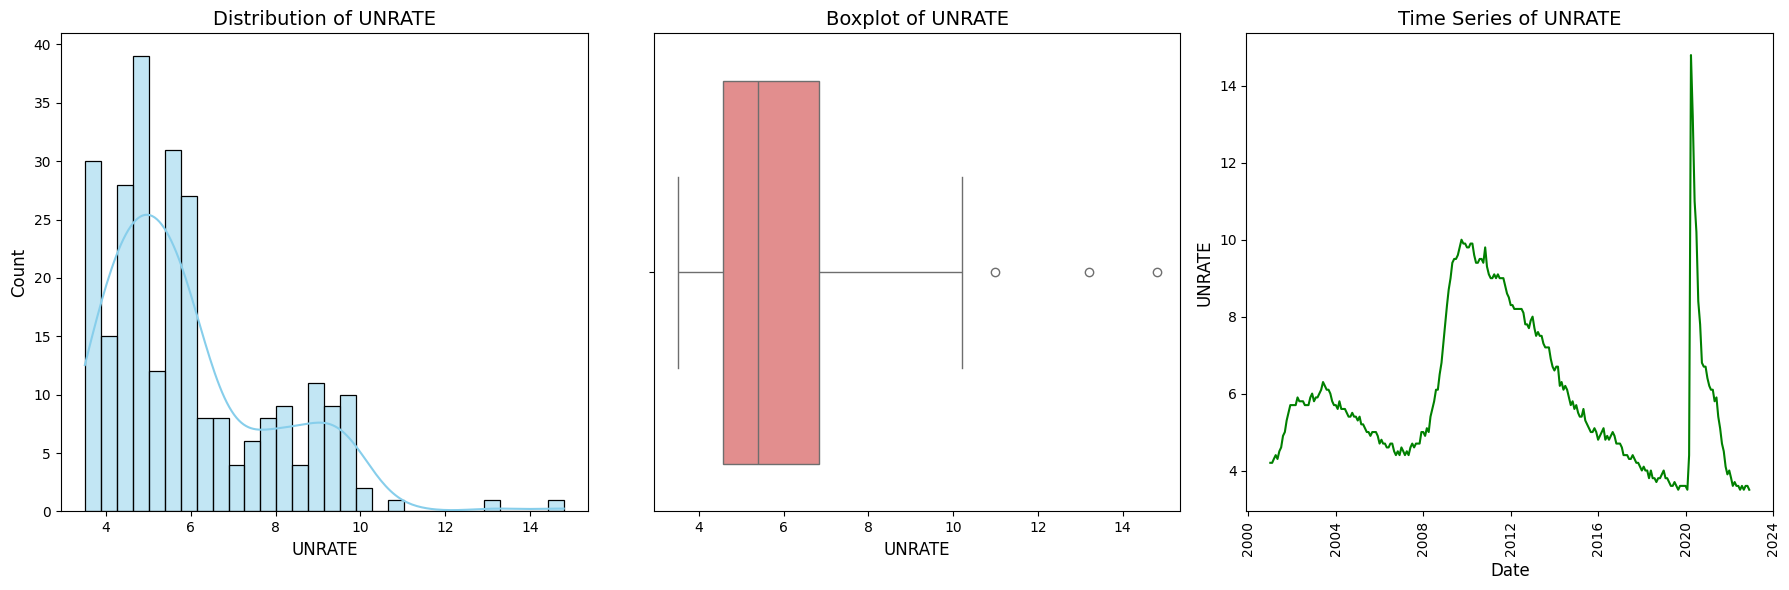

Cons_Materials
Skew: 1.22



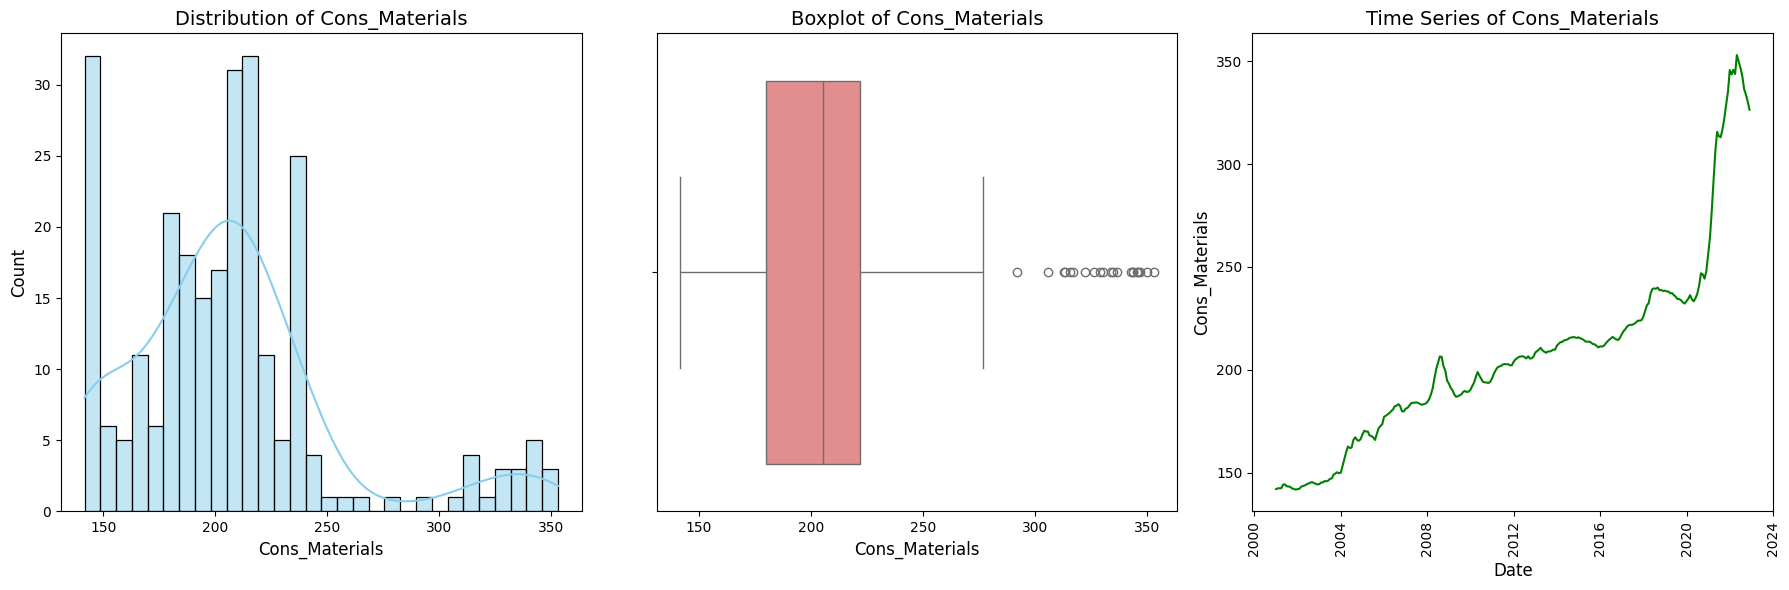

FEDFUNDS
Skew: 1.18



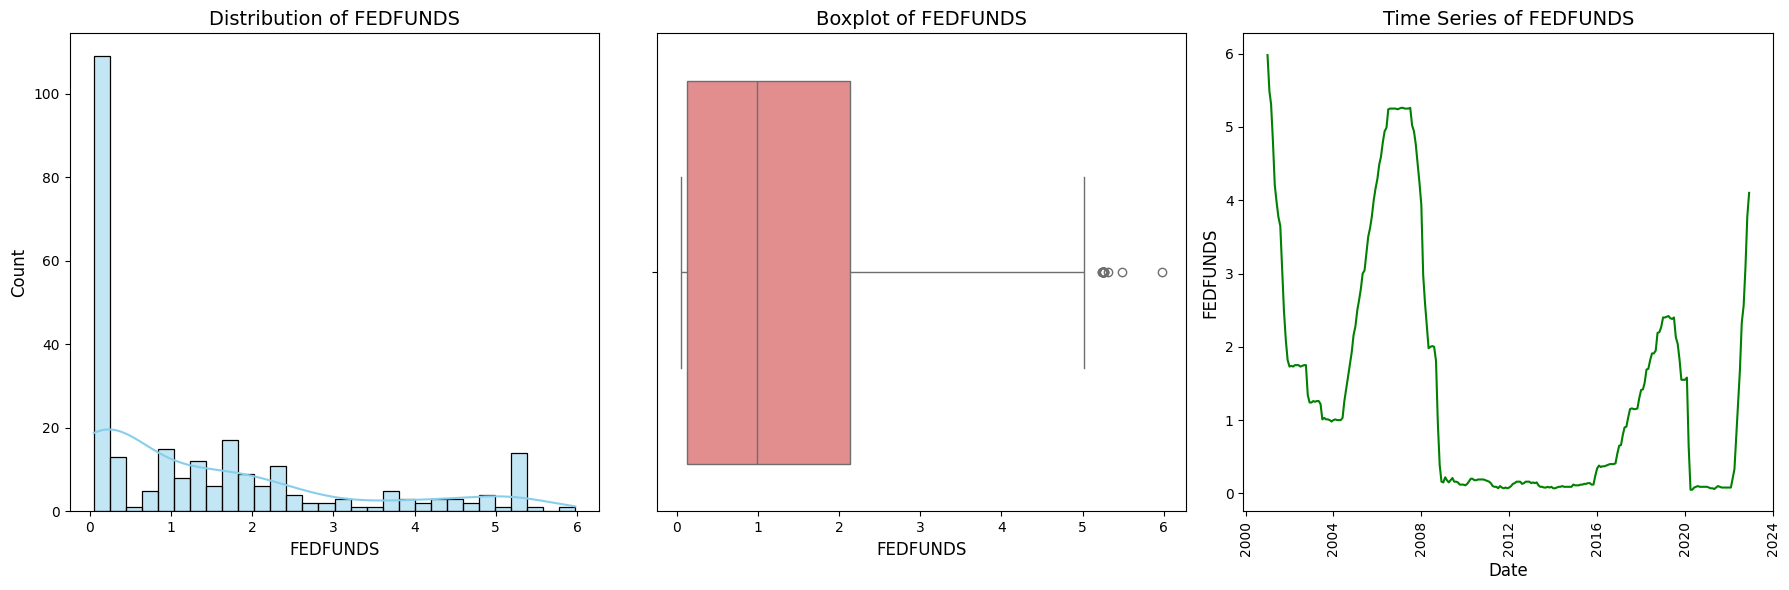

Income
Skew: 0.57



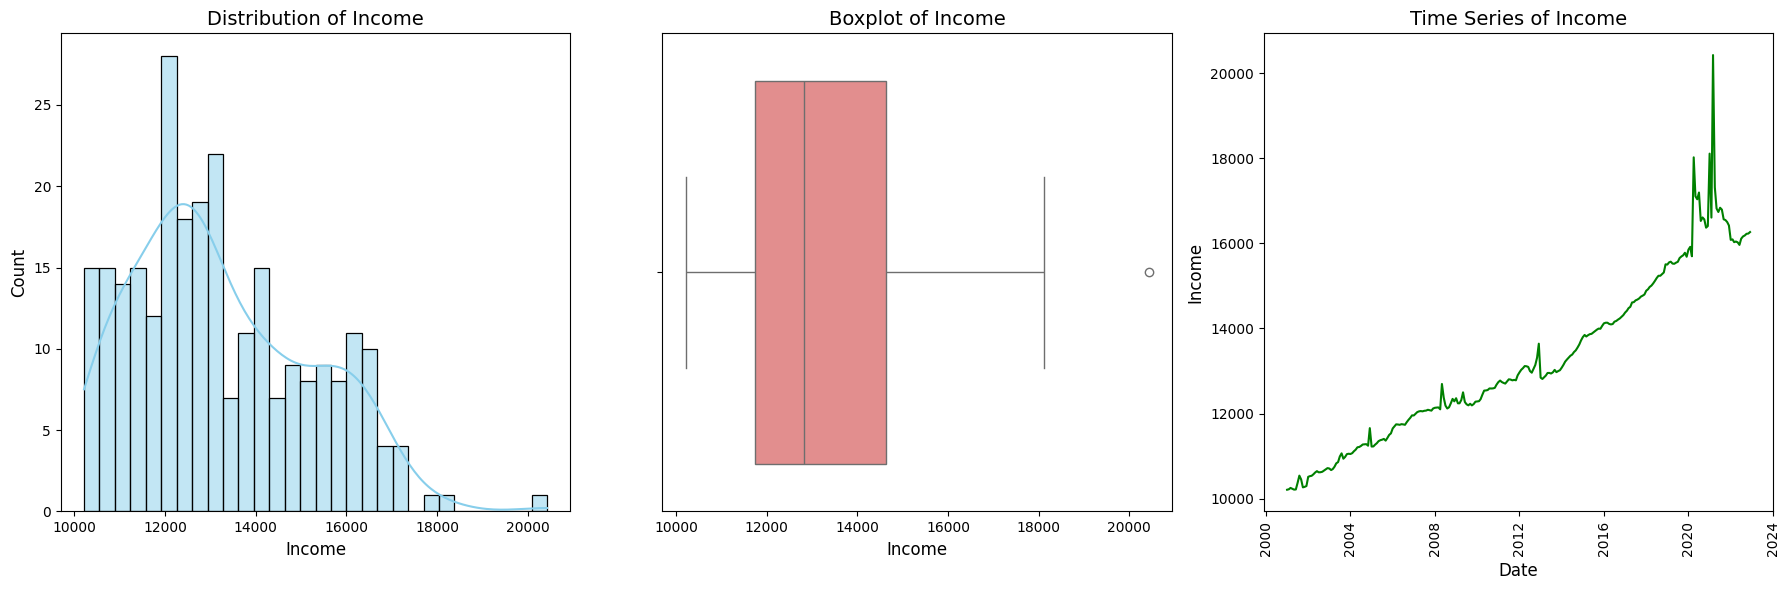

Urban population (% of total population)
Skew: 0.1



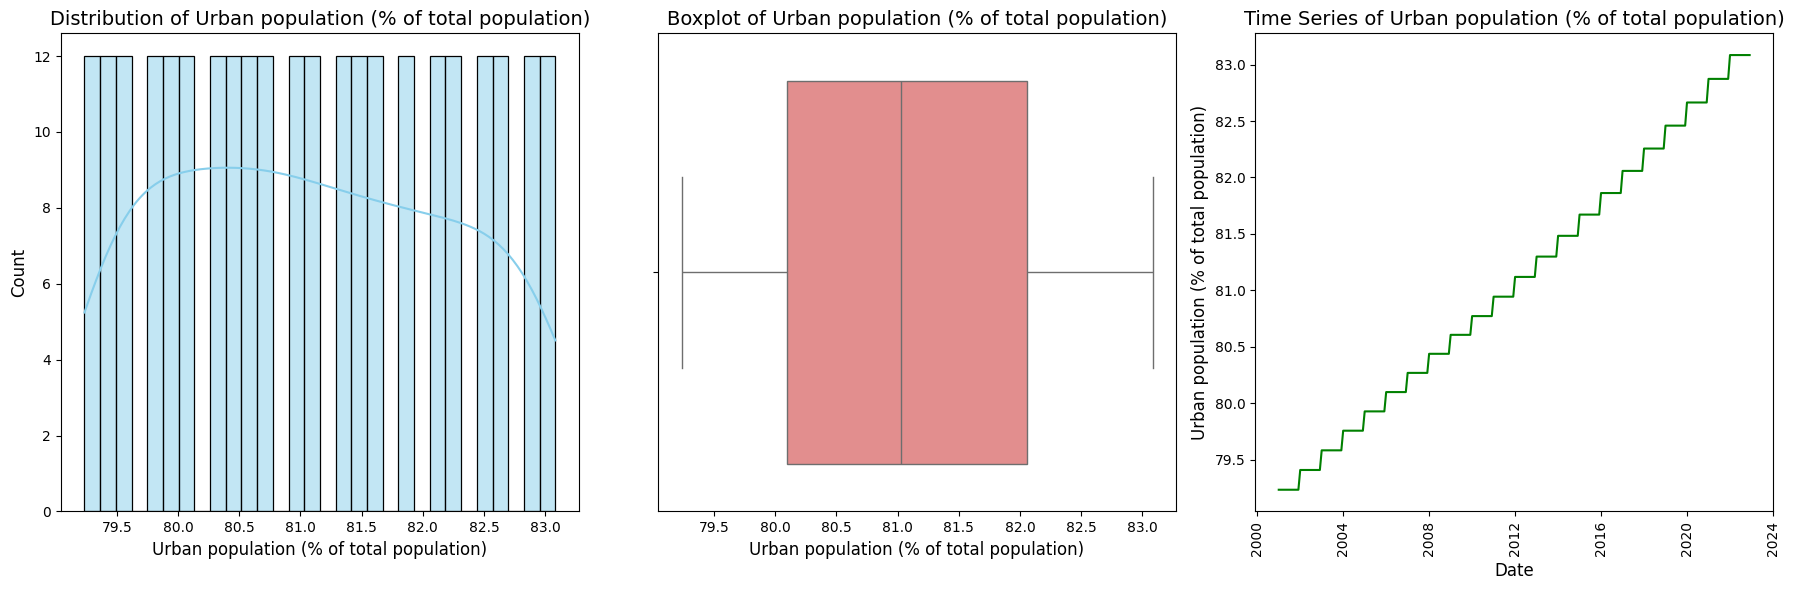

old_percent
Skew: 0.68



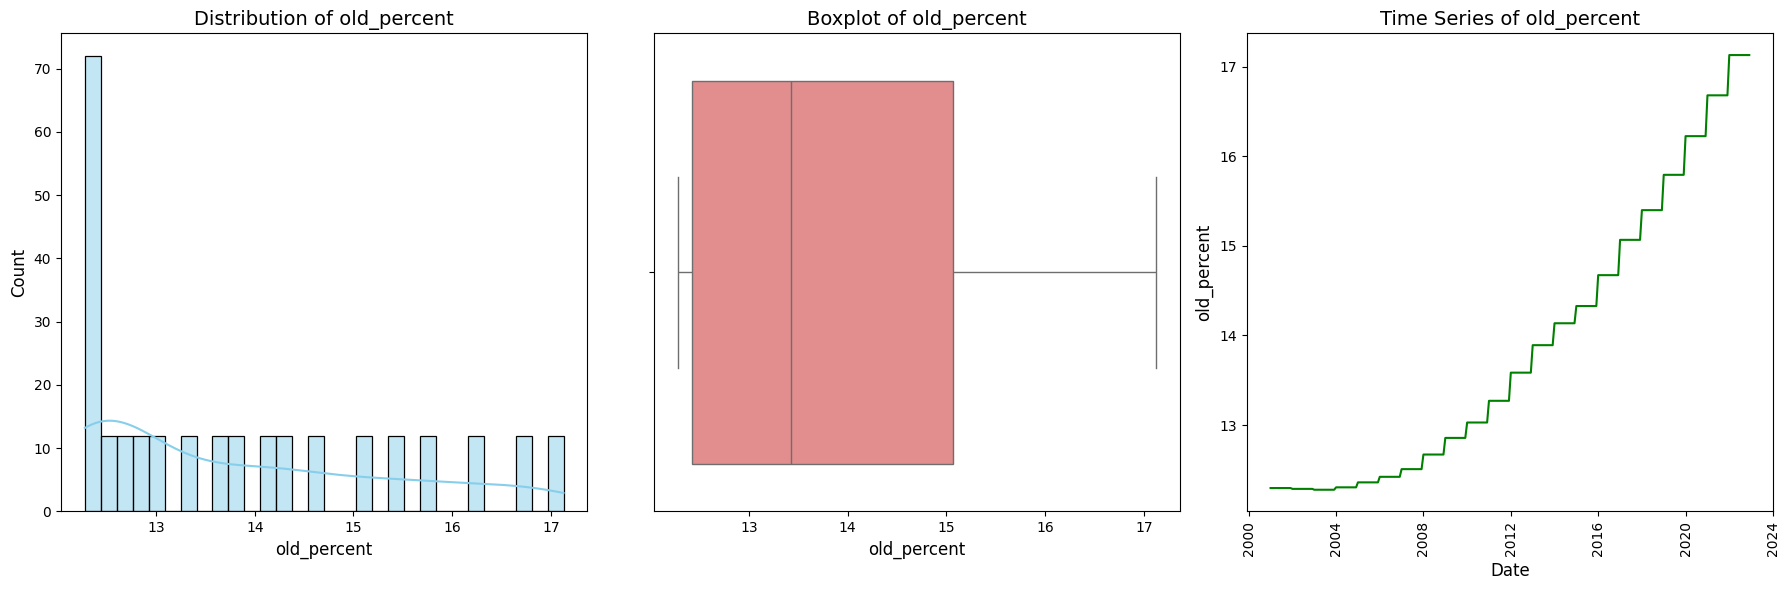

Subsidy
Skew: 0.33



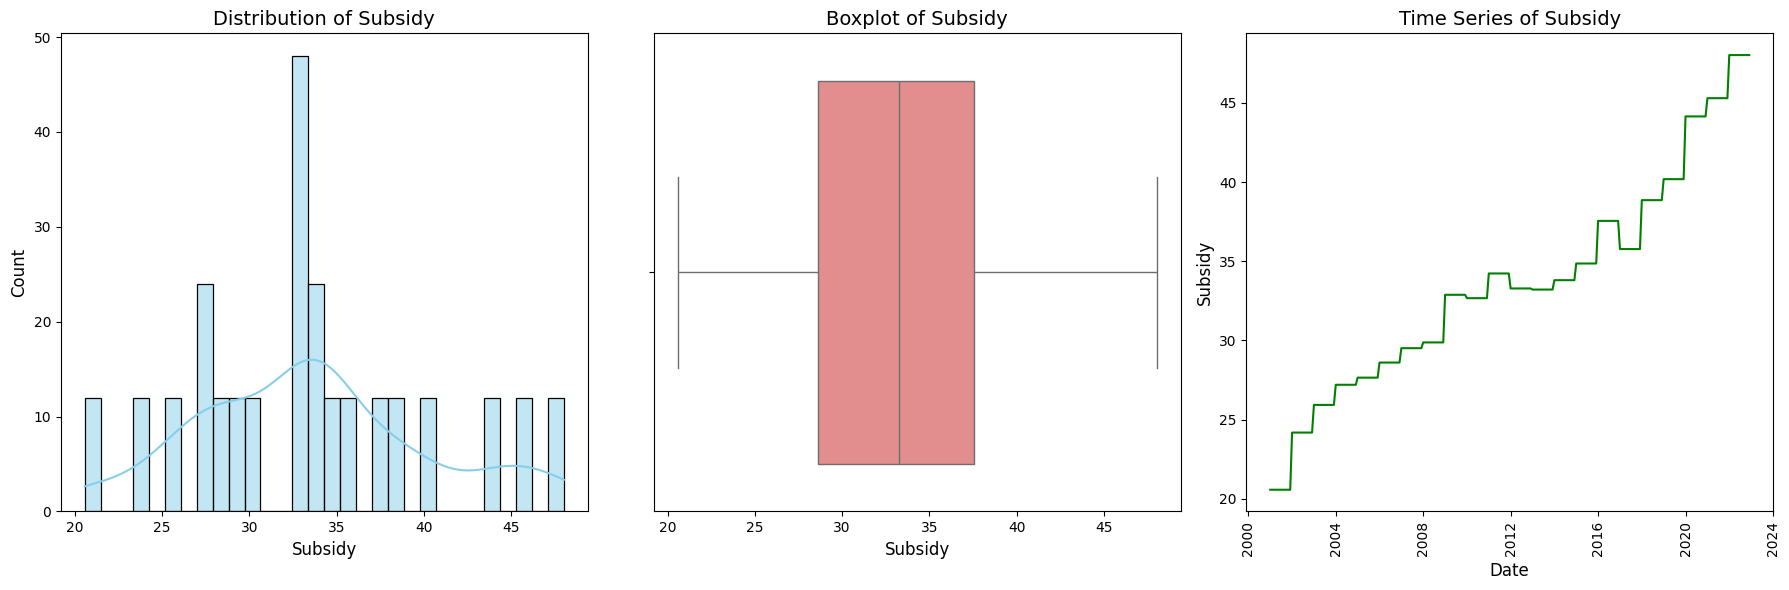

Num_Households
Skew: -0.12



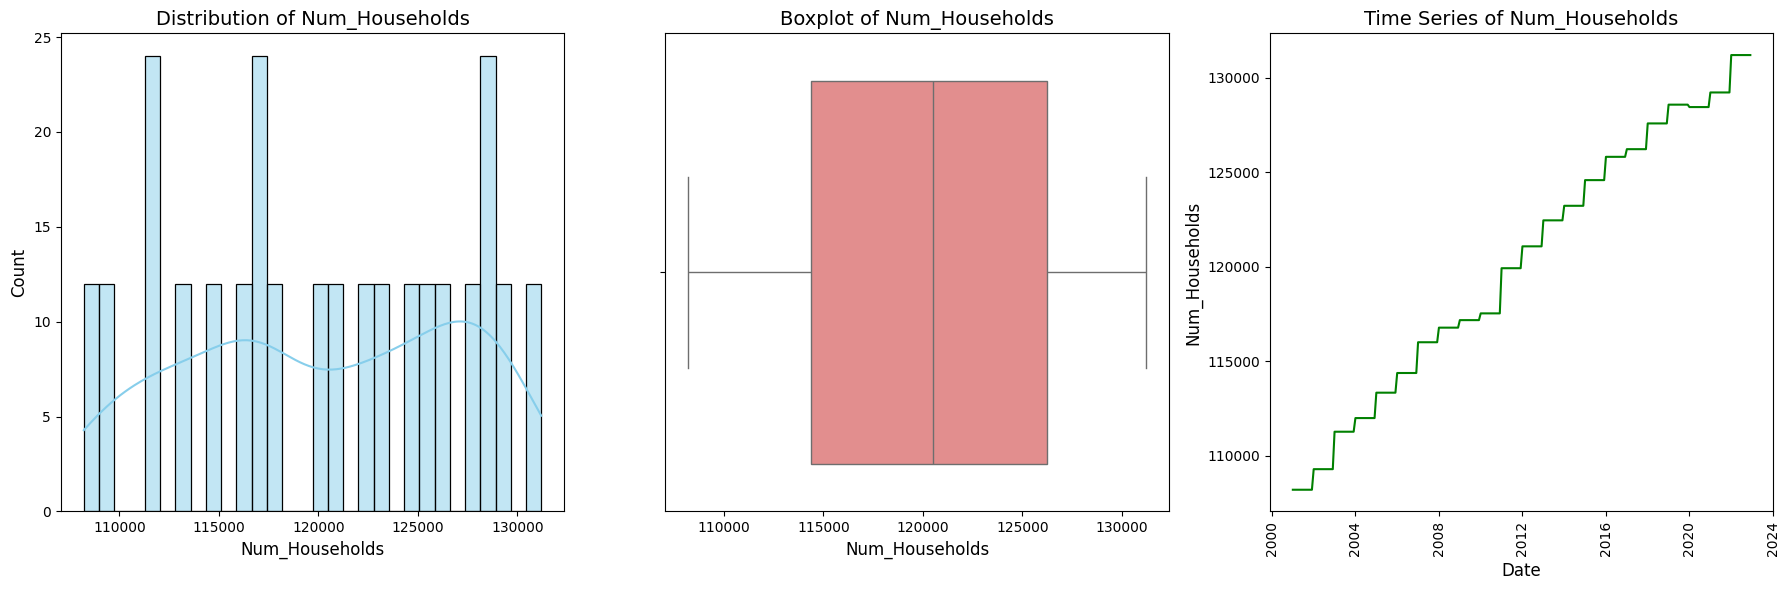

In [131]:
# Loop through each column in the DataFrame
for col in df.columns:
    # Calculate the skewness
    skewness = round(df[col].skew(), 2)

    # Print the column name and its skewness
    print(f"{col}\nSkew: {skewness}\n")

    # Create a figure with a specified size
    plt.figure(figsize=(18, 6))

    # Create a subplot for the distribution plot
    plt.subplot(1, 3, 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)

    # Create a subplot for the box plot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)

    # Create a subplot for the time series plot
    plt.subplot(1, 3, 3)
    plt.plot(df.index, df[col], color='green')
    plt.title(f'Time Series of {col}', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.xticks(rotation=90)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()


## Box-Cox Transforamtion

In [132]:
import pandas as pd
from scipy.stats import boxcox
import numpy as np


# Apply Box-Cox transformation
transformed_df = df.copy()
lambdas = {}
for column in transformed_df.columns:
    transformed_df[column], lambdas[column] = boxcox(transformed_df[column] + 1)  # Ensure data is positive

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [133]:
transformed_df.head()

CSUSHPISA  Per_Capita_GDP  Working_Population    Houses       CPI  \
DATE                                                                            
2001-01-01   1.120838        0.527575       2.677952e+110  0.724020  8.072896   
2001-02-01   1.120932        0.527575       2.710071e+110  0.720543  8.078098   
2001-03-01   1.121019        0.527575       2.728346e+110  0.724020  8.079397   
2001-04-01   1.121095        0.527575       2.781111e+110  0.727345  8.083290   
2001-05-01   1.121167        0.527575       2.814353e+110  0.730526  8.094936   

              UNRATE  Cons_Materials  FEDFUNDS    Income  \
DATE                                                       
2001-01-01  0.783280        1.310783  1.112295  1.019666   
2001-02-01  0.783280        1.310853  1.090793  1.019667   
2001-03-01  0.786615        1.310853  1.082212  1.019667   
2001-04-01  0.789823        1.310870  1.055557  1.019667   
2001-05-01  0.786615        1.311162  1.019481  1.019666   

            Urban population (% of total population)  old_percent   Subsidy  \
DATE                                                                          
2001-01-01                                  0.283411     0.246299  5.171769   
2001-02-01                                  0.283411     0.246299  5.171769   
2001-03-01                                  0.283411     0.246299  5.171769   
2001-04-01                                  0.283411     0.246299  5.171769   
2001-05-01                                  0.283411     0.246299  5.171769   

            Num_Households  
DATE                        
2001-01-01    8.417960e+09  
2001-02-01    8.417960e+09  
2001-03-01    8.417960e+09  
2001-04-01    8.417960e+09  
2001-05-01    8.417960e+09

In [134]:
lambdas

{'CSUSHPISA': -0.8778867396241805,
 'Per_Capita_GDP': -1.8954661116019036,
 'Working_Population': 13.512234667760783,
 'Houses': -1.1558308663548877,
 'CPI': 0.16087889113417372,
 'UNRATE': -1.050945069142113,
 'Cons_Materials': -0.7438853494530051,
 'FEDFUNDS': -0.6395881073160347,
 'Income': -0.9805980413077651,
 'Urban population (% of total population)': -3.528444006414676,
 'old_percent': -4.060002203179094,
 'Subsidy': 0.3142200941899706,
 'Num_Households': 2.0327258943125712}

CSUSHPISA
Skew: 0.02



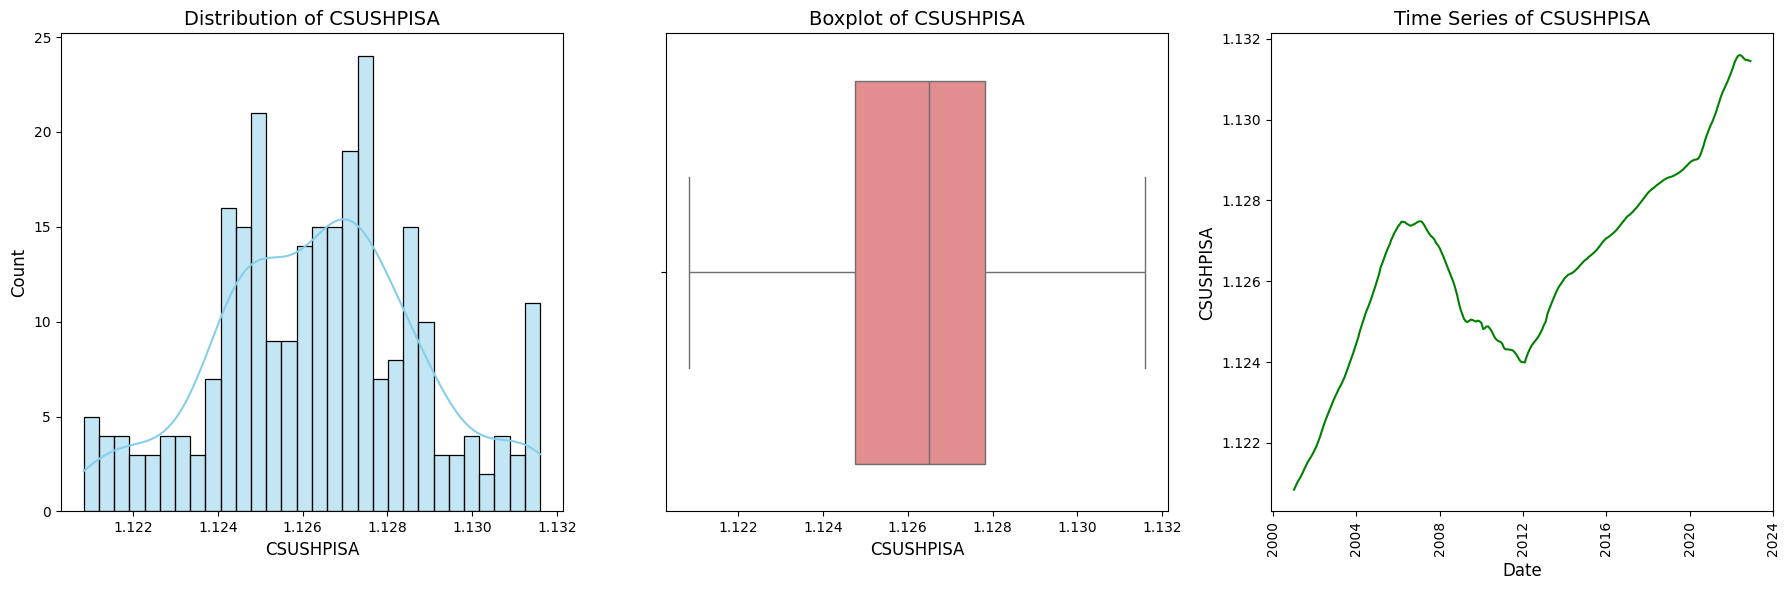

Per_Capita_GDP
Skew: 0



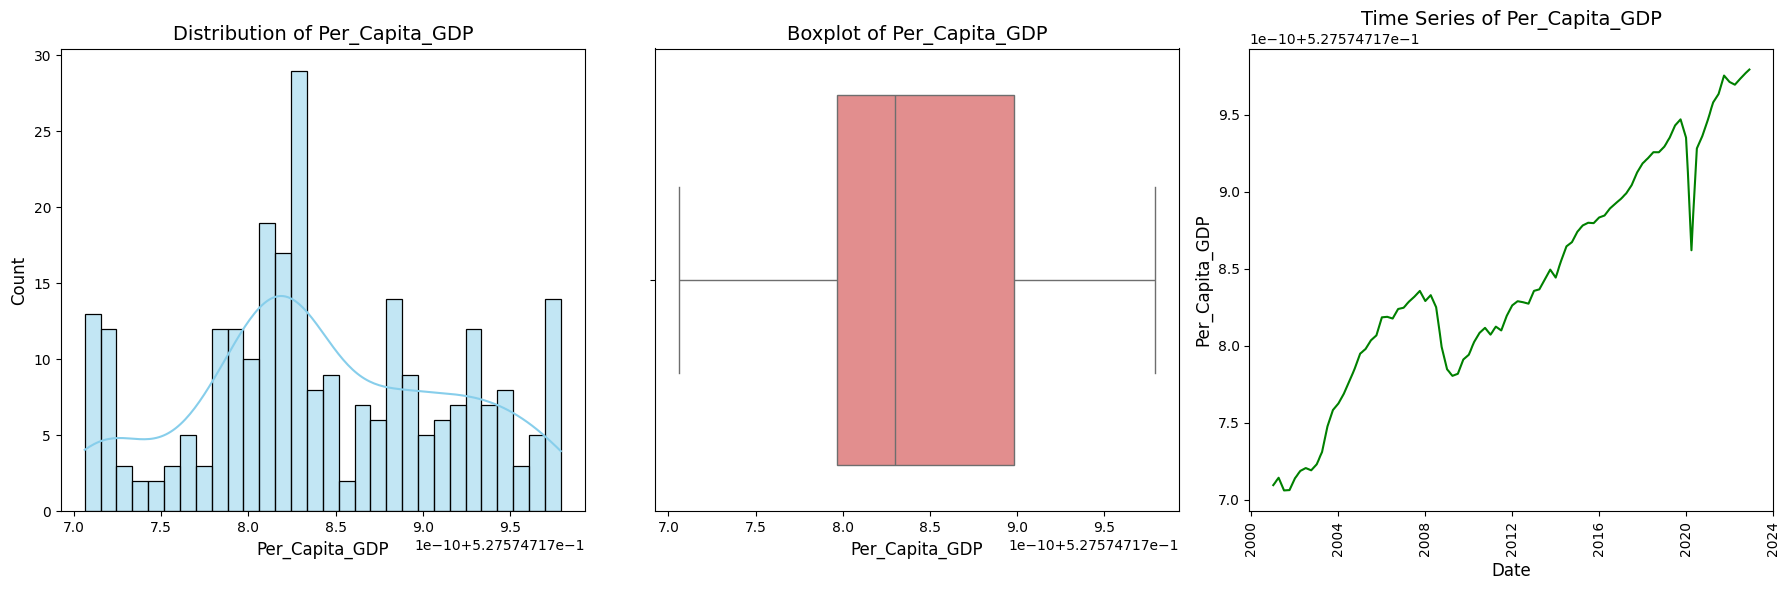

Working_Population
Skew: nan



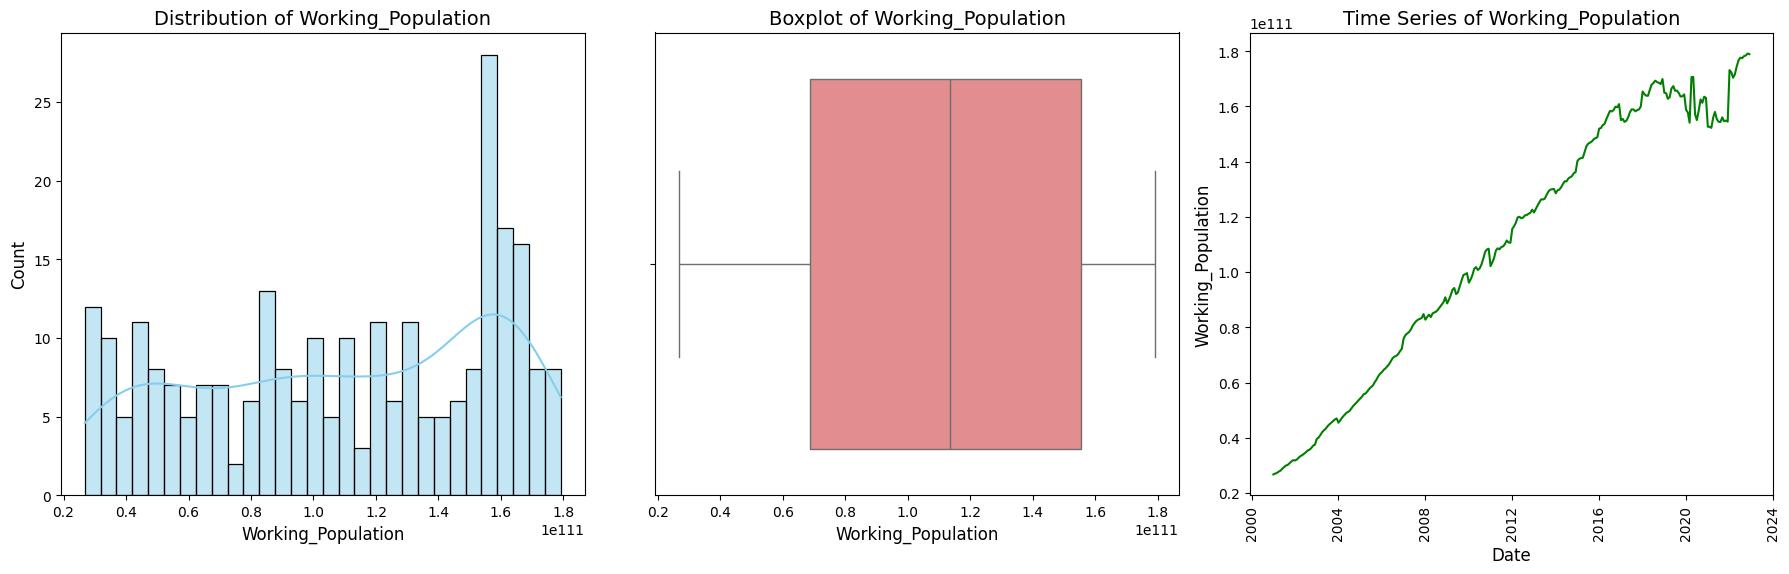

Houses
Skew: 0.09



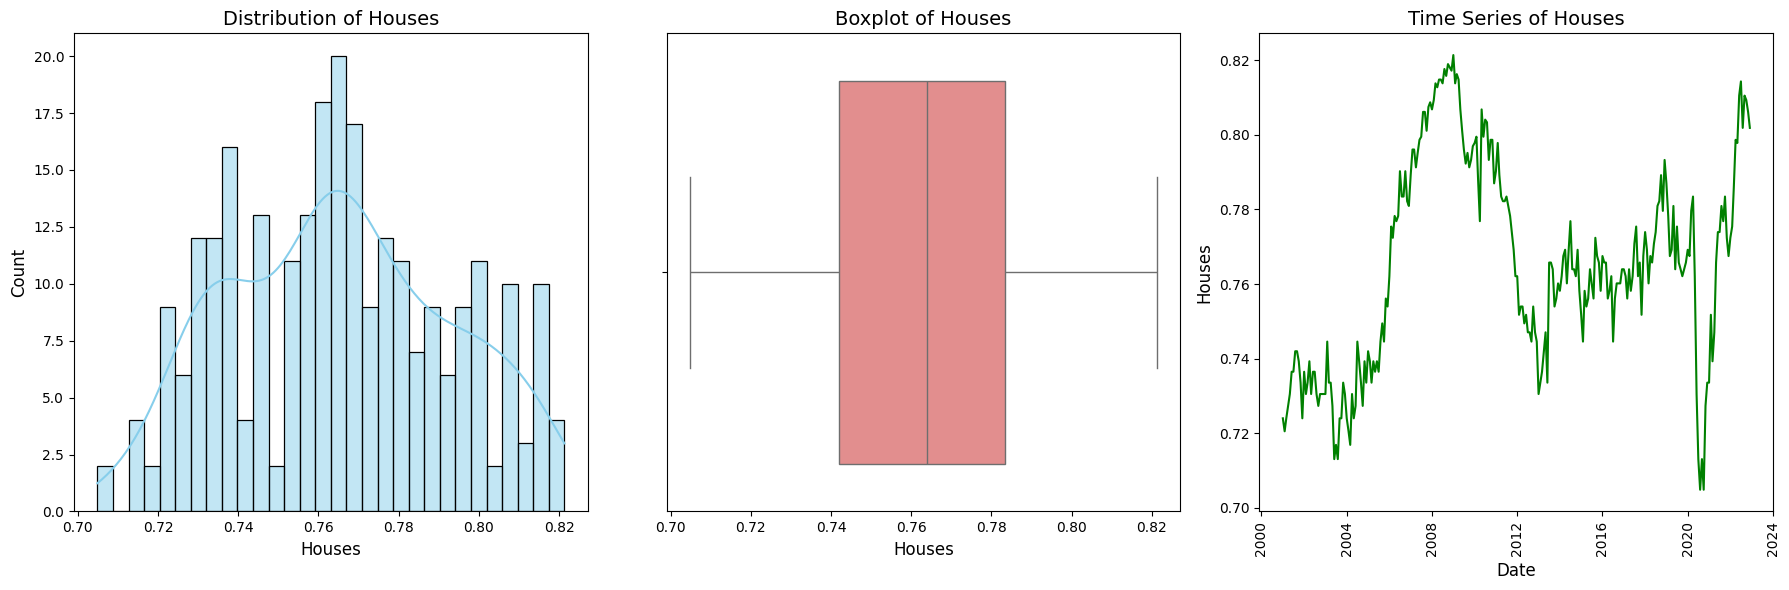

CPI
Skew: -0.01



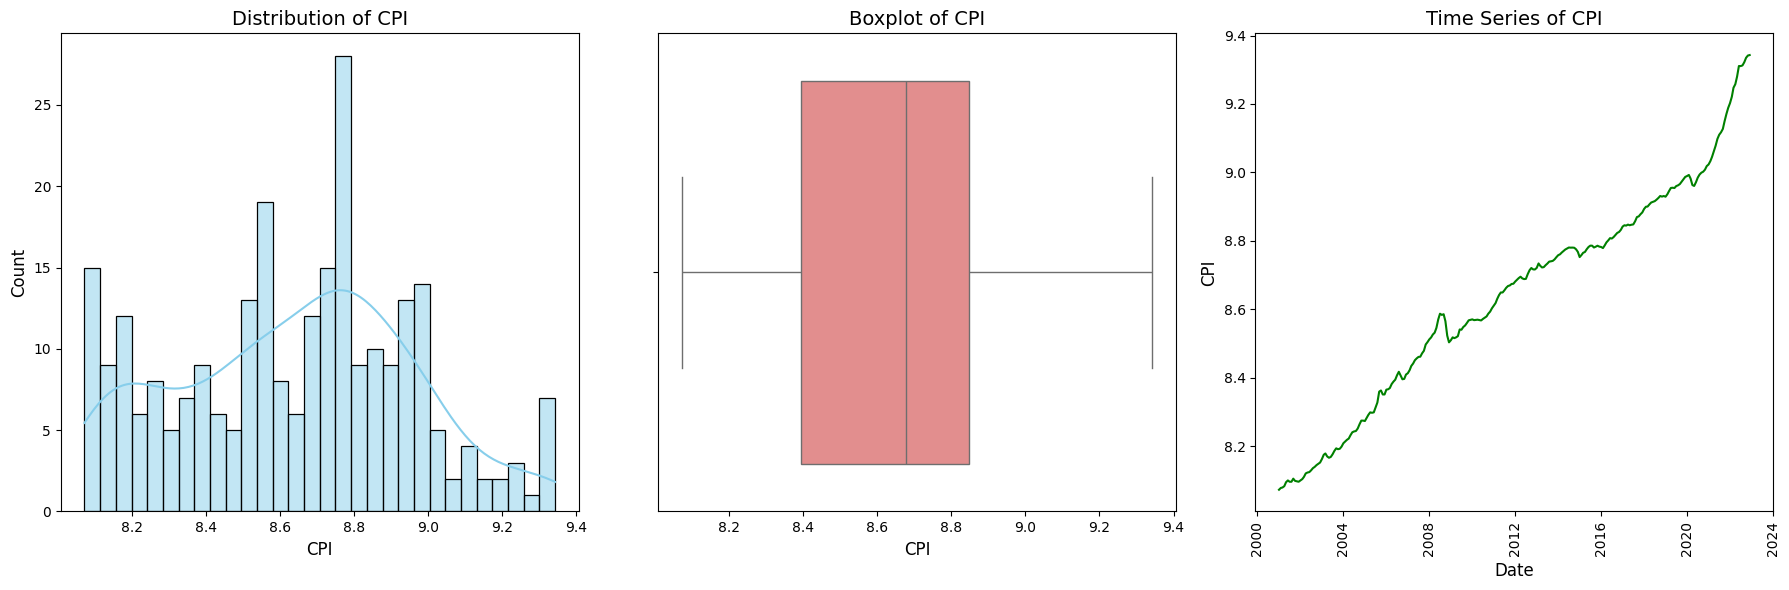

UNRATE
Skew: 0.08



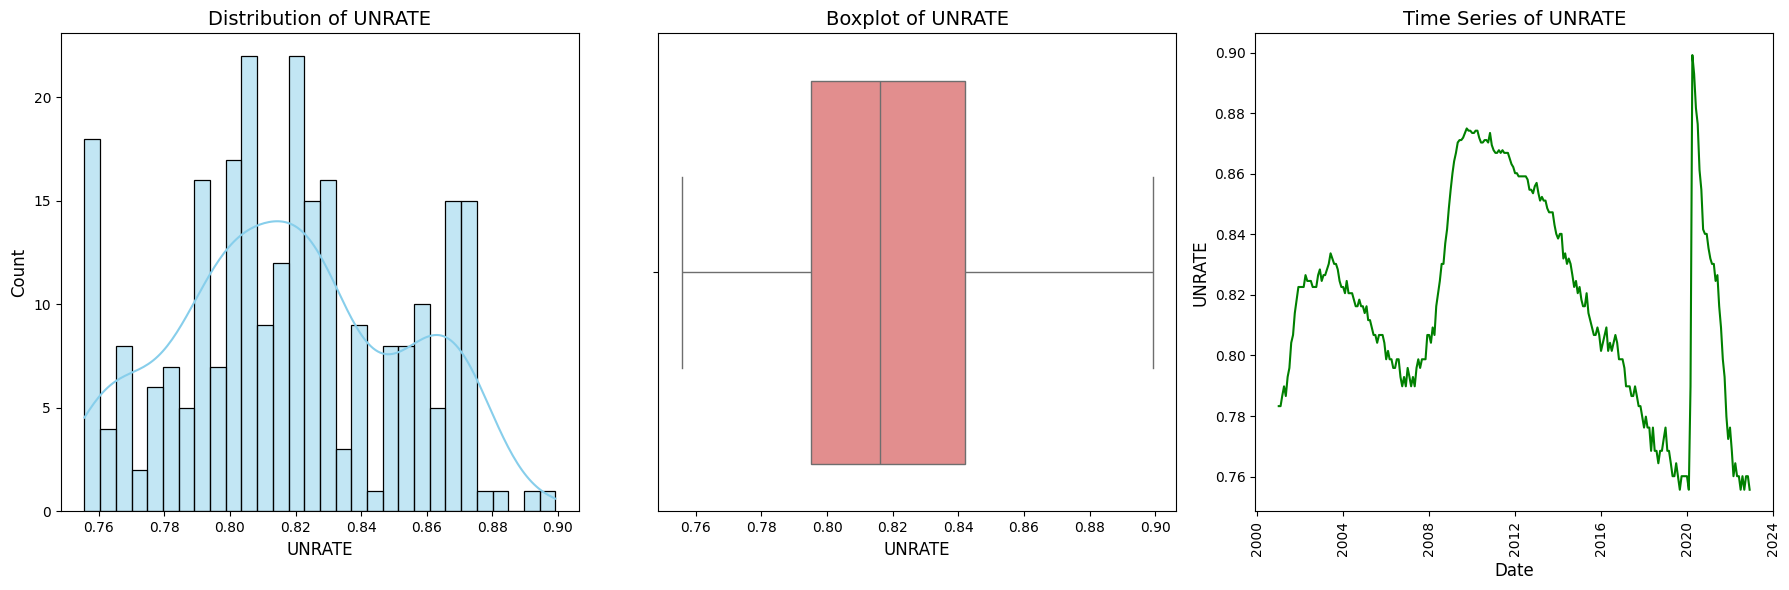

Cons_Materials
Skew: 0.0



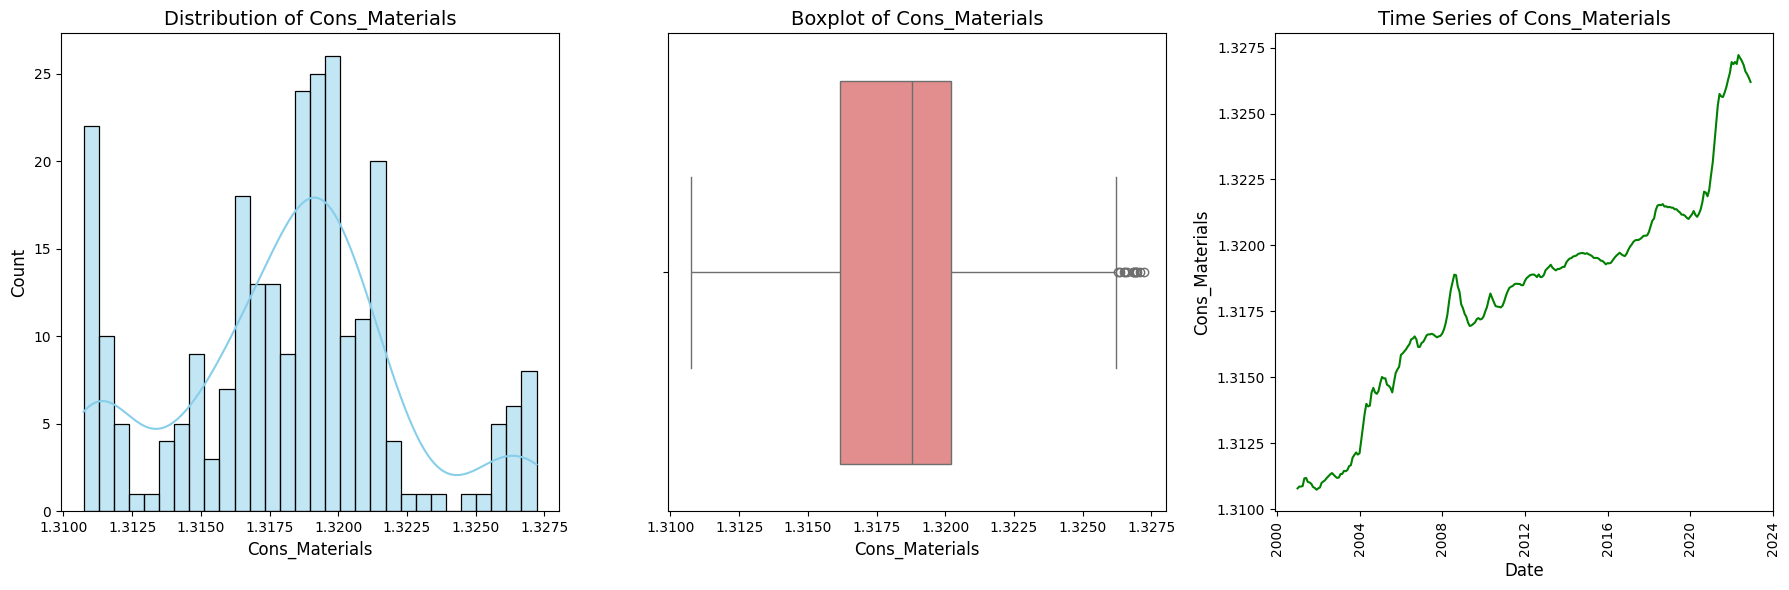

FEDFUNDS
Skew: 0.2



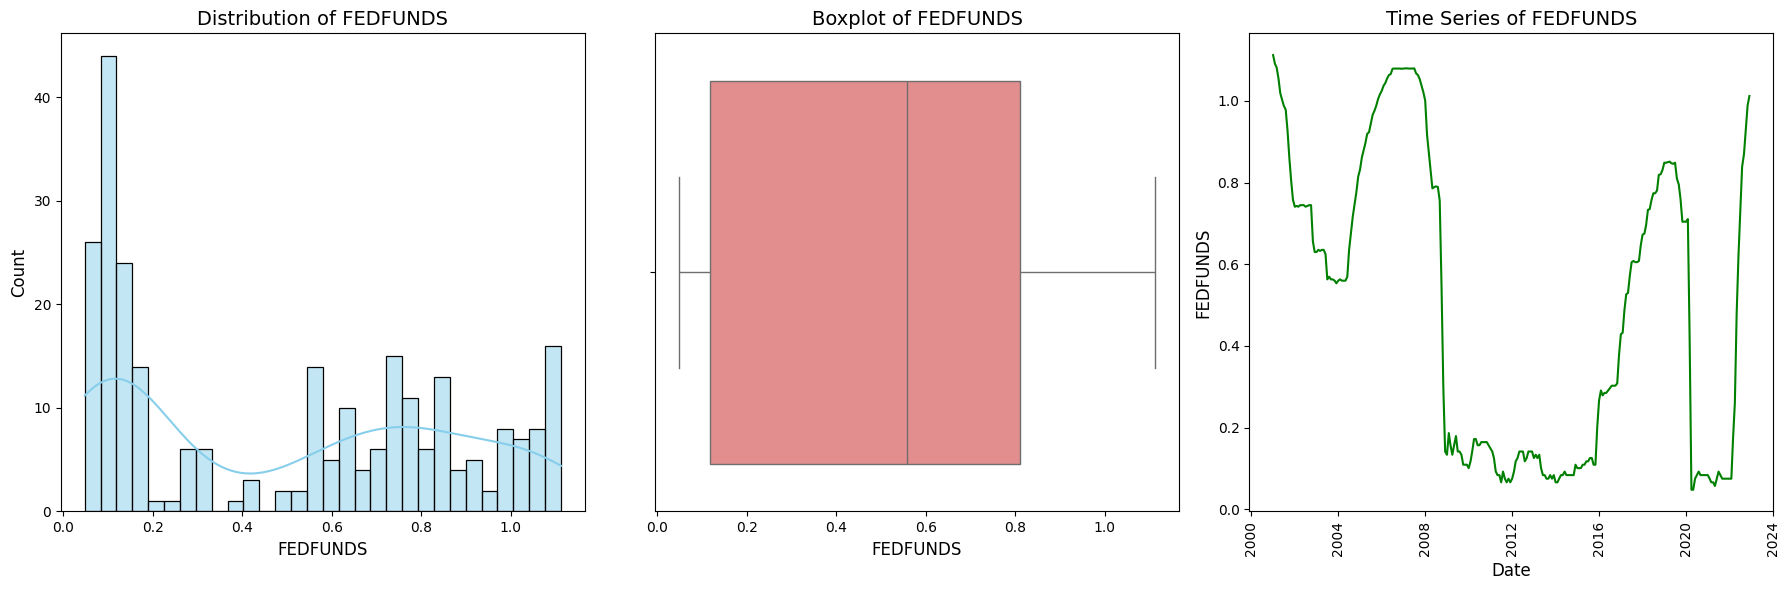

Income
Skew: 0.04



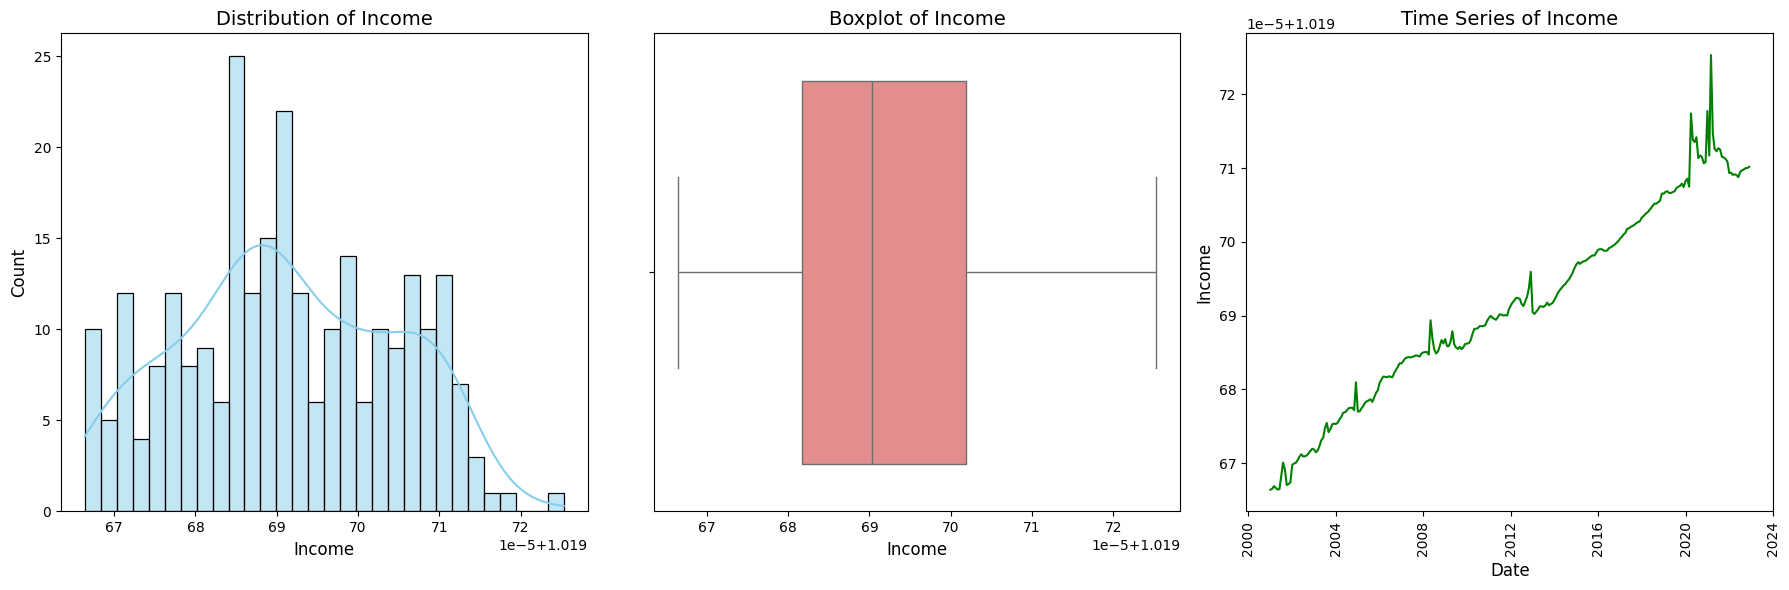

Urban population (% of total population)
Skew: 0



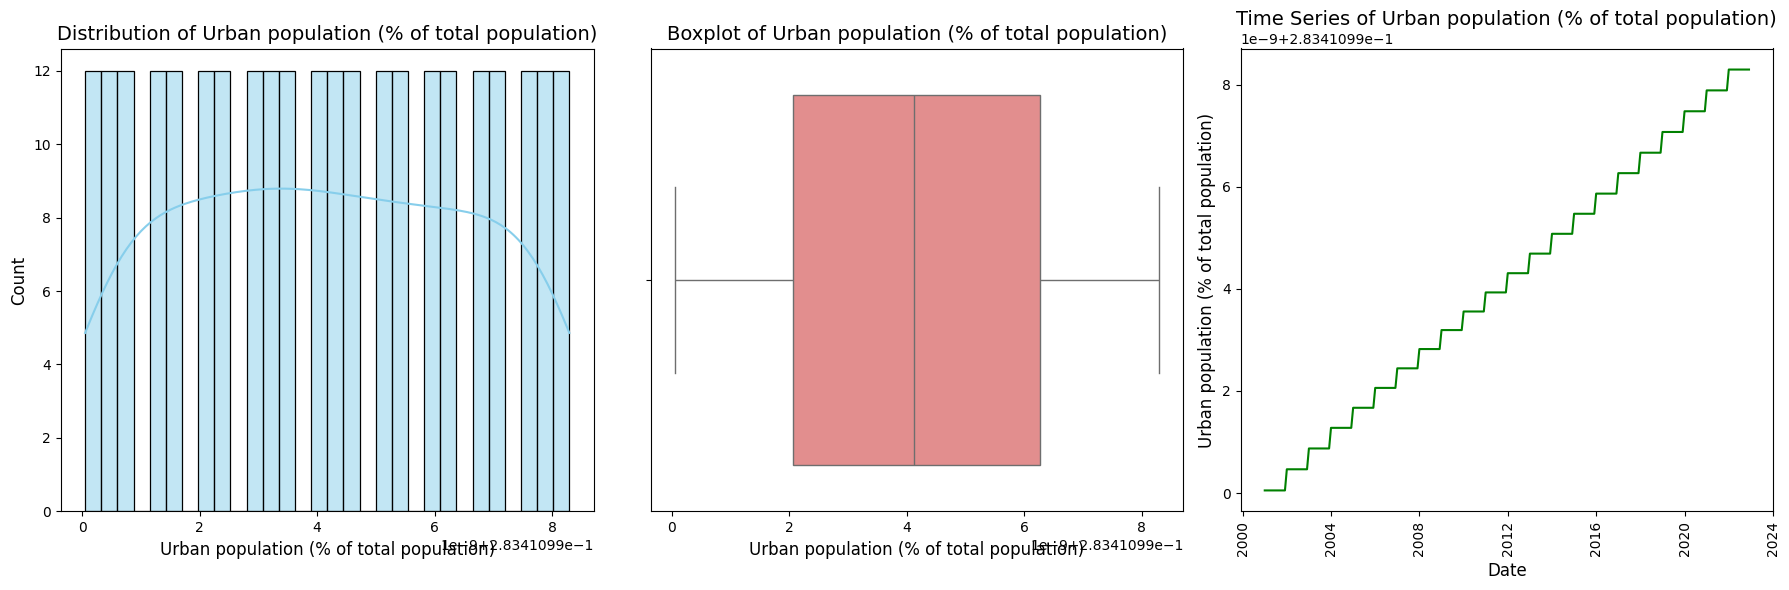

old_percent
Skew: 0.0



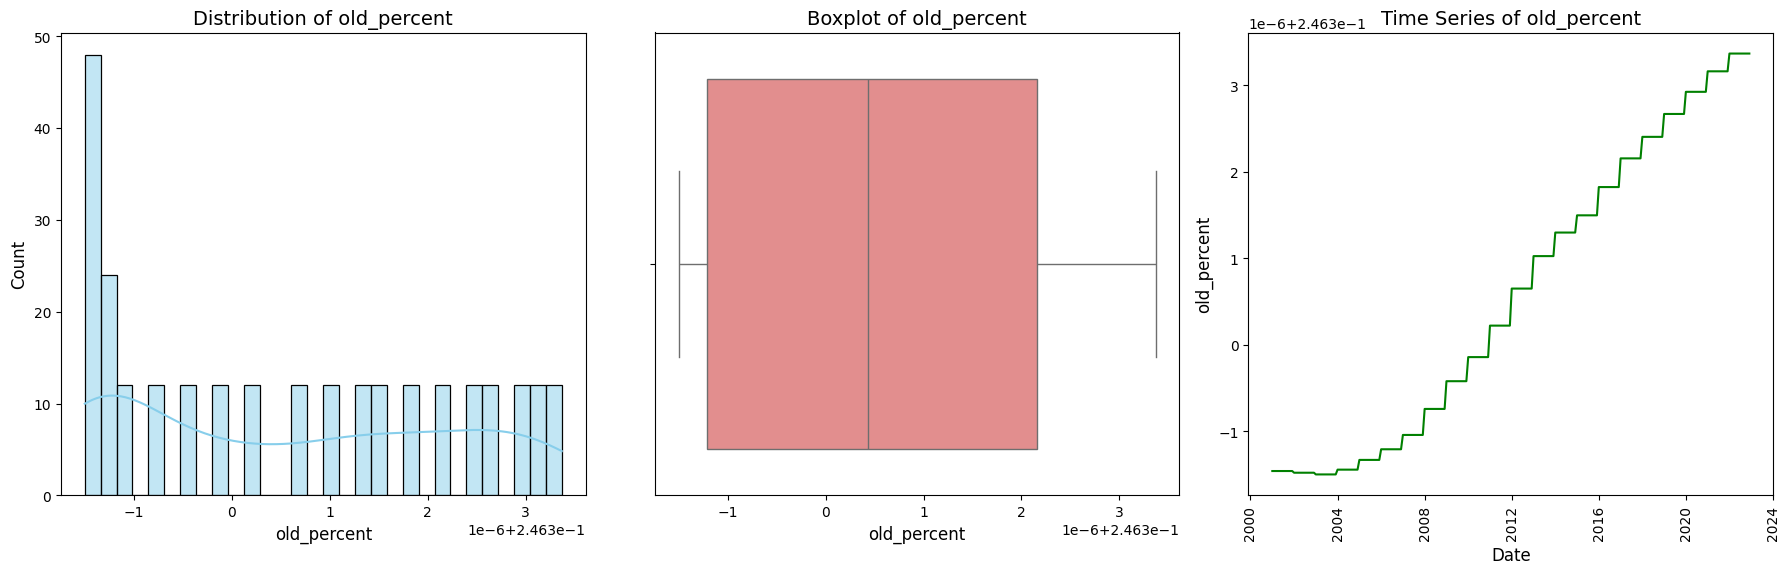

Subsidy
Skew: -0.01



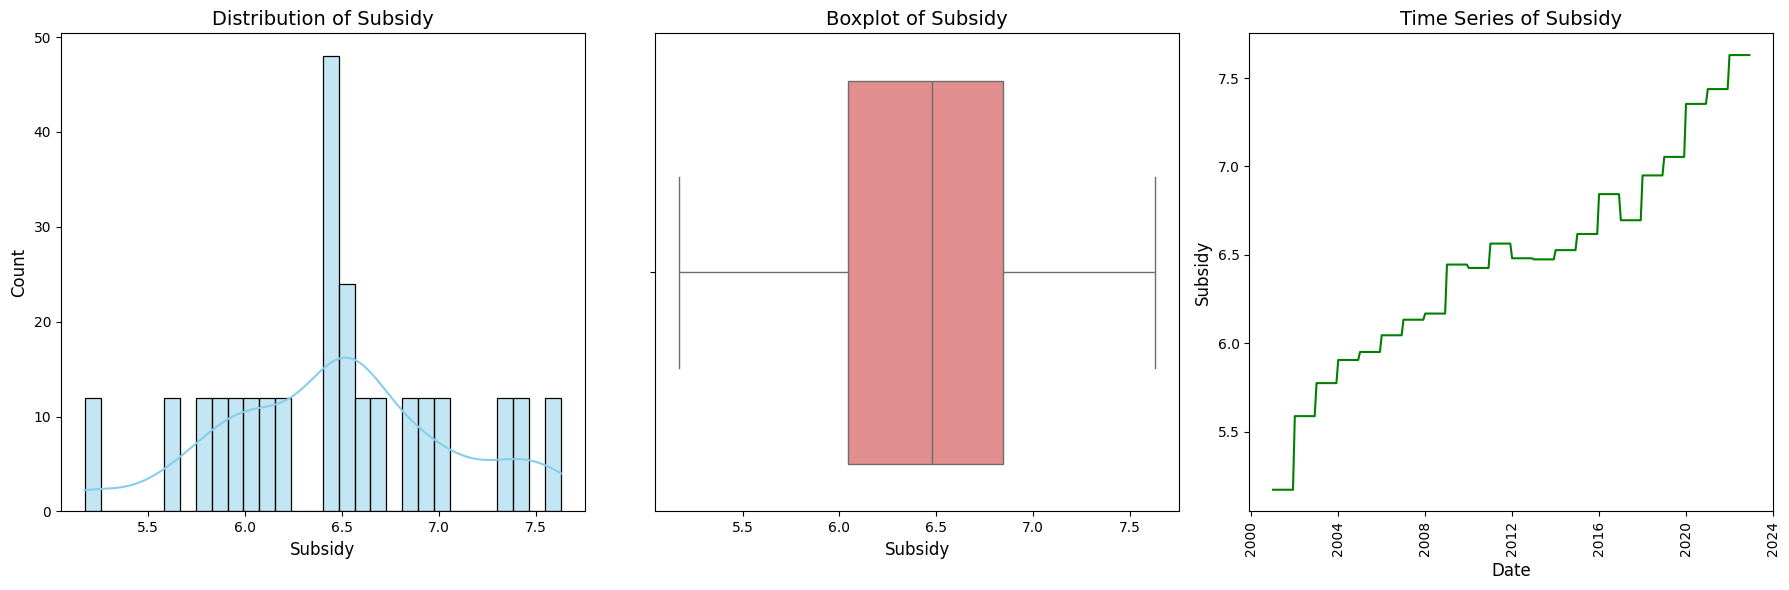

Num_Households
Skew: -0.05



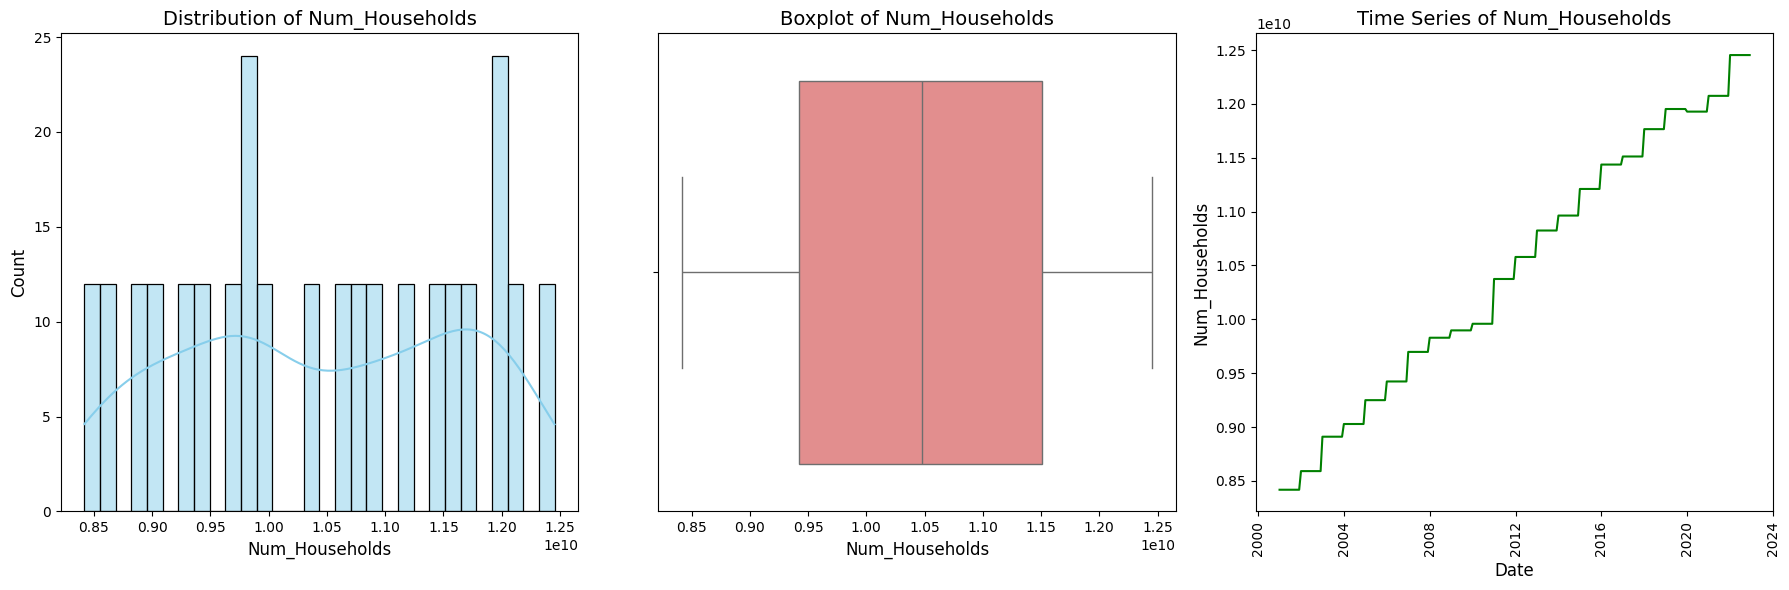

In [135]:
# Loop through each column in the DataFrame
for col in transformed_df.columns:
    # Calculate the skewness
    skewness = round(transformed_df[col].skew(), 2)

    # Print the column name and its skewness
    print(f"{col}\nSkew: {skewness}\n")

    # Create a figure with a specified size
    plt.figure(figsize=(18, 6))

    # Create a subplot for the distribution plot
    plt.subplot(1, 3, 1)
    sns.histplot(transformed_df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)

    # Create a subplot for the box plot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=transformed_df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)

    # Create a subplot for the time series plot
    plt.subplot(1, 3, 3)
    plt.plot(transformed_df.index, transformed_df[col], color='green')
    plt.title(f'Time Series of {col}', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.xticks(rotation=90)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()


## **Bi-variate Analysis**

In [136]:
#sns.pairplot(df)

In [137]:
# Separating the target variable and the independent variable
y = df.pop("CSUSHPISA")
X = df

In [138]:
y_transformed = transformed_df.pop("CSUSHPISA")
X_transformed = transformed_df

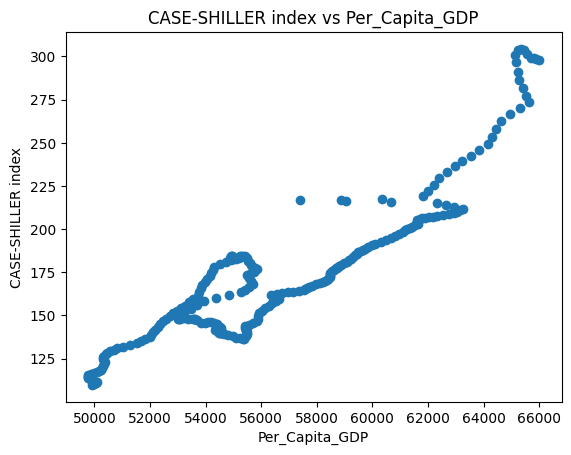

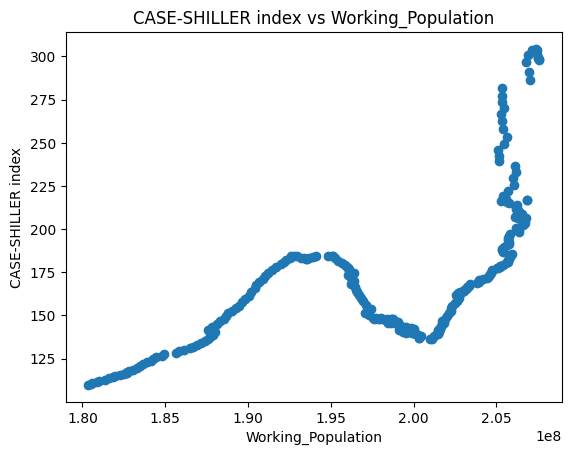

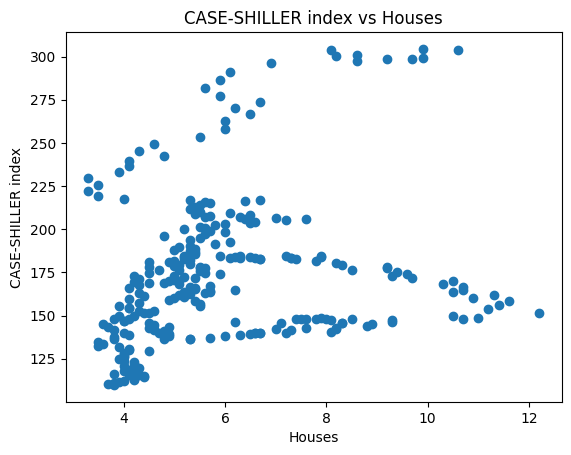

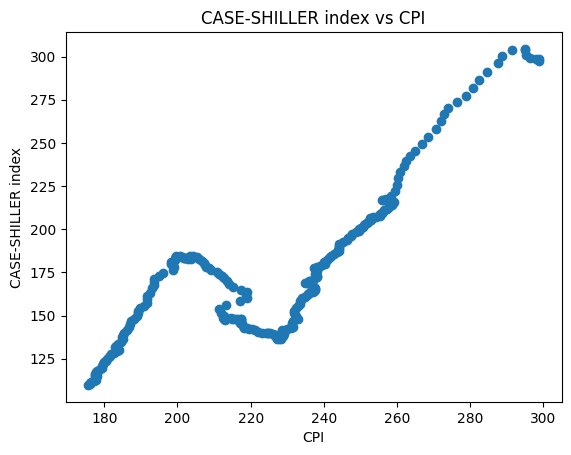

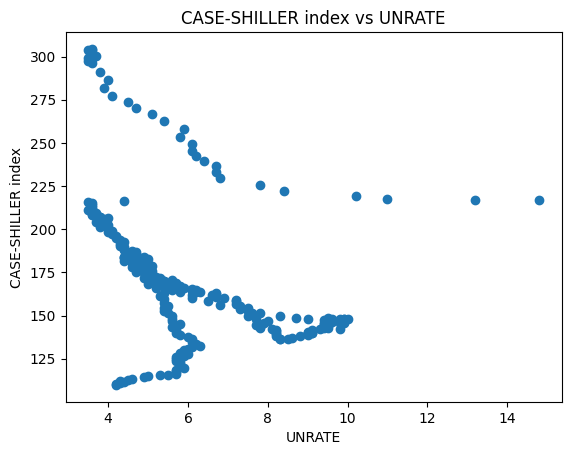

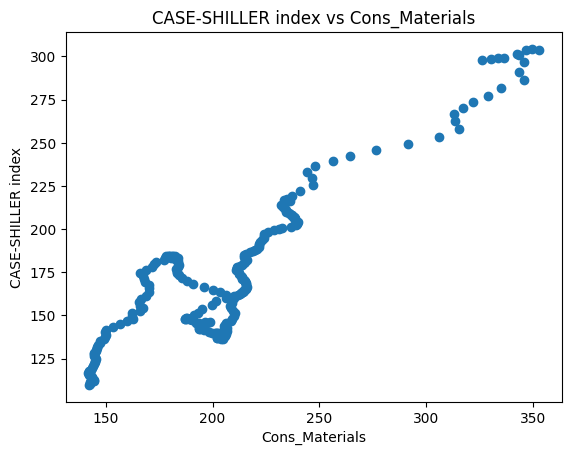

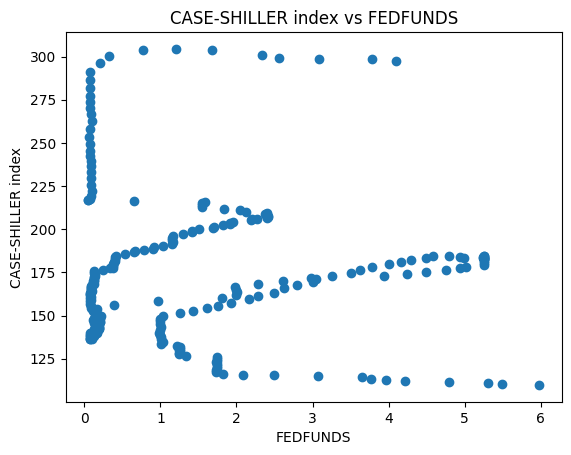

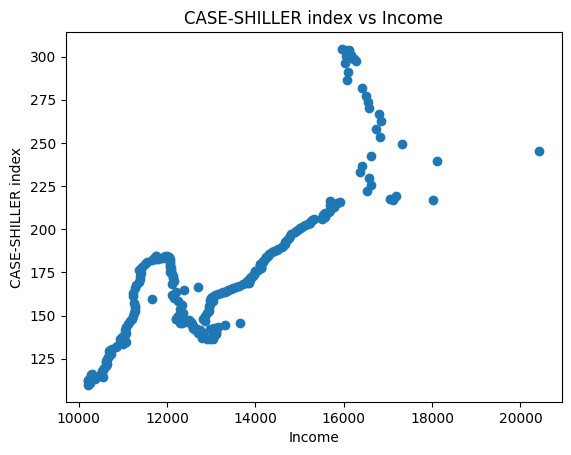

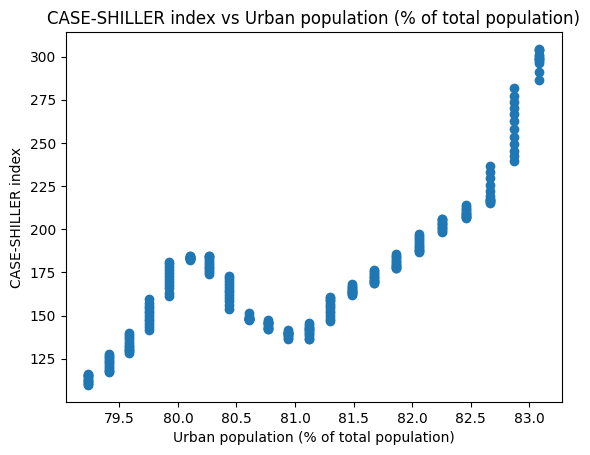

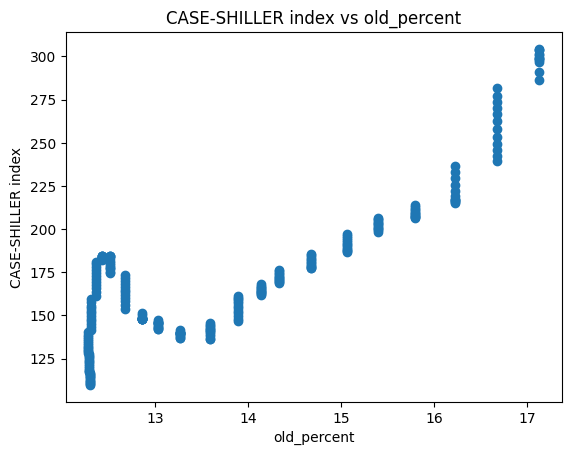

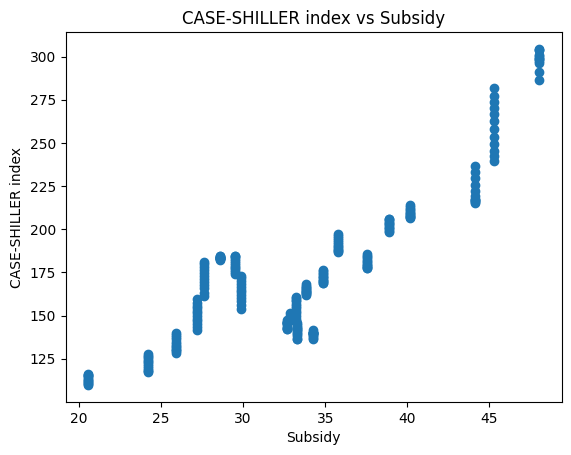

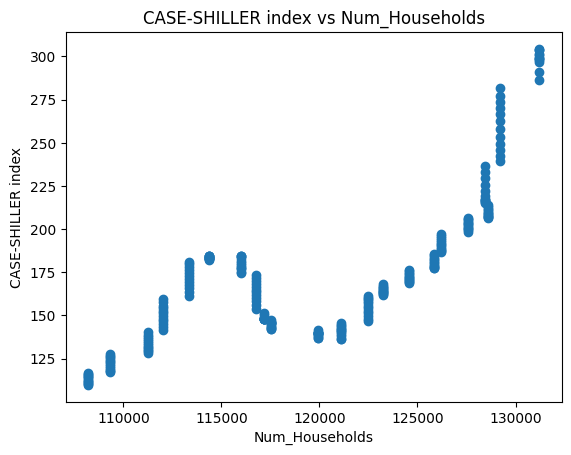

In [139]:
# Plotting scatter plots of the CASE-SHILLER index vs features

for feature in X.columns:
    plt.figure()
    plt.scatter(X[feature], y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")


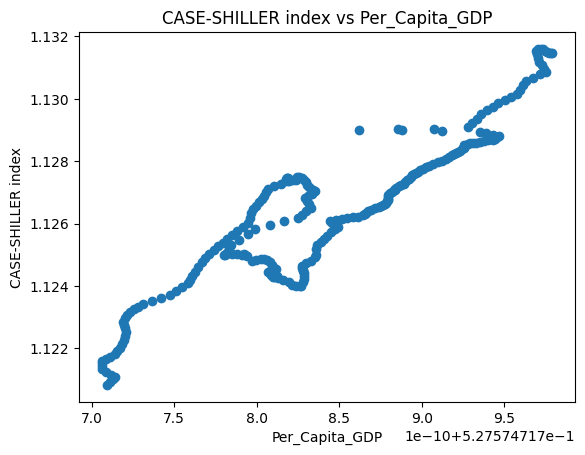

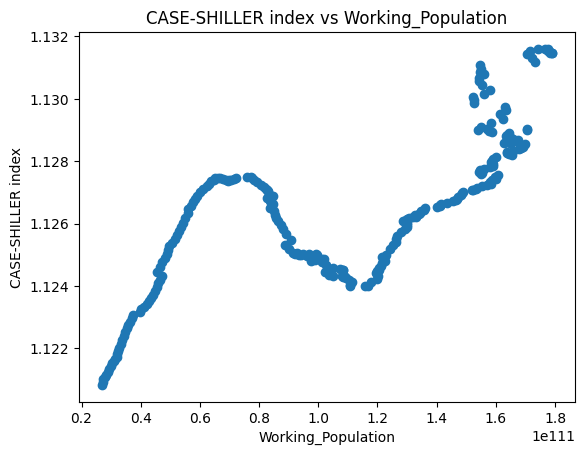

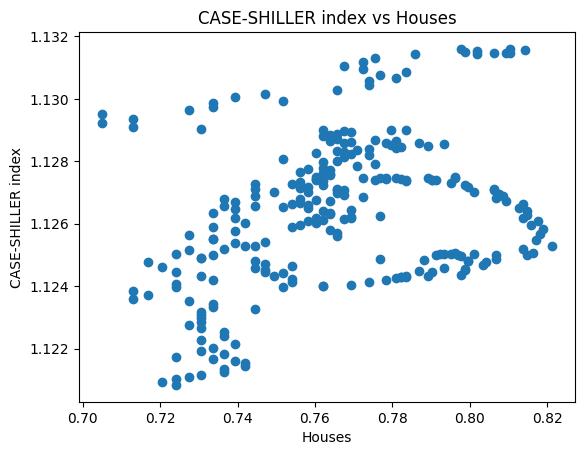

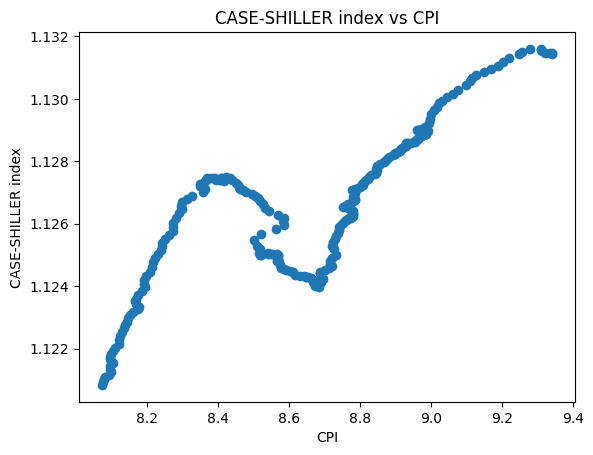

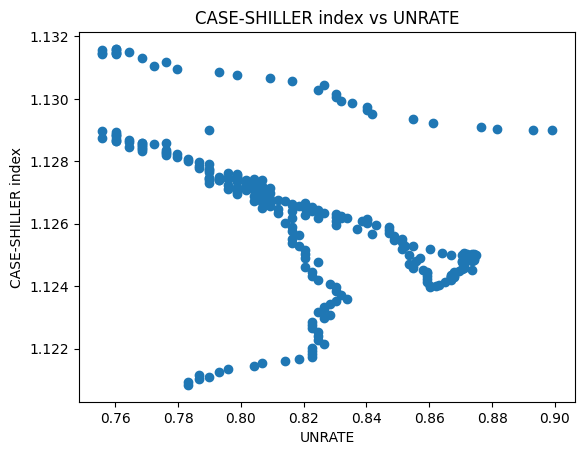

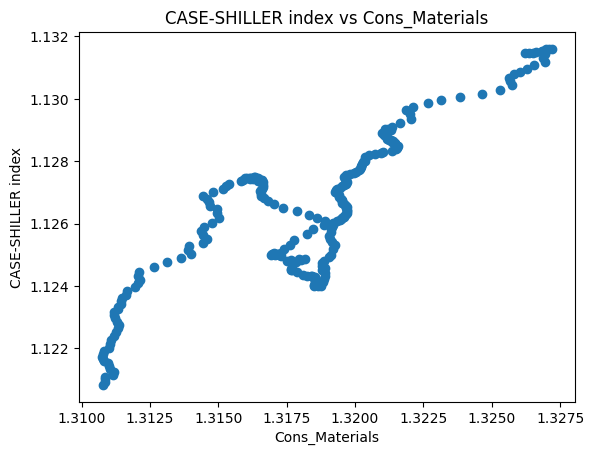

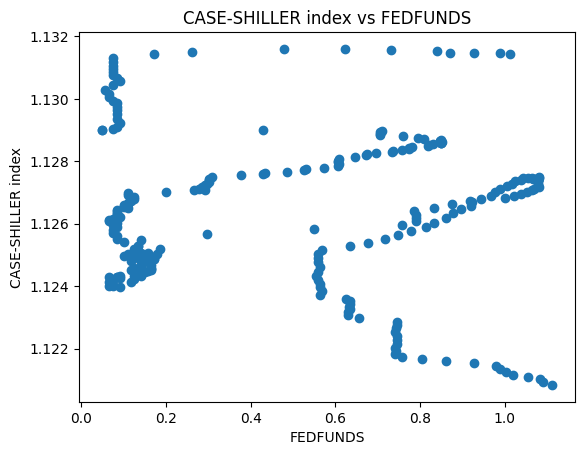

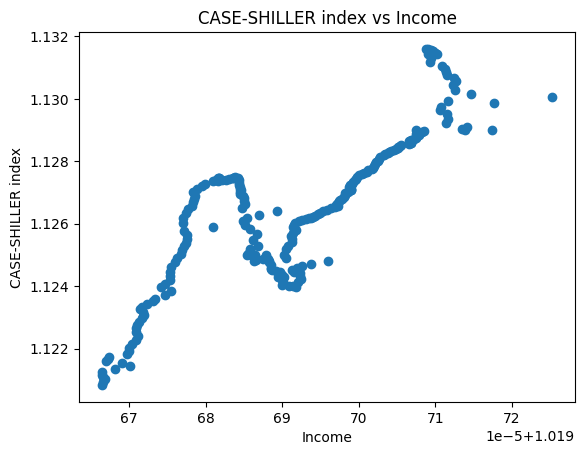

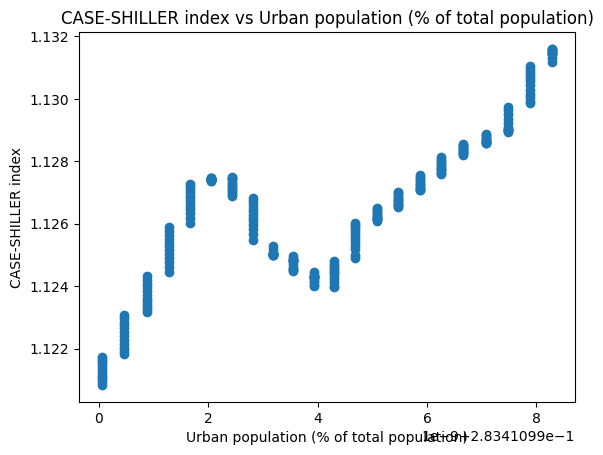

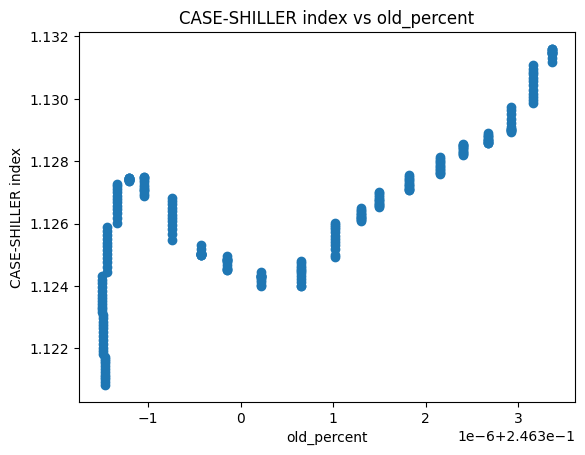

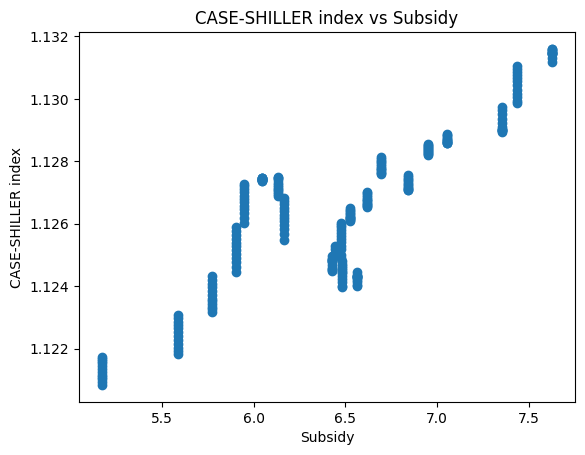

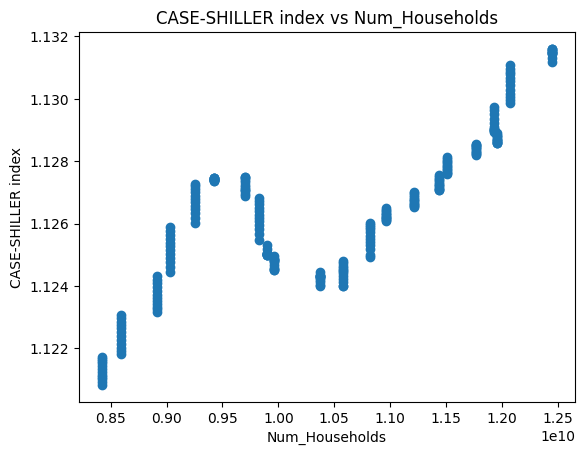

In [140]:
# Plotting scatter plots of the CASE-SHILLER index vs features

for feature in X_transformed.columns:
    plt.figure()
    plt.scatter(X_transformed[feature], y_transformed)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")

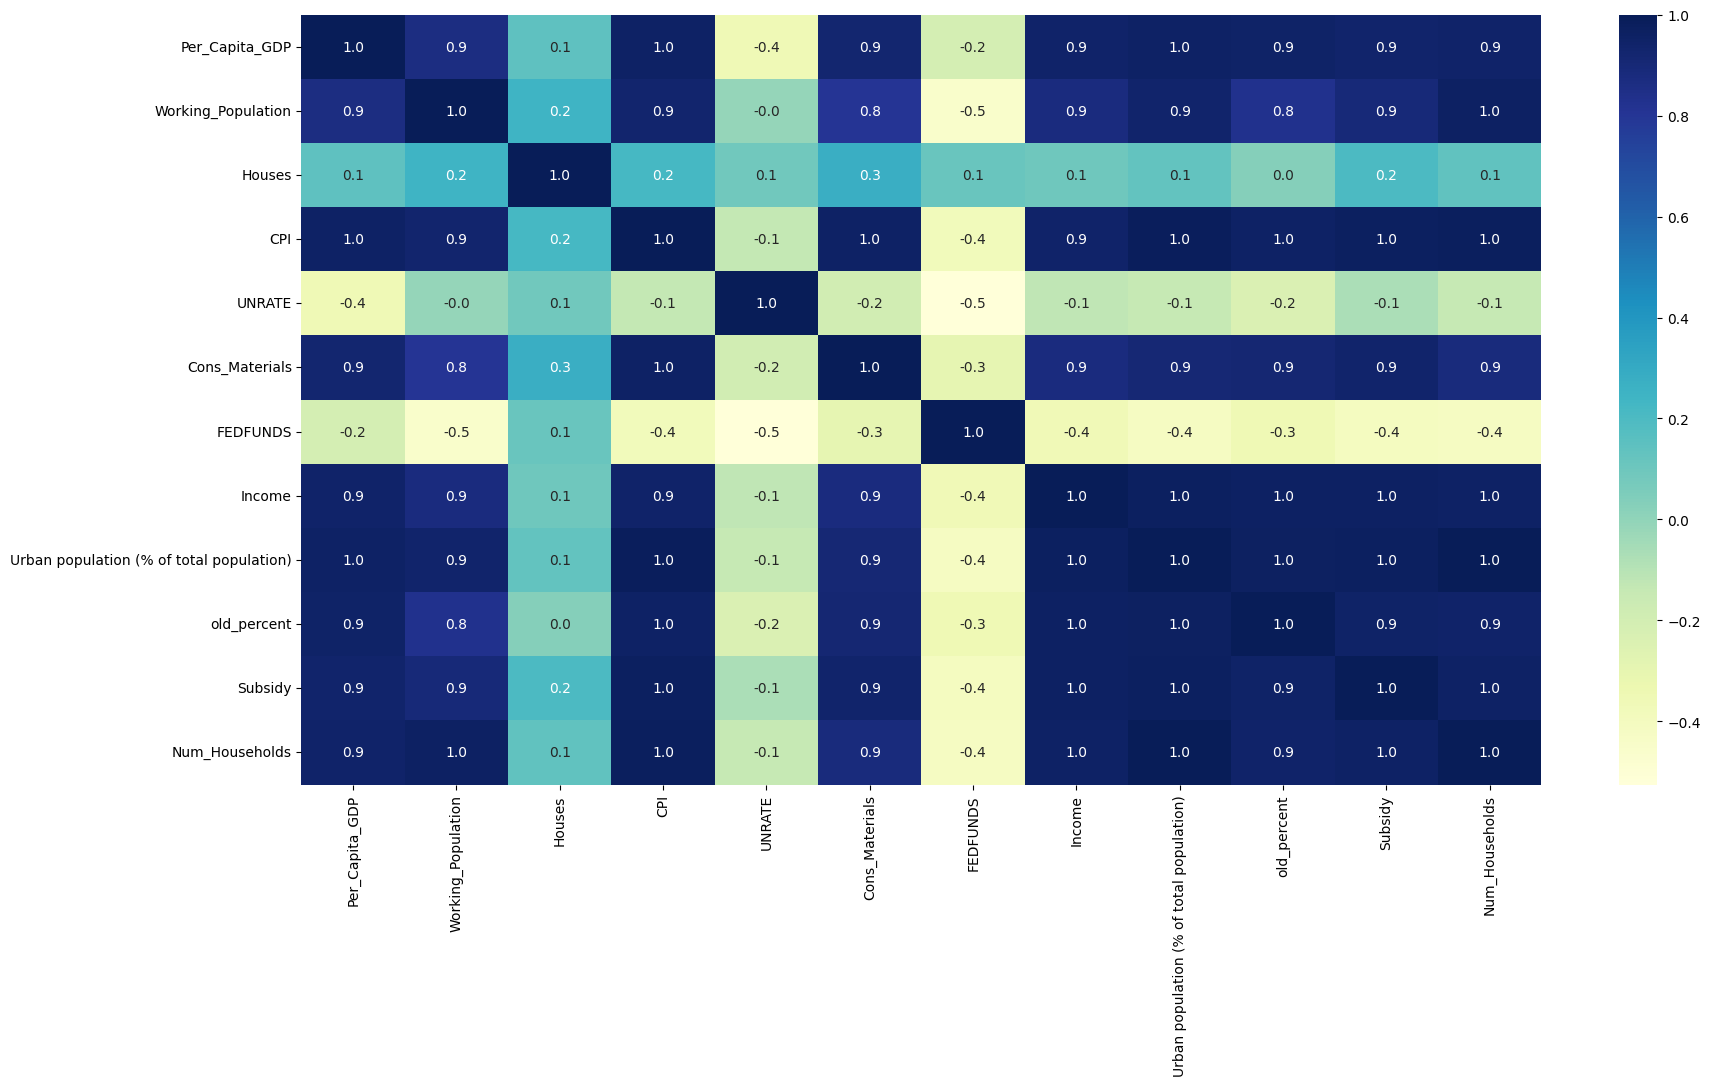

In [141]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(df.corr(), annot=True, fmt=".1f" ,cmap="YlGnBu", cbar=True)

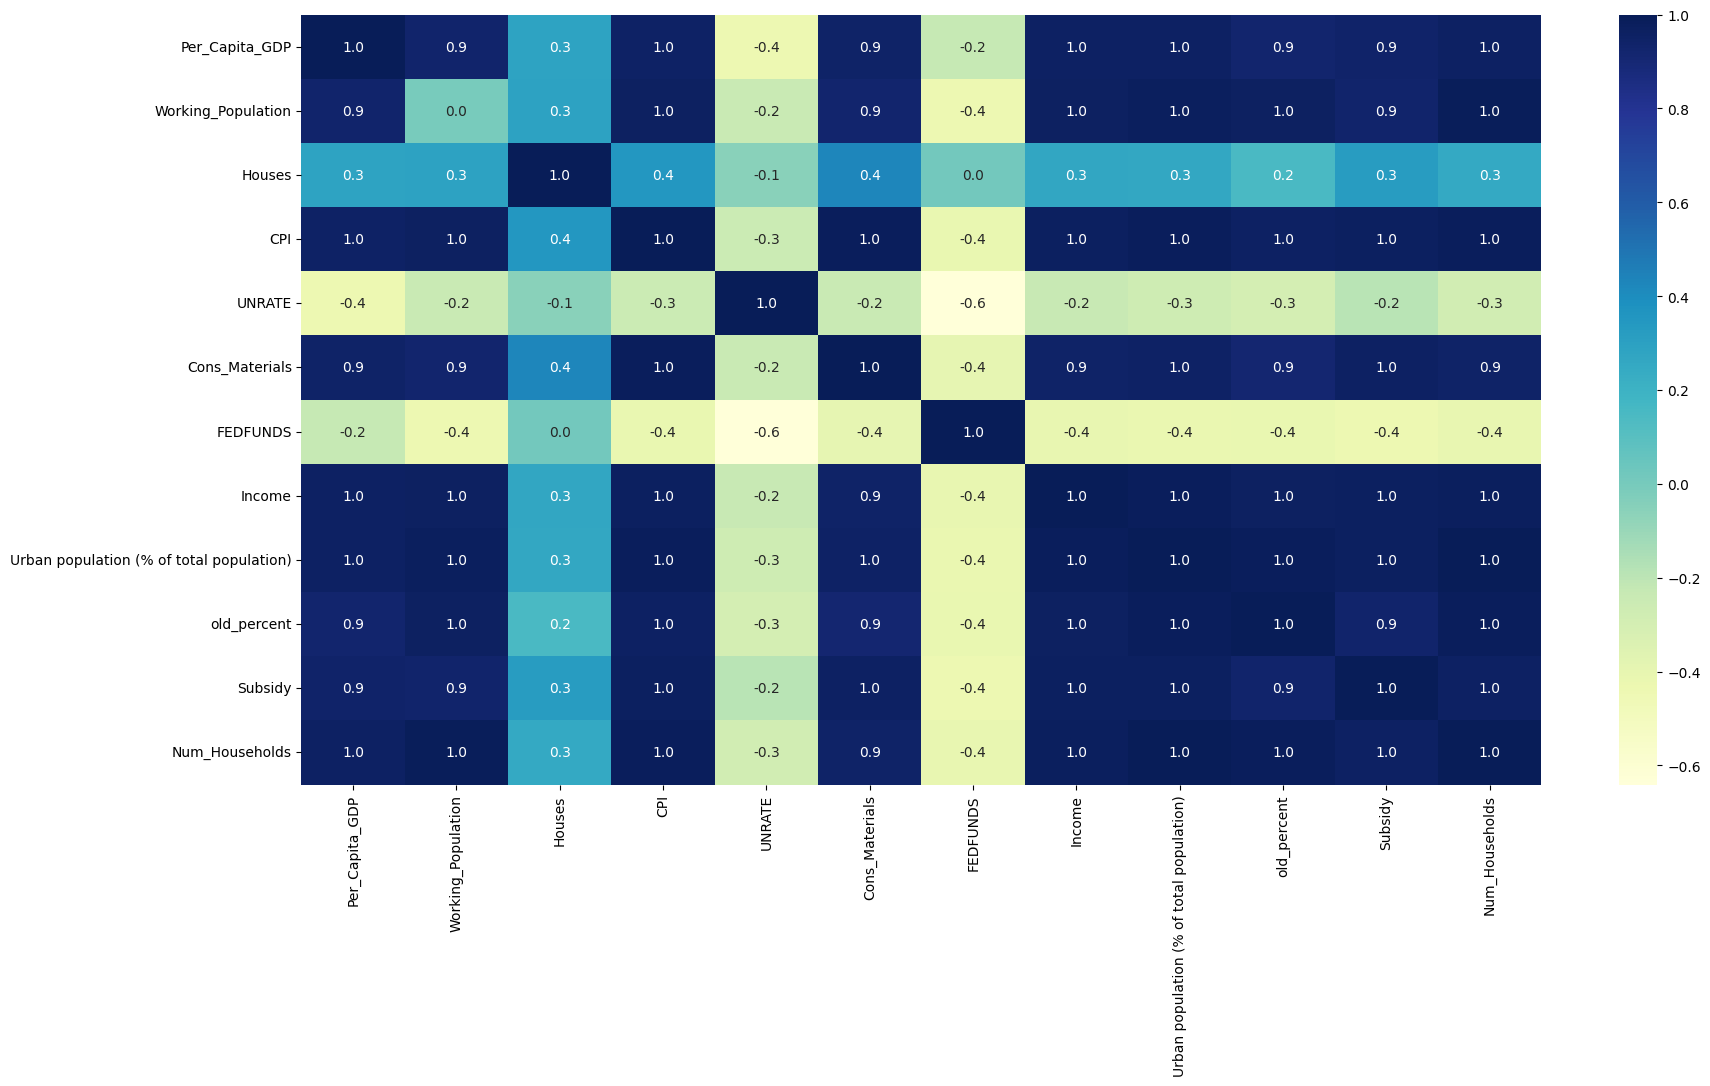

In [142]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(transformed_df.corr(), annot=True, fmt=".1f" ,cmap="YlGnBu", cbar=True)

# (E) Scaling factors

In [143]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [144]:
# Scaling
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [145]:
X_transformed = scalar.fit_transform(X_transformed)

# (F) Dimentionality reduction

In [146]:
from sklearn.decomposition import PCA

print(X_transformed.shape)

(264, 12)


In [147]:
pca = PCA(.95)

In [148]:
X_pca = pca.fit_transform(X_transformed)
print(X_pca.shape)

(264, 3)


In [149]:
pca.explained_variance_ratio_

array([0.7520948 , 0.14028733, 0.08102975])

In [150]:
pca.n_components_

3

pca of non transformed


In [151]:
X_pca_ = pca.fit_transform(X)

In [152]:
pca.explained_variance_ratio_

array([0.72399484, 0.13206396, 0.09081838, 0.0229045 ])

In [153]:
pca.n_components_

4

# (G) Model Building

**Splitting** in train, valid and test

In [154]:
# Splitting data into train and validation sets
#from sklearn.model_selection import train_test_split
#X_train, X_valid, y_train, y_valid = train_test_split(X_transformed, y_transformed, test_size= 0.2, random_state= 42)
#X_train_pca, X_valid_pca, y_train_pca, y_valid_pca = train_test_split(X_pca, y_transformed, test_size= 0.2, random_state= 42)

In [155]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.regressor import ResidualsPlot

In [156]:
# Function to split data into training and validation sets
def split_data(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)


In [157]:
# Function to compute and return scores with GridSearchCV
def scores_with_grid_search(model, param_grid, X_train, y_train, X_valid, y_valid):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_valid)
    r2 = r2_score(y_valid, y_pred)
    cross_val = cross_val_score(best_model, X_train, y_train, cv=5)
    cross_val_mean = np.mean(cross_val)
    return r2, cross_val_mean, grid_search.best_params_, best_model

In [158]:
# Function to evaluate models with and without PCA
def evaluate_models(models_and_params, X_train, y_train, X_valid, y_valid, X_train_pca, X_valid_pca):
    results = []
    best_models = []

    # Evaluate models without PCA
    for model, param_grid in models_and_params:
        r2, cross_val_mean, best_params, best_model = scores_with_grid_search(model, param_grid, X_train, y_train, X_valid, y_valid)
        results.append({
            'Model': model.__class__.__name__,
            'PCA': 'No',
            'R2 Score': r2,
            'Cross Validation Score': cross_val_mean,
            'Best Parameters': best_params
        })
        best_models.append({
            'Model': model.__class__.__name__,
            'PCA': 'No',
            'Best Model': best_model
        })

    # Evaluate models with PCA
    for model, param_grid in models_and_params:
        r2, cross_val_mean, best_params, best_model = scores_with_grid_search(model, param_grid, X_train_pca, y_train, X_valid_pca, y_valid)
        results.append({
            'Model': model.__class__.__name__,
            'PCA': 'Yes',
            'R2 Score': r2,
            'Cross Validation Score': cross_val_mean,
            'Best Parameters': best_params
        })
        best_models.append({
            'Model': model.__class__.__name__,
            'PCA': 'Yes',
            'Best Model': best_model
        })

    return results, best_models

In [159]:
# Function to plot feature importances if available
def plot_feature_importances(model, feature_names, title_suffix=''):
    if hasattr(model, 'coef_'):
        importances = model.coef_
        title = 'Feature Importances (Coefficients)'
    elif hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        title = 'Feature Importances'
    else:
        print("Model does not have feature importances.")
        return

    if len(importances.shape) > 1:
        importances = importances.ravel()  # Handle multi-dimensional arrays

    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title(f'{title} {title_suffix}')
    plt.show()

In [160]:
# Function to plot residuals using Yellowbrick
def plot_residuals(model, X_train, y_train, X_valid, y_valid, title_suffix=''):
    try:
        visualizer = ResidualsPlot(model)
        visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
        visualizer.score(X_valid, y_valid)  # Evaluate the model on the test data
        visualizer.show()  # Finalize and render the figure
    except Exception as e:
        print(f"Could not plot residuals: {e}")

In [161]:
# Function to plot predicted vs actual values
def plot_predicted_vs_actual(model, X_valid, y_valid, title_suffix=''):
    try:
        y_pred = model.predict(X_valid)

        plt.figure(figsize=(10, 6))
        plt.scatter(y_valid, y_pred, alpha=0.3)
        plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)], 'r--')
        plt.title(f'Predicted vs Actual {title_suffix}')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.show()
    except Exception as e:
        print(f"Could not plot predicted vs actual: {e}")

 **Training Model with transformation**

Best Model: LinearRegression (PCA: No)
LinearRegression()
Feature Importances:


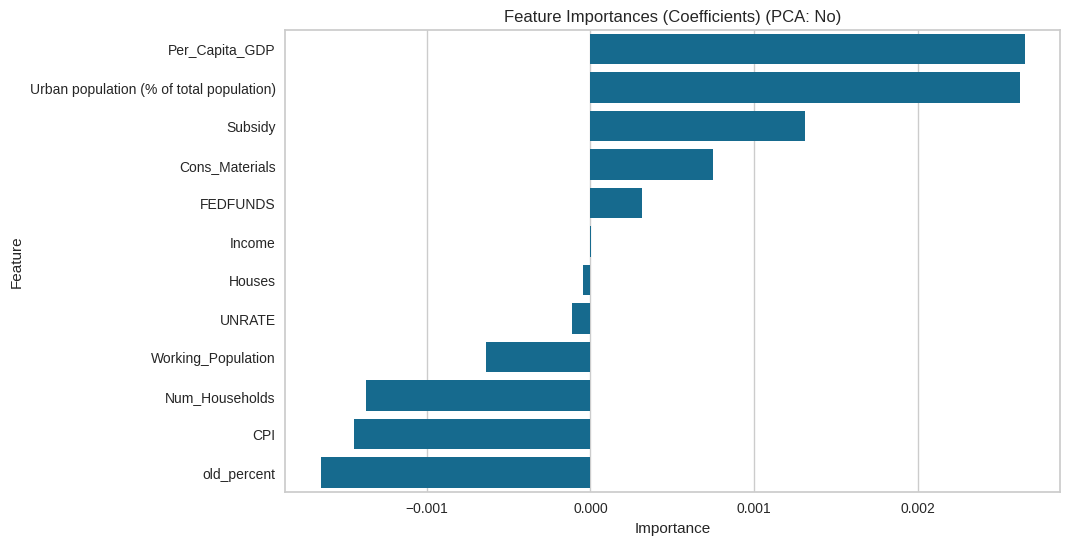

Residual Plot:


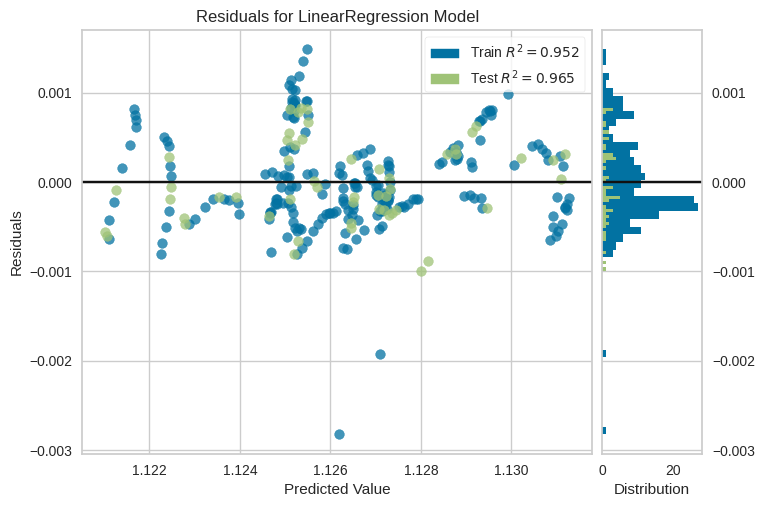

Predicted vs Actual Plot:


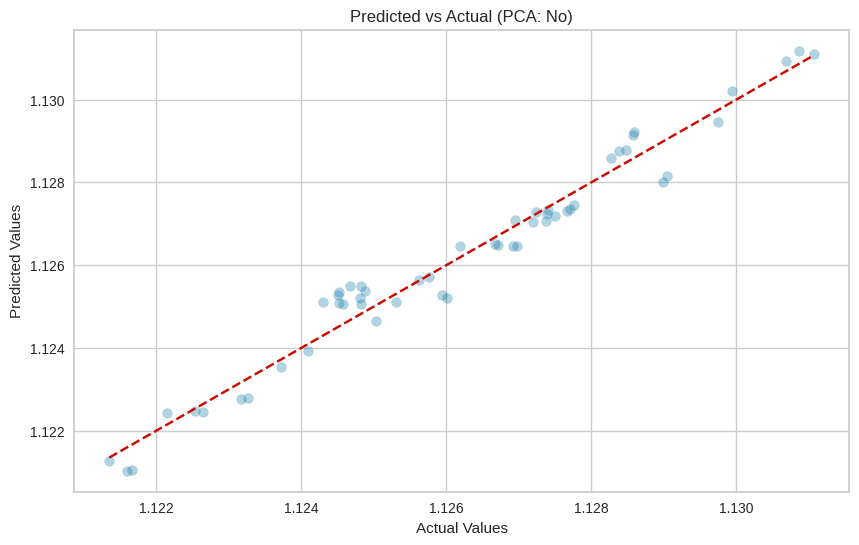

Best Model: Ridge (PCA: No)
Ridge(alpha=0.5)
Feature Importances:


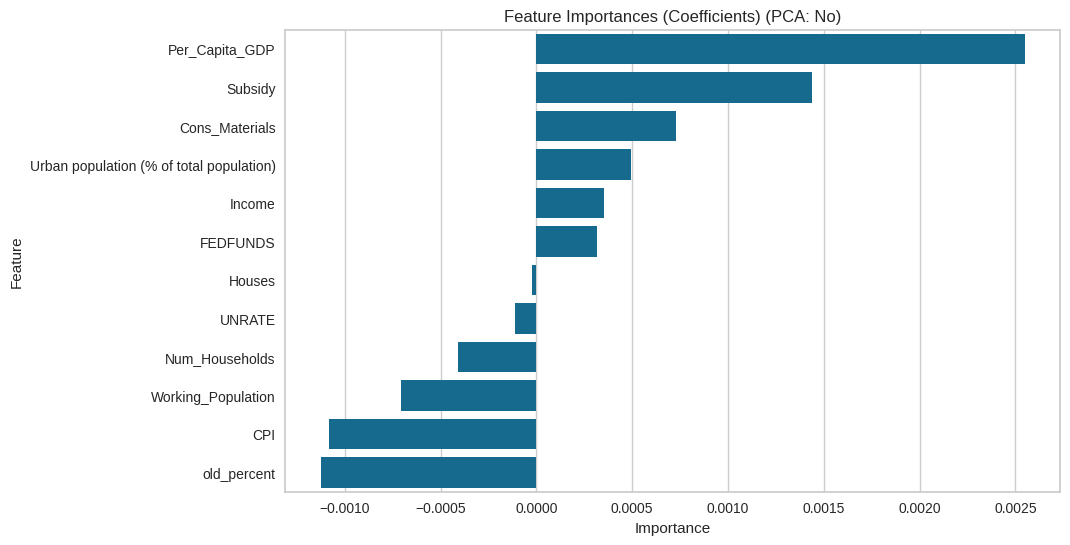

Residual Plot:


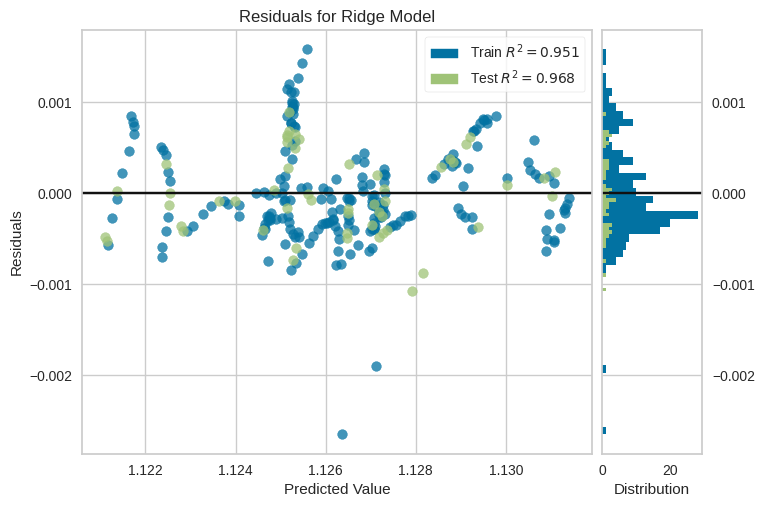

Predicted vs Actual Plot:


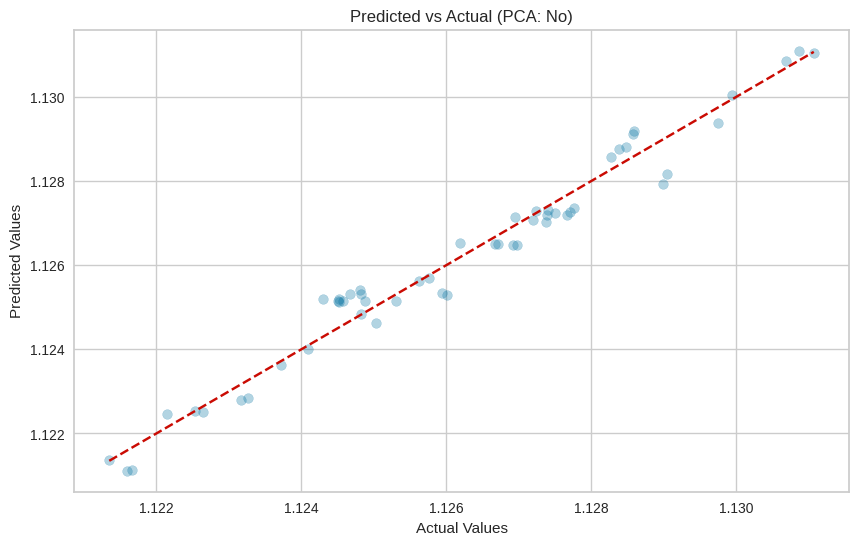

Best Model: Lasso (PCA: No)
Lasso(alpha=0.1)
Feature Importances:


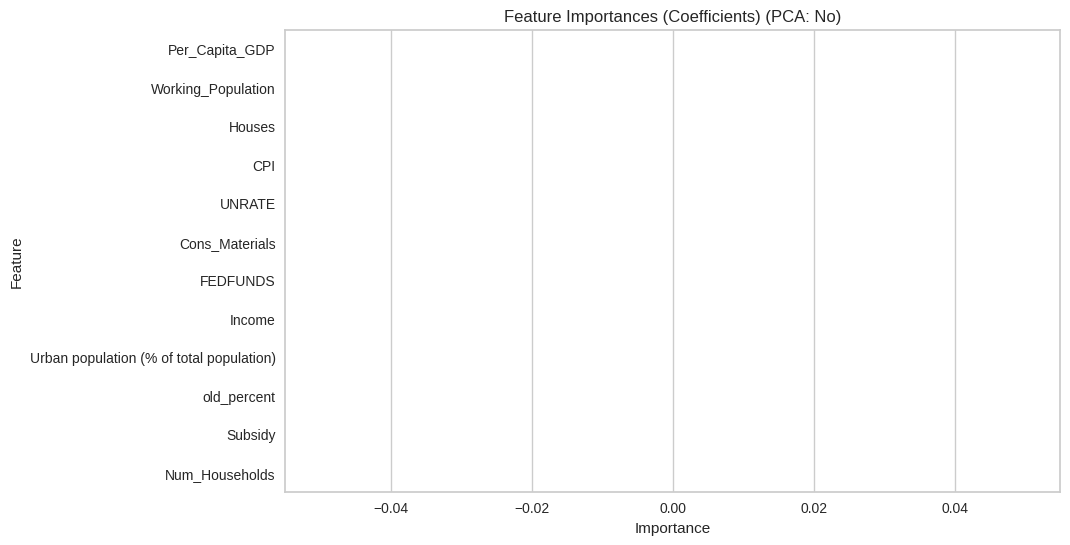

Residual Plot:


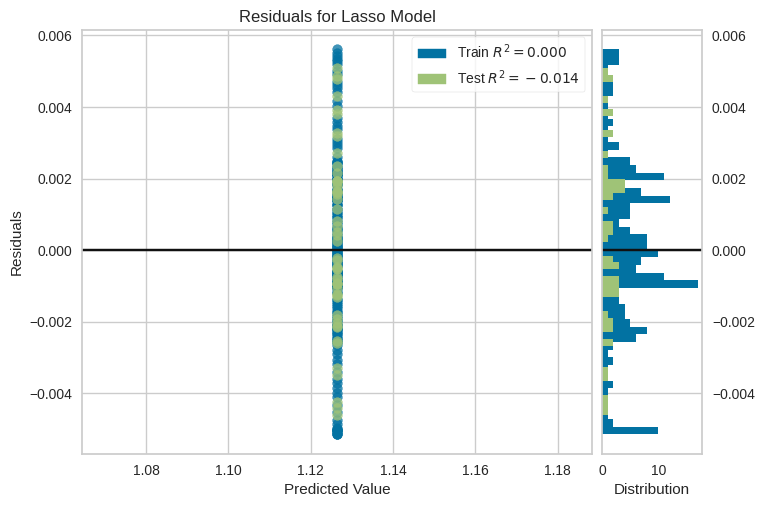

Predicted vs Actual Plot:


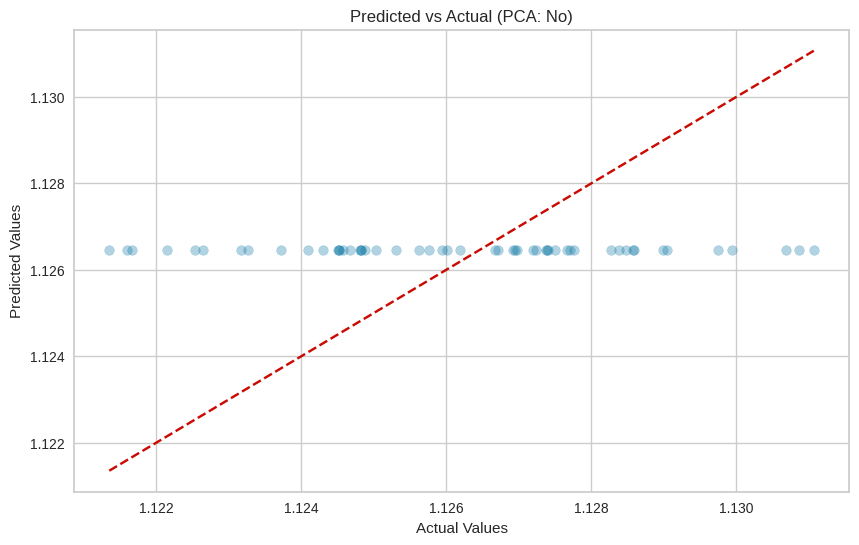

Best Model: ElasticNet (PCA: No)
ElasticNet(alpha=0.1, l1_ratio=0.1)
Feature Importances:


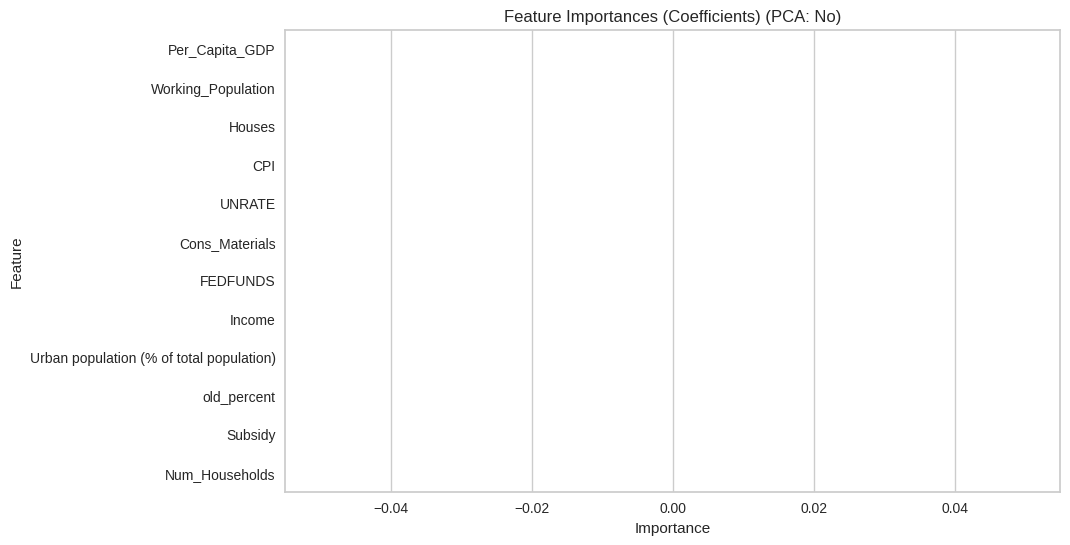

Residual Plot:


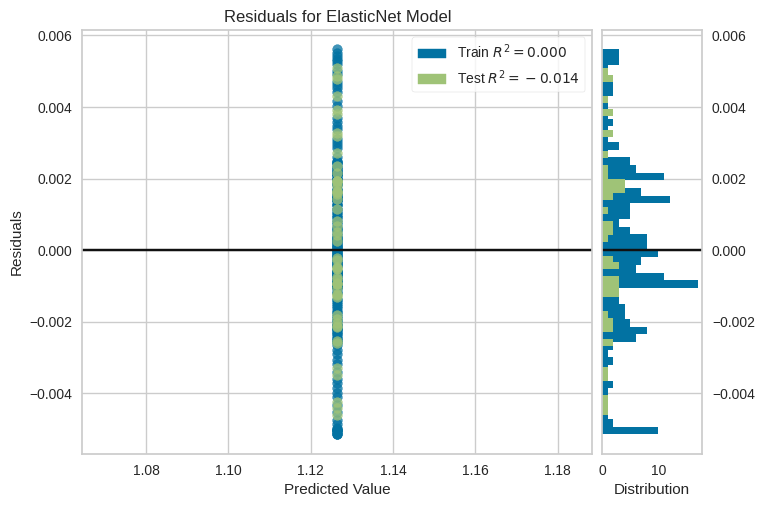

Predicted vs Actual Plot:


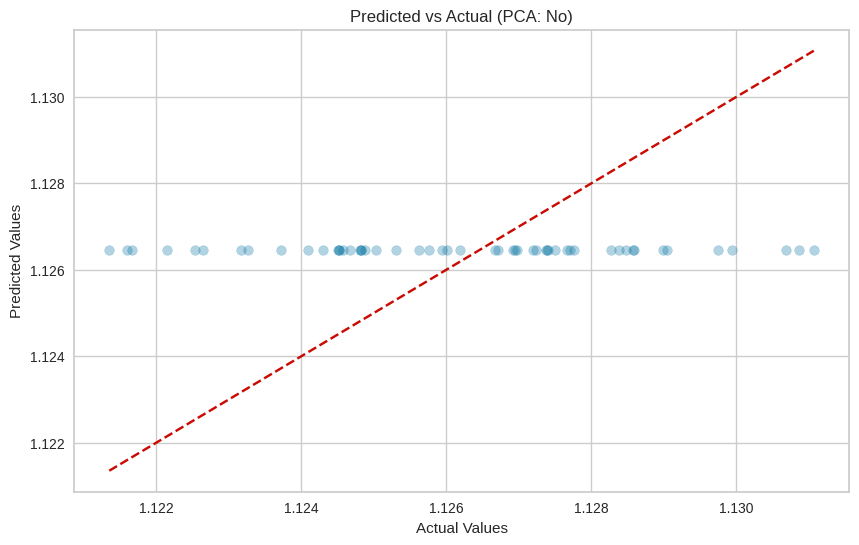

Best Model: SVR (PCA: No)
SVR(C=0.1, kernel='linear')
Feature Importances:


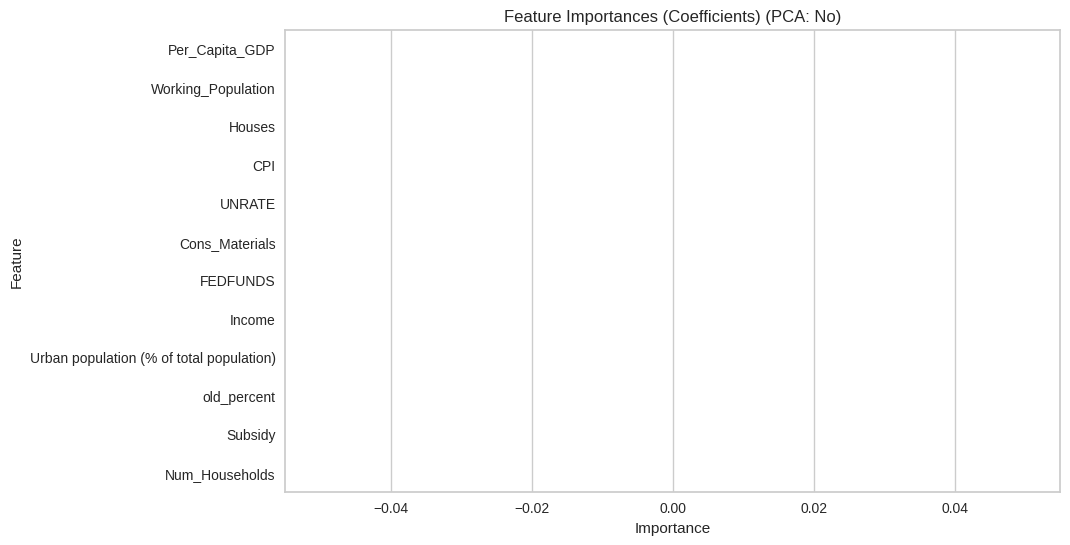

Residual Plot:


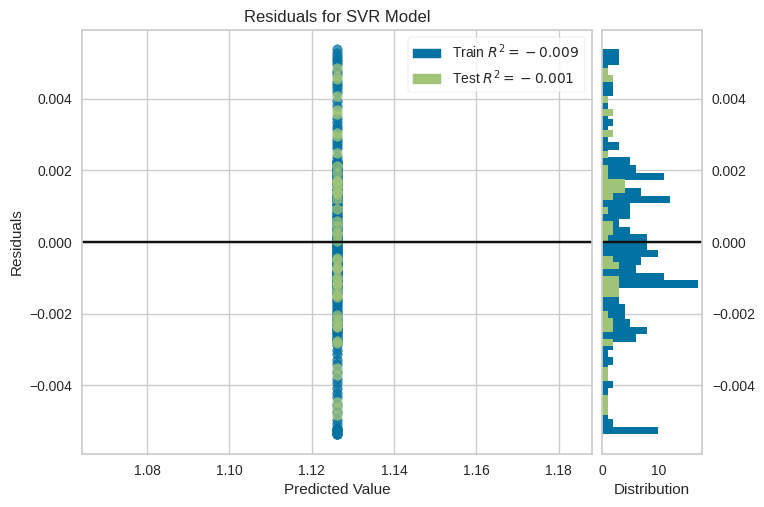

Predicted vs Actual Plot:


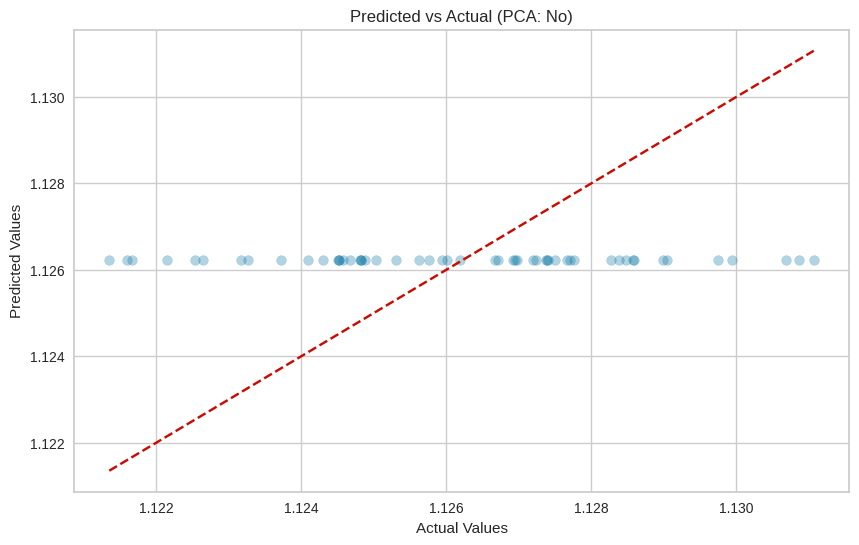

Best Model: RandomForestRegressor (PCA: No)
RandomForestRegressor(max_depth=30, n_estimators=200)
Feature Importances:


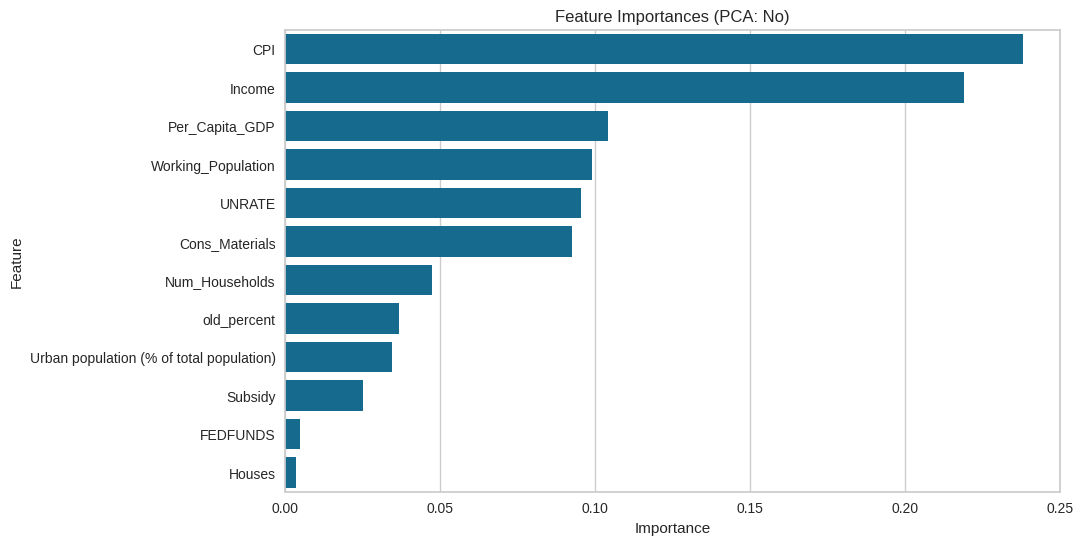

Residual Plot:


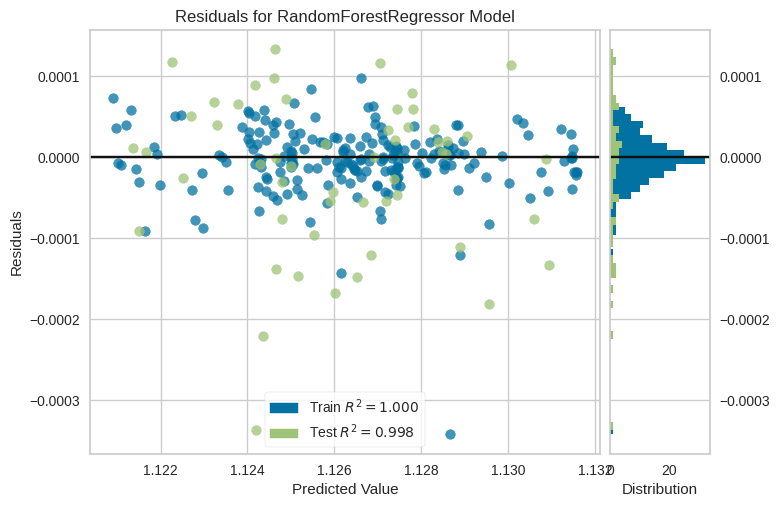

Predicted vs Actual Plot:


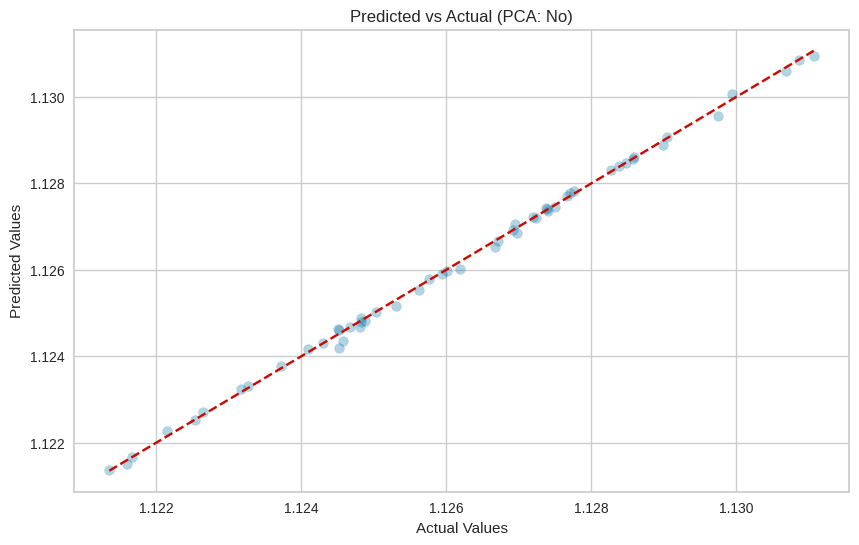

Best Model: XGBRegressor (PCA: No)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Feature Importances:


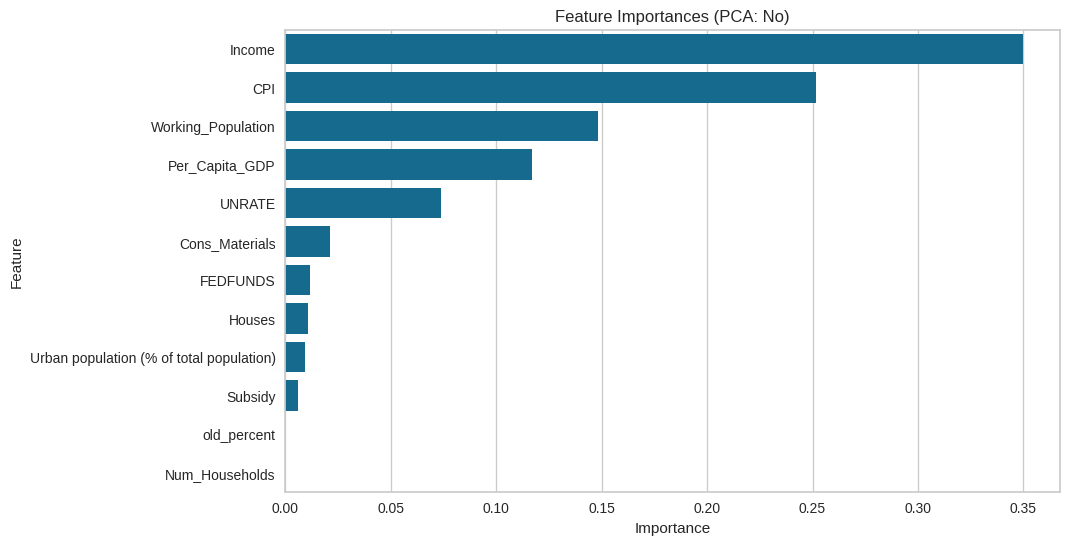

Residual Plot:


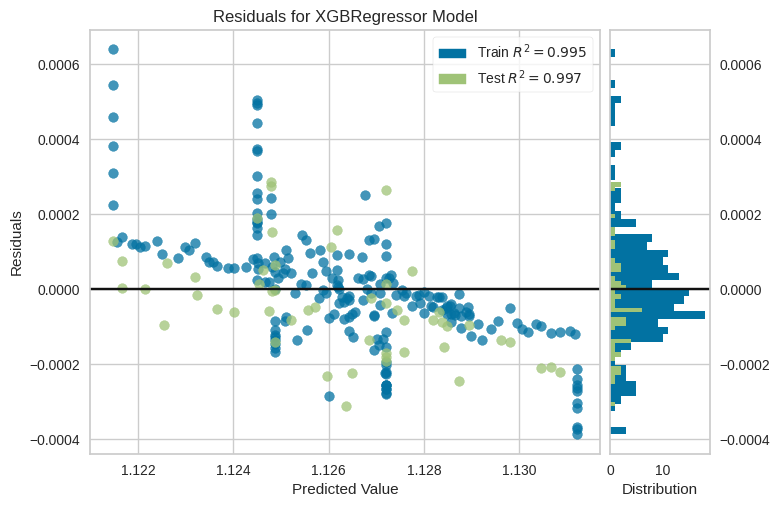

Predicted vs Actual Plot:


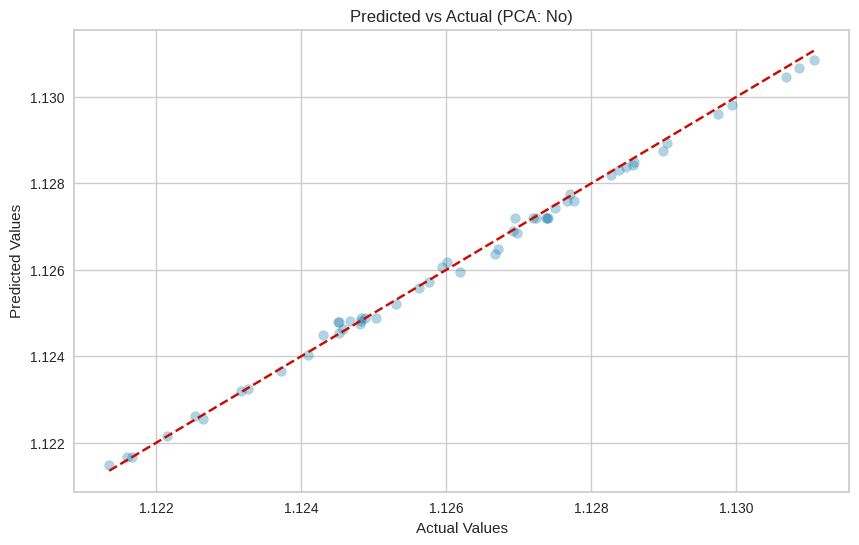

Best Model: LinearRegression (PCA: Yes)
LinearRegression()
Feature Importances:


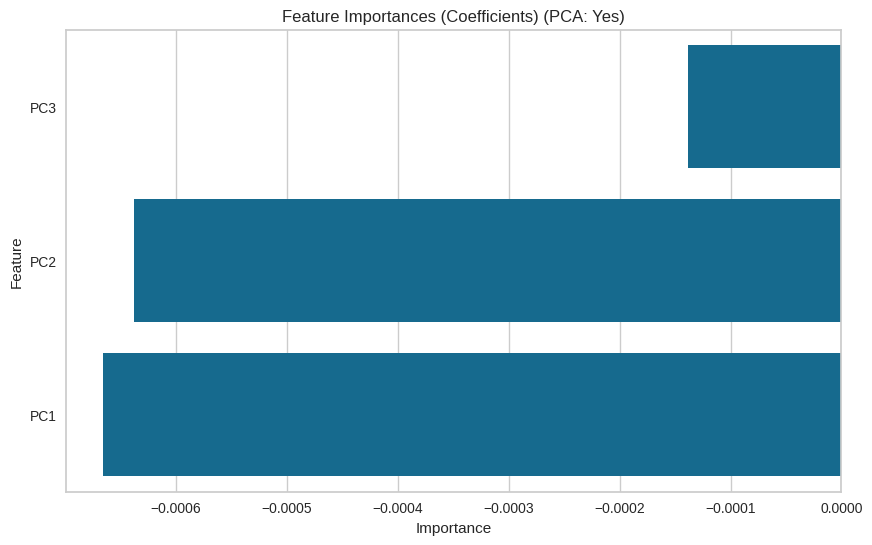

Residual Plot:


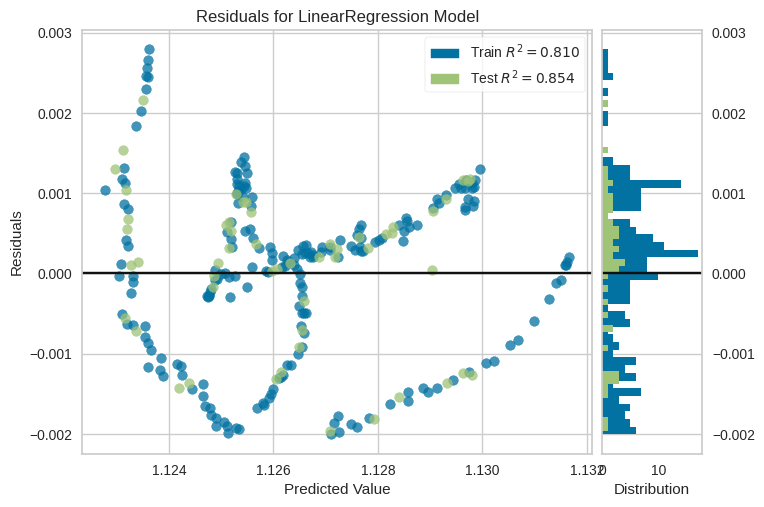

Predicted vs Actual Plot:


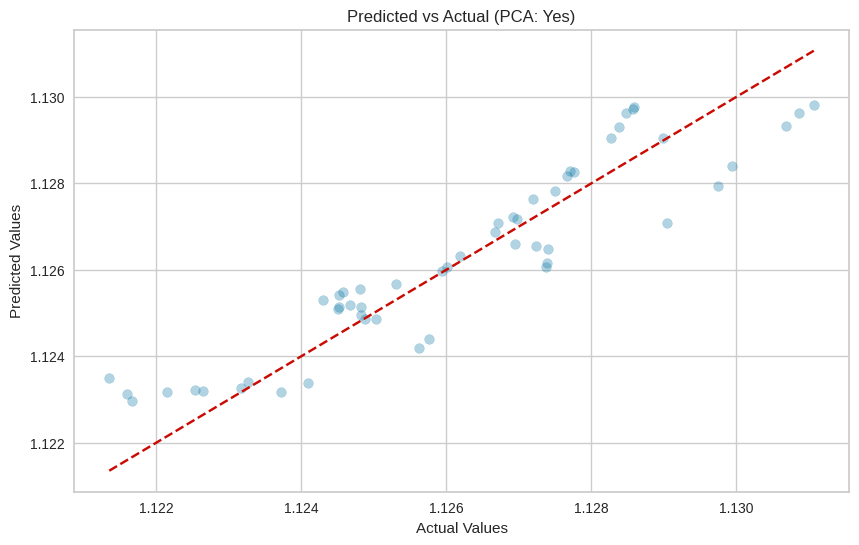

Best Model: Ridge (PCA: Yes)
Ridge(alpha=5.0)
Feature Importances:


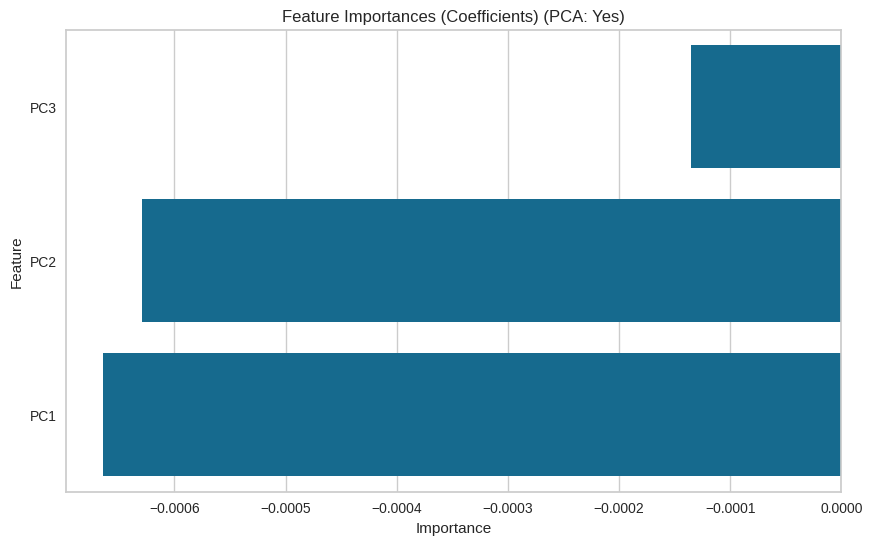

Residual Plot:


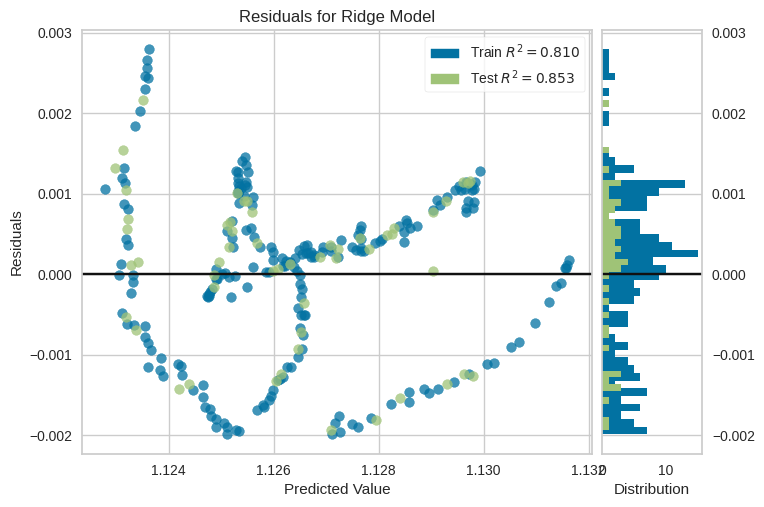

Predicted vs Actual Plot:


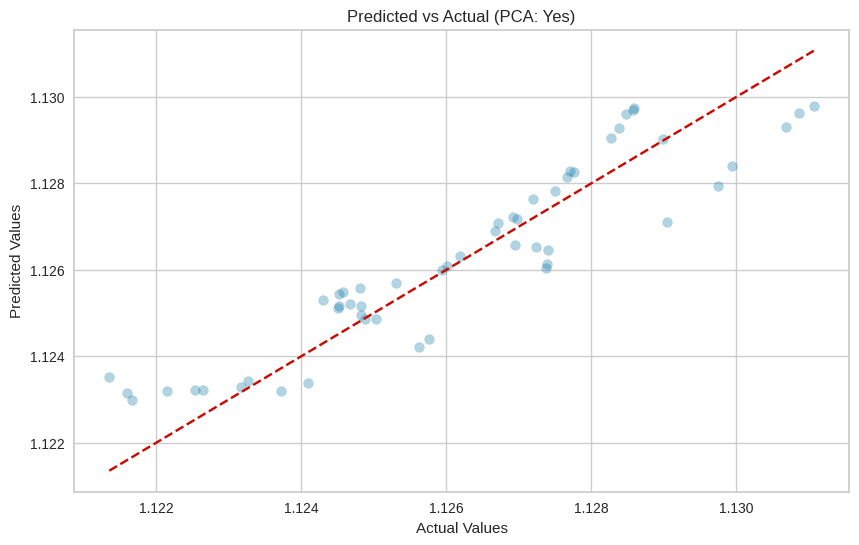

Best Model: Lasso (PCA: Yes)
Lasso(alpha=0.1)
Feature Importances:


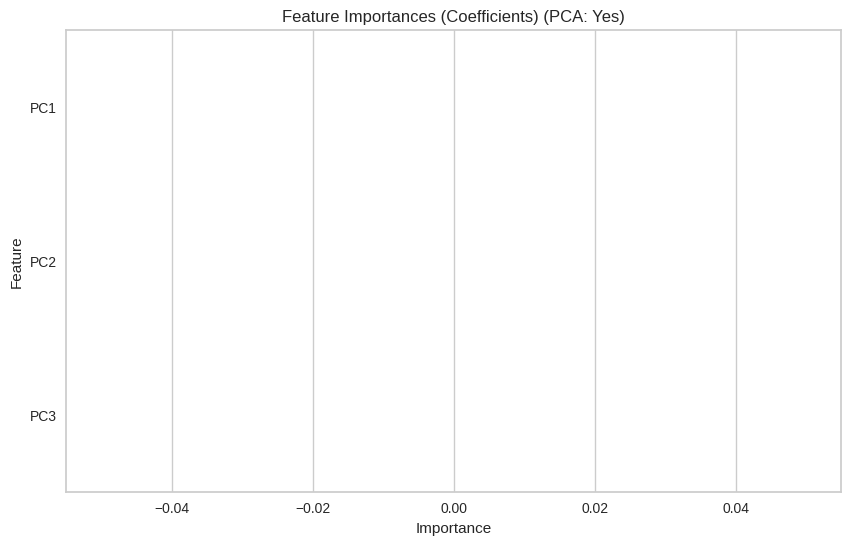

Residual Plot:


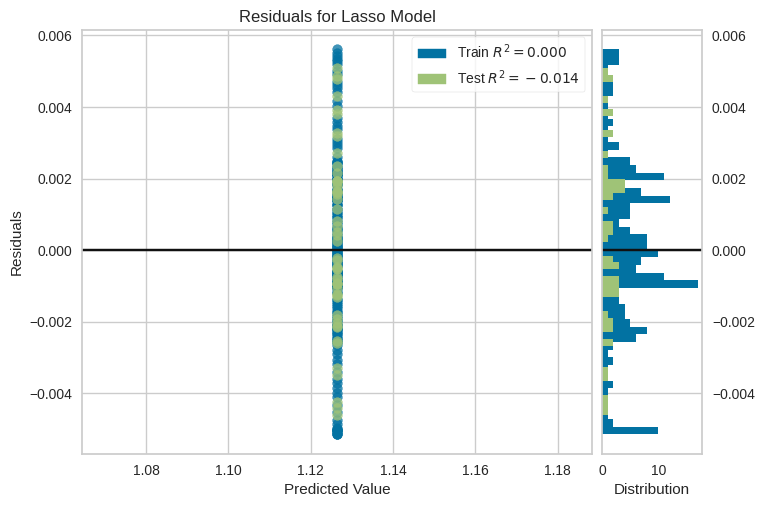

Predicted vs Actual Plot:


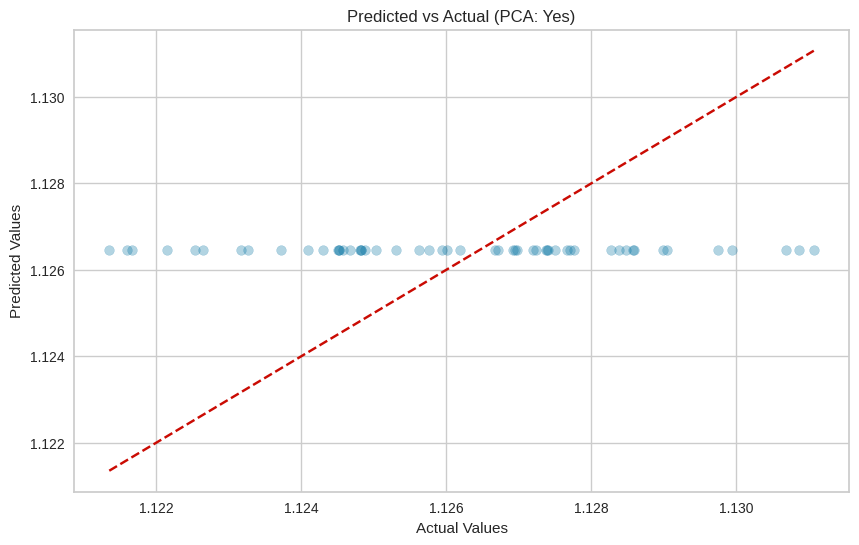

Best Model: ElasticNet (PCA: Yes)
ElasticNet(alpha=0.1, l1_ratio=0.1)
Feature Importances:


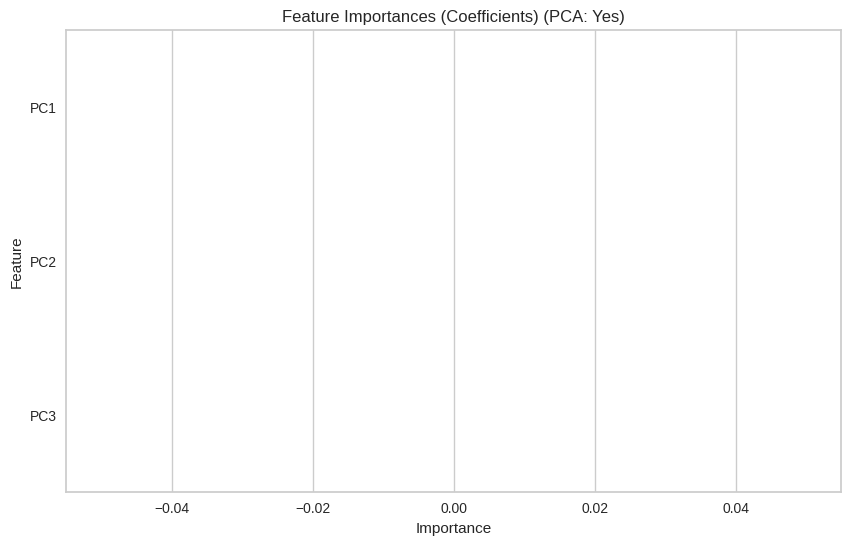

Residual Plot:


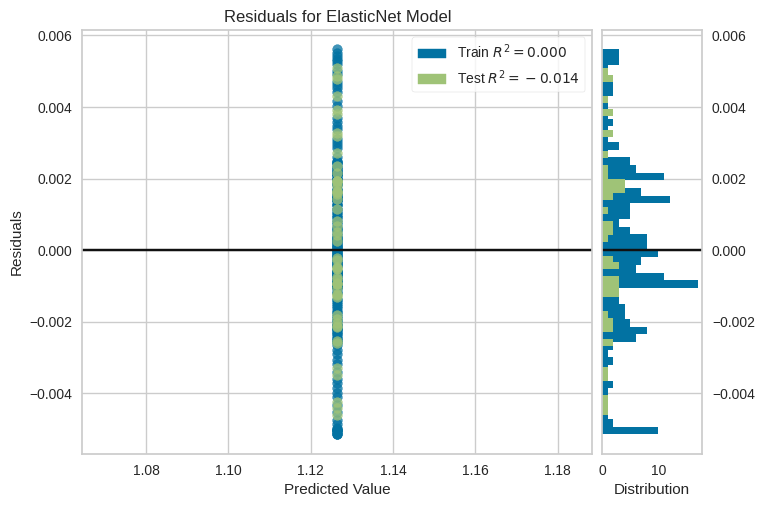

Predicted vs Actual Plot:


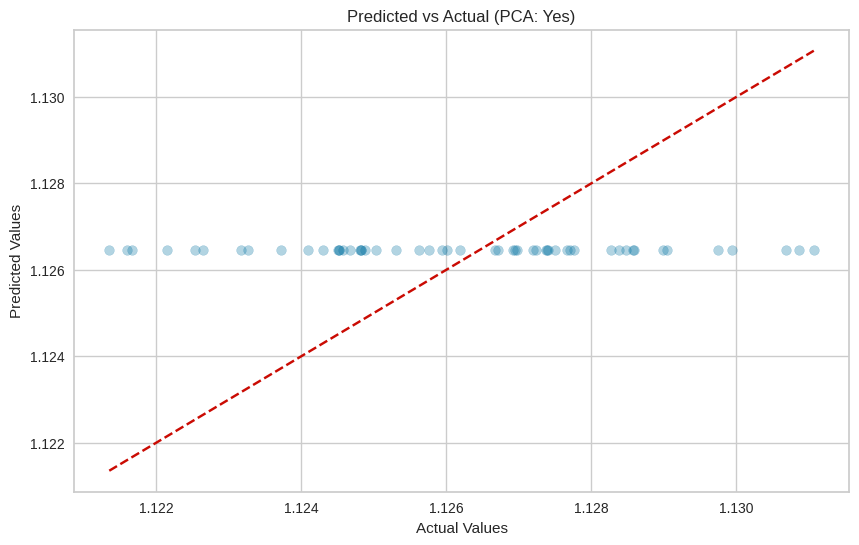

Best Model: SVR (PCA: Yes)
SVR(C=0.1, kernel='linear')
Feature Importances:


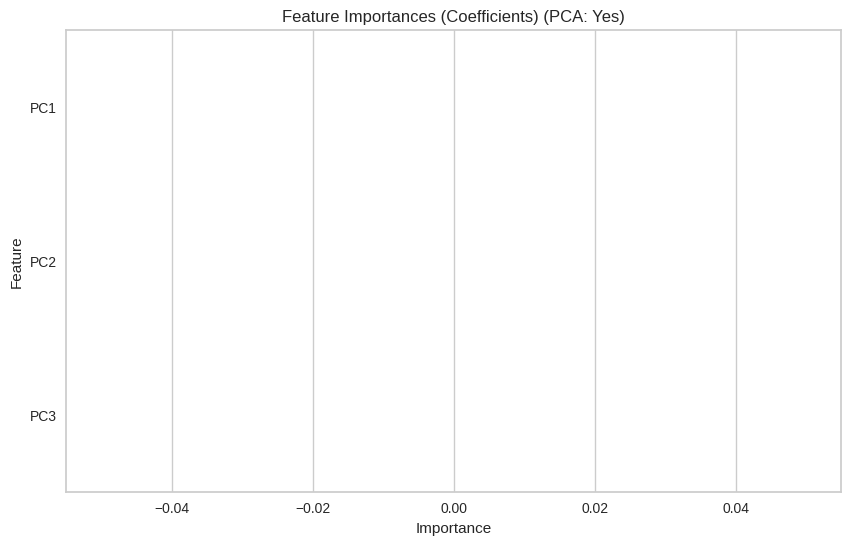

Residual Plot:


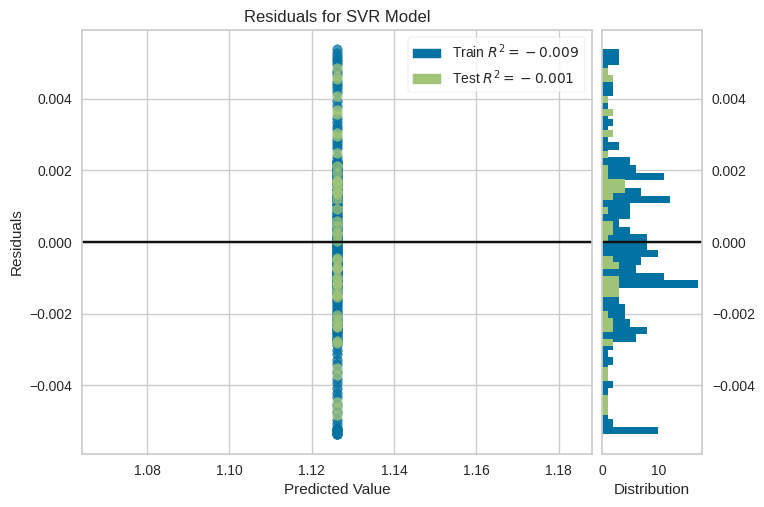

Predicted vs Actual Plot:


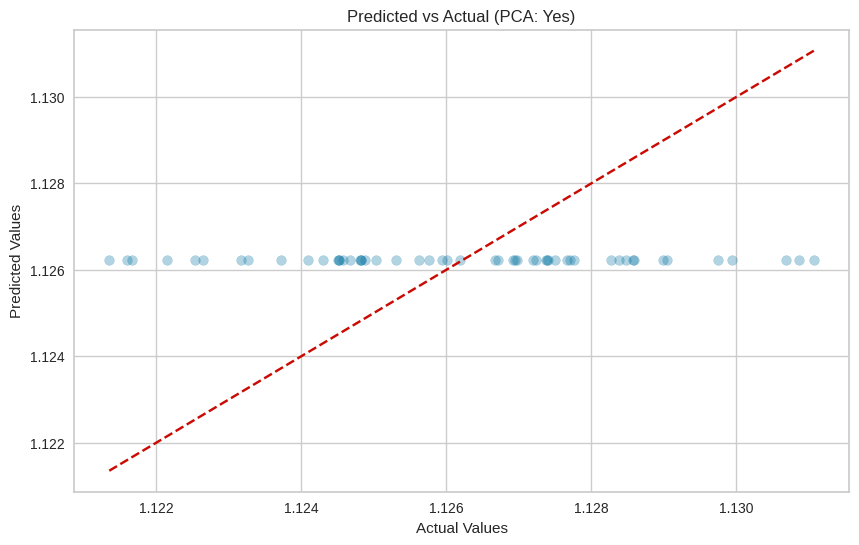

Best Model: RandomForestRegressor (PCA: Yes)
RandomForestRegressor(max_depth=20, n_estimators=50)
Feature Importances:


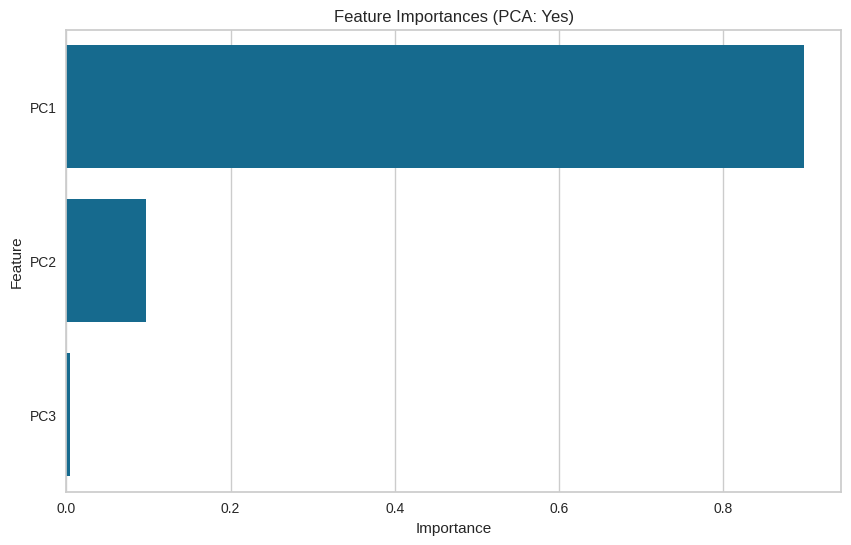

Residual Plot:


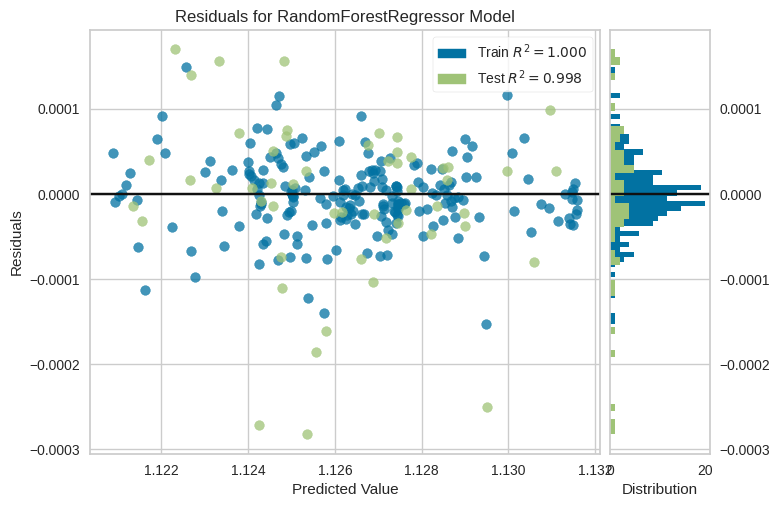

Predicted vs Actual Plot:


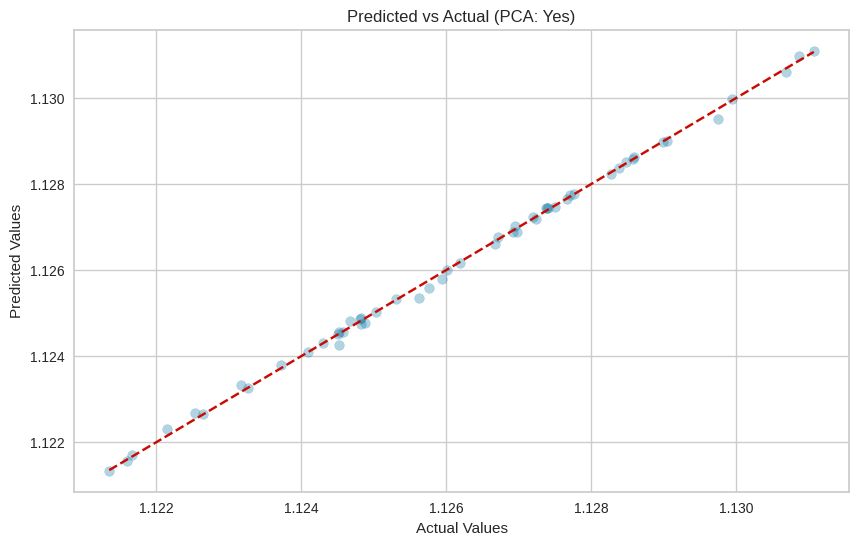

Best Model: XGBRegressor (PCA: Yes)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Feature Importances:


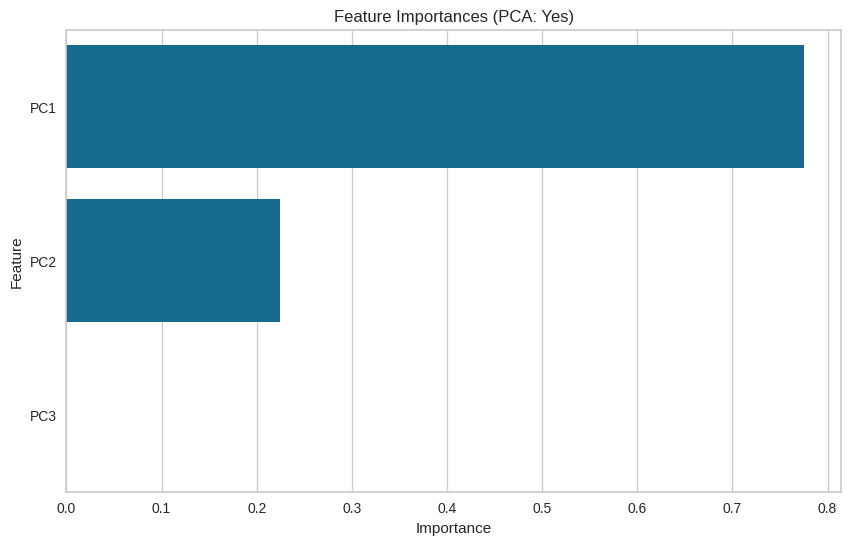

Residual Plot:


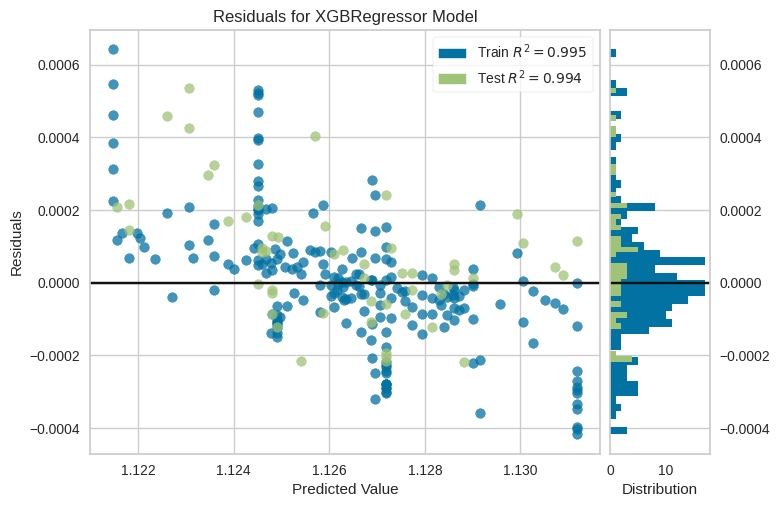

Predicted vs Actual Plot:


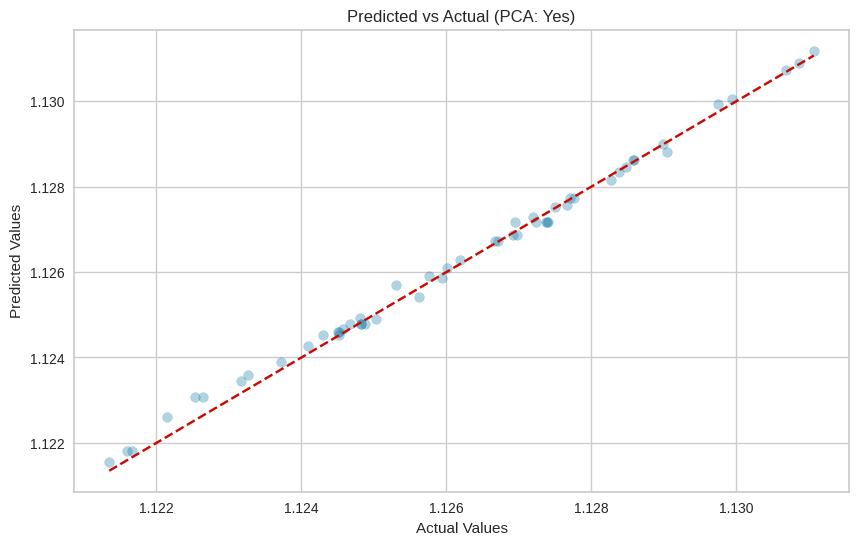

In [162]:
# Assuming X and y are the original features and target
X_train, X_valid, y_train, y_valid = split_data(X, y)
X_train_transformed, X_valid_transformed, y_train_transformed, y_valid_transformed = split_data(X_transformed, y_transformed)
X_train_pca, X_valid_pca, y_train_pca, y_valid_pca = split_data(X_pca, y_transformed)

# Models and parameter grids to evaluate
models_and_params = [
    (LinearRegression(), {}),
    (Ridge(), {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}),
    (Lasso(), {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}),
    (ElasticNet(), {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.7, 0.9]}),
    (SVR(), {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}),
    (RandomForestRegressor(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}),
    (XGBRegressor(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}),
]

# Evaluate models on Box-Cox transformed data
results, best_models = evaluate_models(models_and_params, X_train_transformed, y_train_transformed, X_valid_transformed, y_valid_transformed, X_train_pca, X_valid_pca)

# Create DataFrame from results
results_df_transformed = pd.DataFrame(results)

# Extract and display the best models
for model_info in best_models:
    print(f"Best Model: {model_info['Model']} (PCA: {model_info['PCA']})")
    best_model = model_info['Best Model']
    print(best_model)

    # Plot feature importances if possible
    print("Feature Importances:")
    if model_info['PCA'] == 'No':
        feature_names = df.columns.tolist()
    else:
        feature_names = [f'PC{i+1}' for i in range(X_train_pca.shape[1])]
    plot_feature_importances(best_model, feature_names, title_suffix=f"(PCA: {model_info['PCA']})")

    # Plot residuals if possible
    print("Residual Plot:")
    if model_info['PCA'] == 'No':
        plot_residuals(best_model, X_train_transformed, y_train_transformed, X_valid_transformed, y_valid_transformed, title_suffix=f"(PCA: {model_info['PCA']})")
    else:
        plot_residuals(best_model, X_train_pca, y_train_pca, X_valid_pca, y_valid_pca, title_suffix=f"(PCA: {model_info['PCA']})")

    # Plot predicted vs actual values
    print("Predicted vs Actual Plot:")
    if model_info['PCA'] == 'No':
        plot_predicted_vs_actual(best_model, X_valid_transformed, y_valid_transformed, title_suffix=f"(PCA: {model_info['PCA']})")
    else:
        plot_predicted_vs_actual(best_model, X_valid_pca, y_valid_pca, title_suffix=f"(PCA: {model_info['PCA']})")


Training model without transformation

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.682e+01, tolerance: 3.355e+01
  model = cd_fast.enet_coordinate_descent(


Best Model: LinearRegression (PCA: No)
LinearRegression()
Feature Importances:


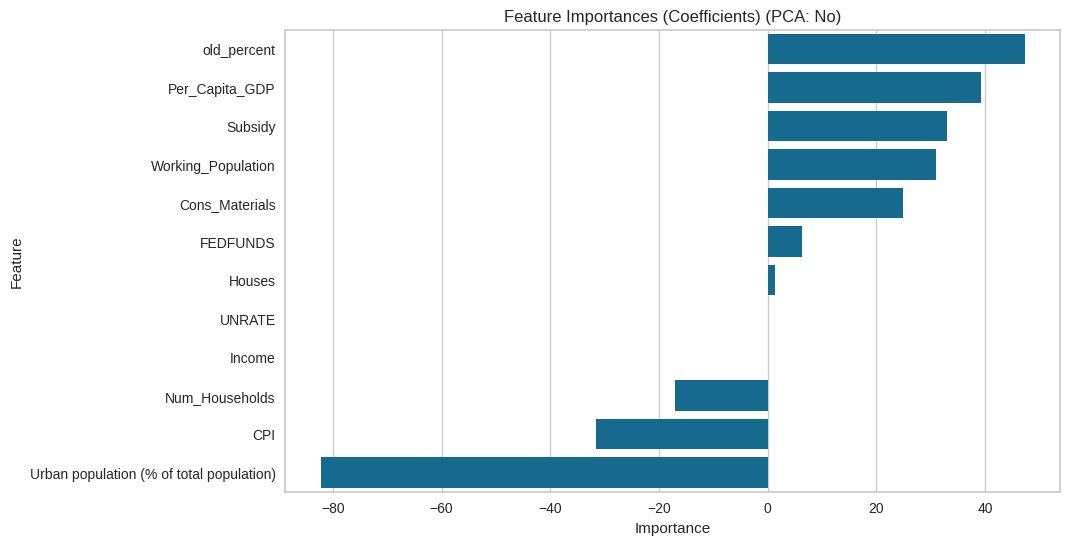

Residual Plot:


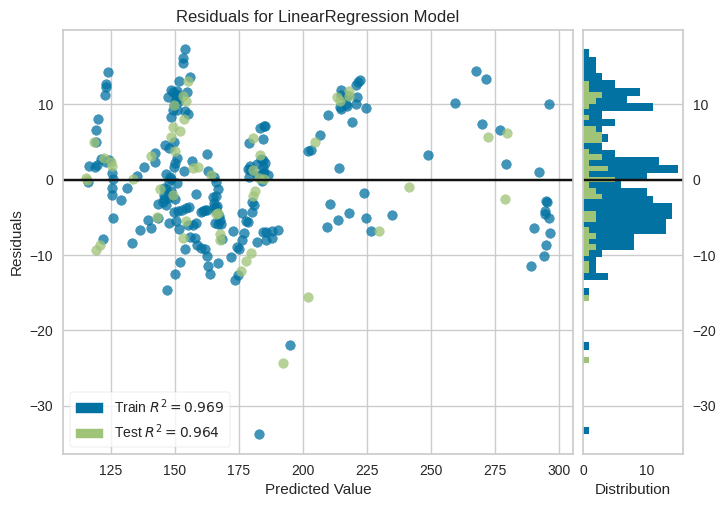

Predicted vs Actual Plot:


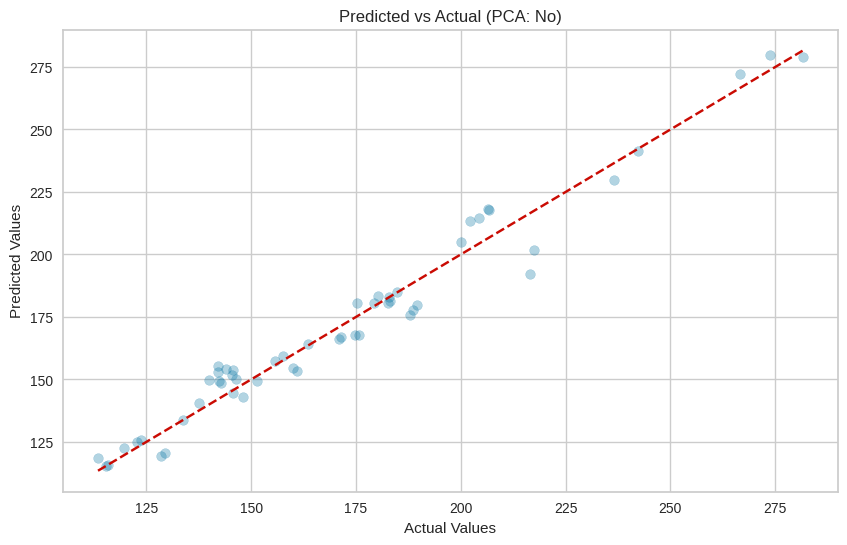

Best Model: Ridge (PCA: No)
Ridge(alpha=0.1)
Feature Importances:


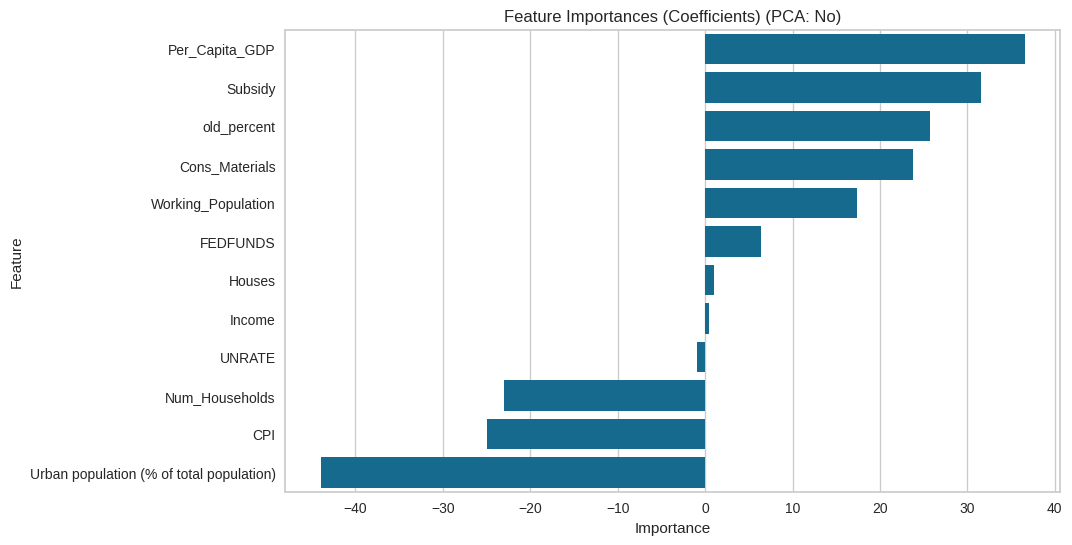

Residual Plot:


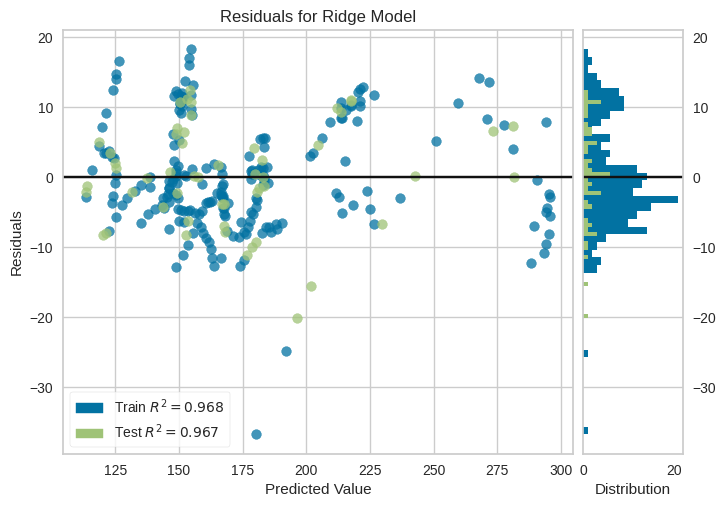

Predicted vs Actual Plot:


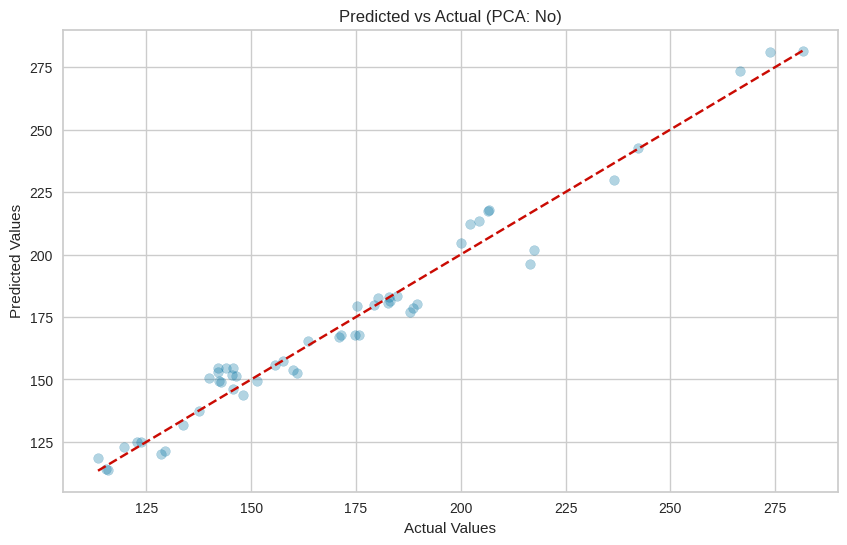

Best Model: Lasso (PCA: No)
Lasso(alpha=0.1)
Feature Importances:


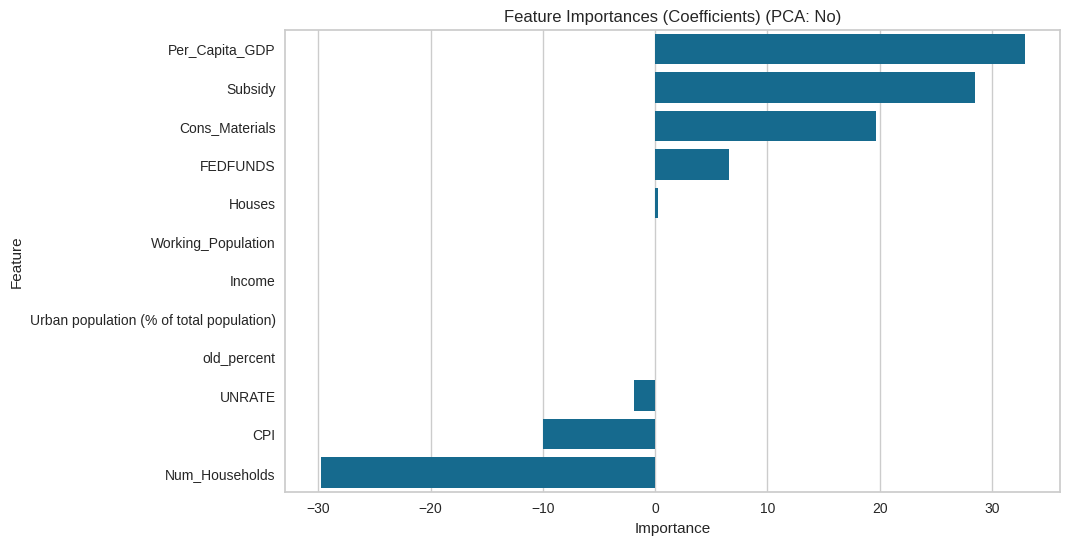

Residual Plot:


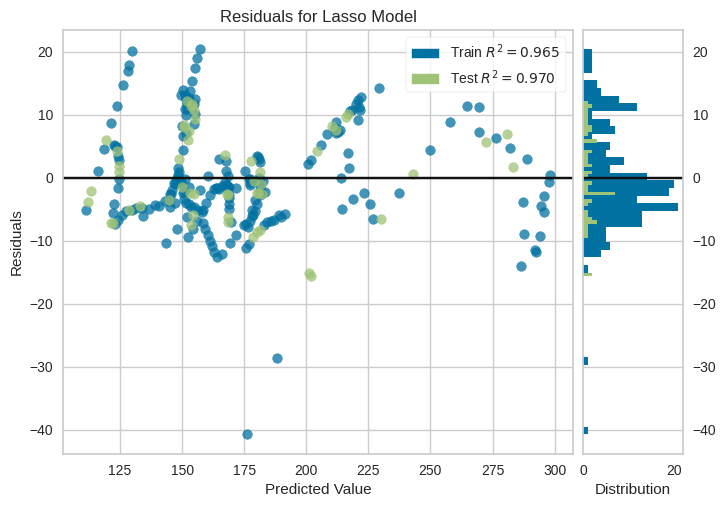

Predicted vs Actual Plot:


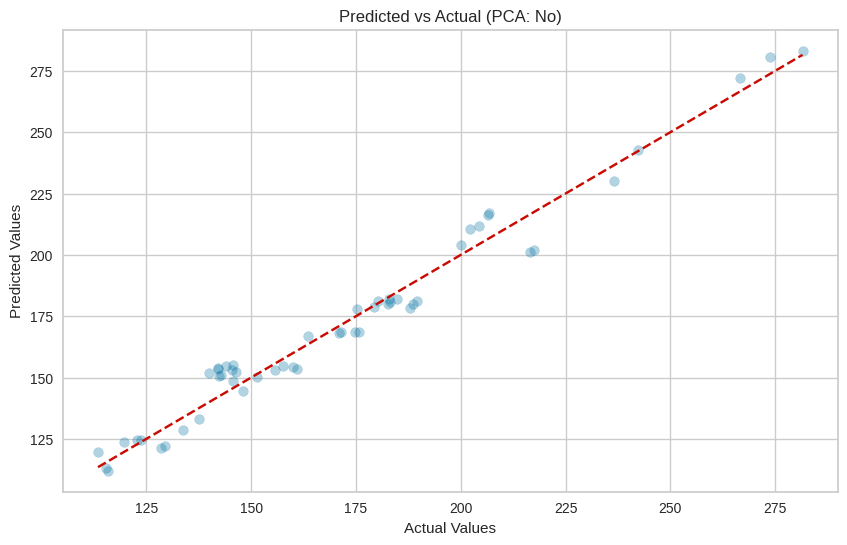

Best Model: ElasticNet (PCA: No)
ElasticNet(alpha=0.1, l1_ratio=0.9)
Feature Importances:


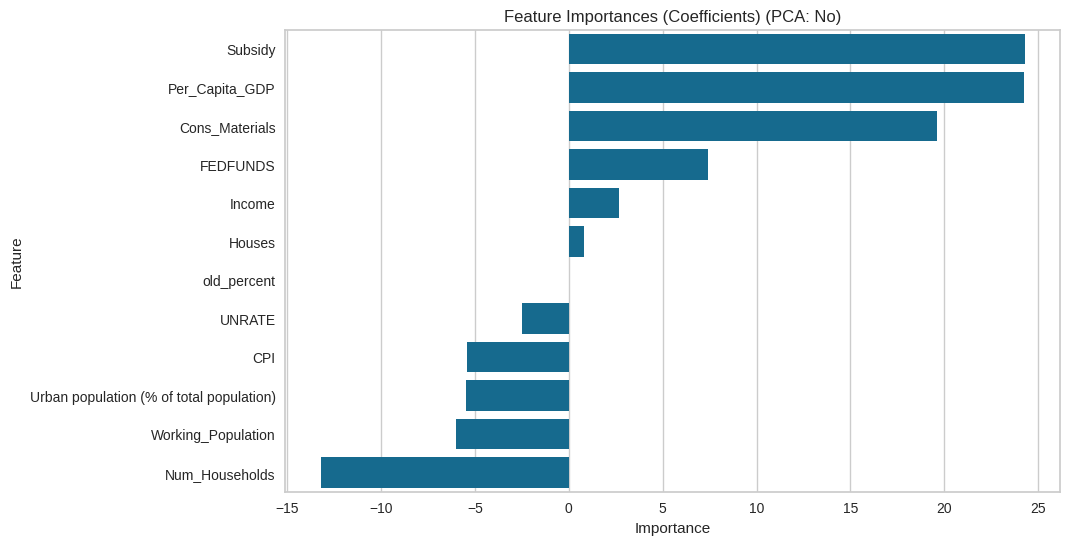

Residual Plot:


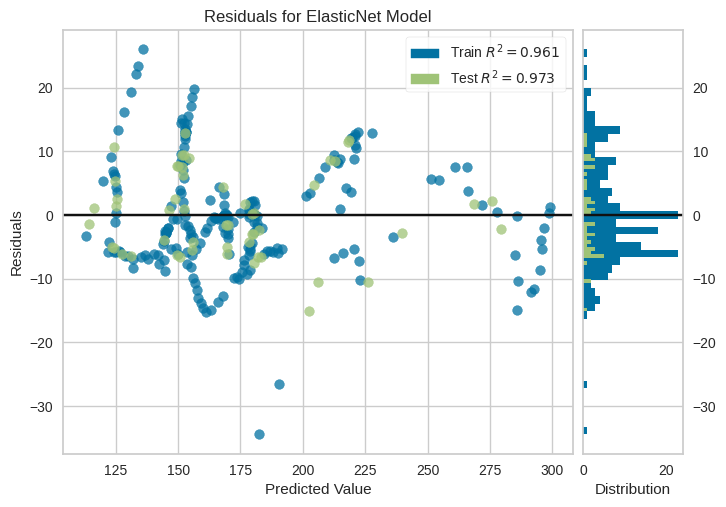

Predicted vs Actual Plot:


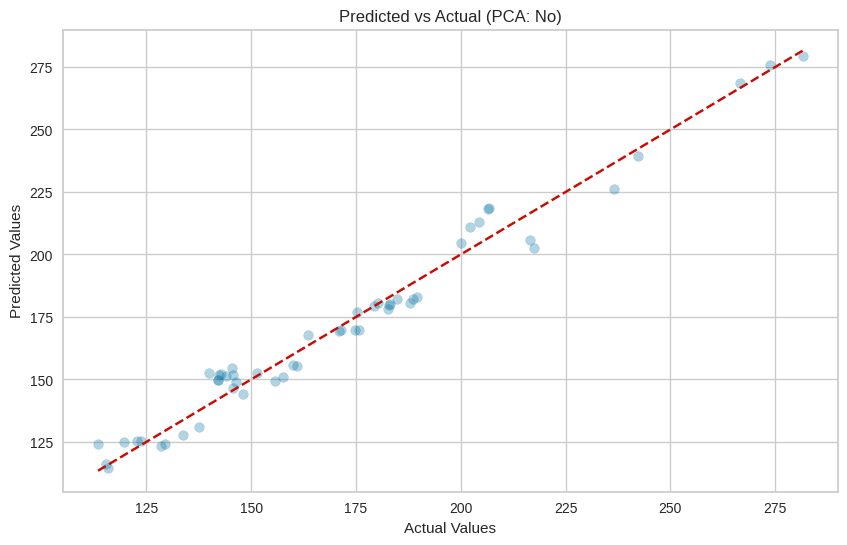

Best Model: SVR (PCA: No)
SVR(C=10, gamma='auto')
Feature Importances:
Model does not have feature importances.
Residual Plot:


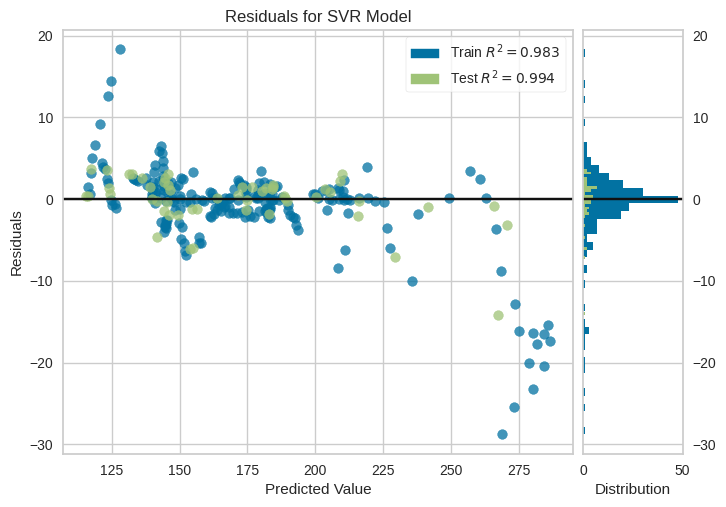

Predicted vs Actual Plot:


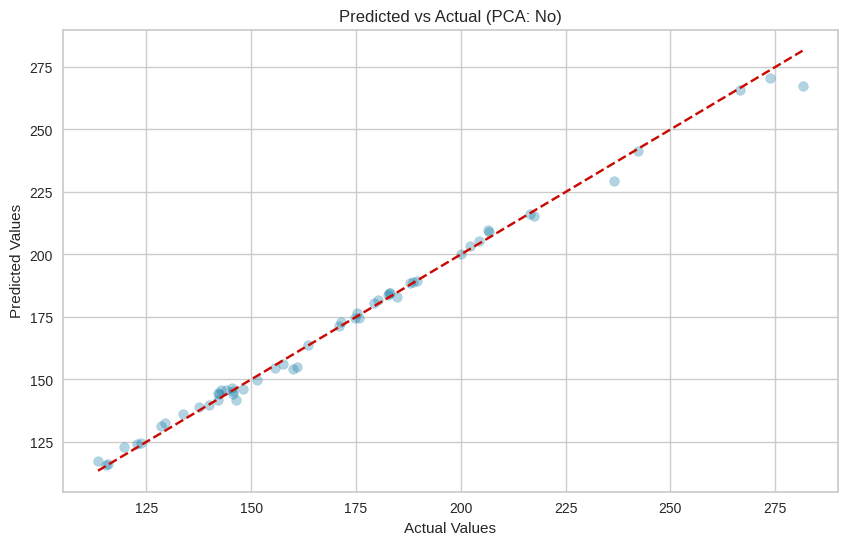

Best Model: RandomForestRegressor (PCA: No)
RandomForestRegressor(n_estimators=200)
Feature Importances:


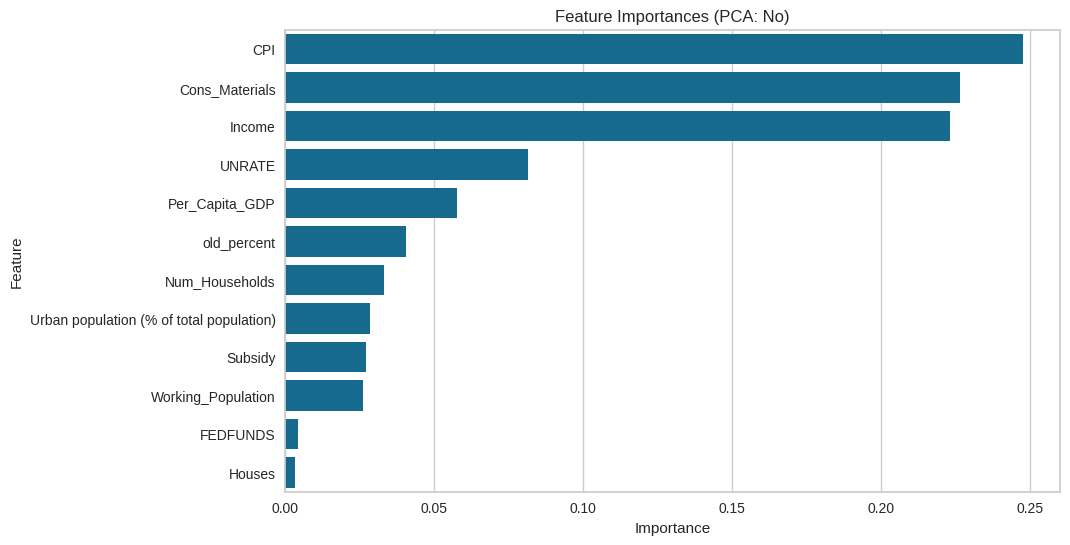

Residual Plot:


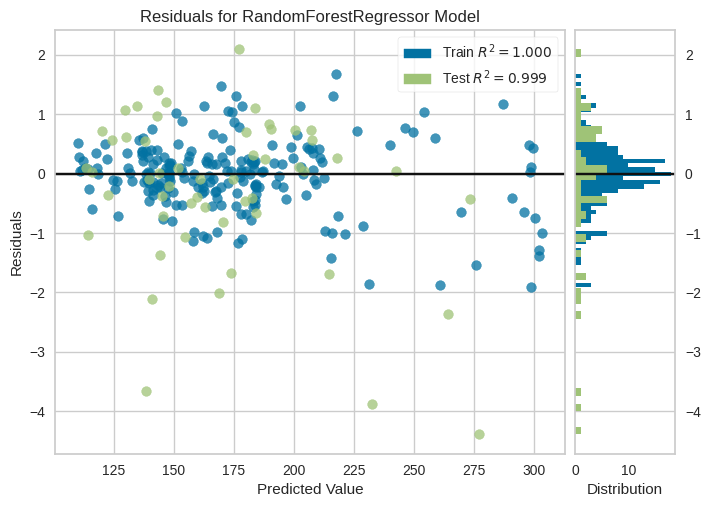

Predicted vs Actual Plot:


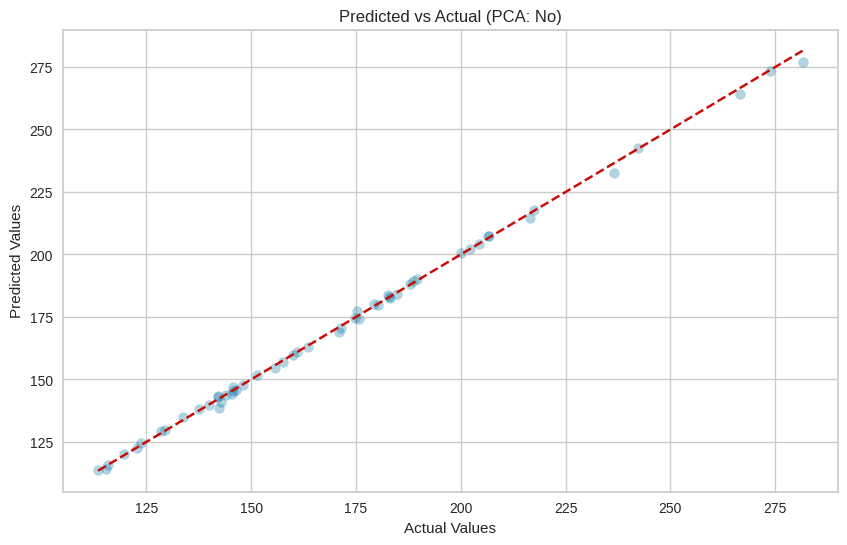

Best Model: XGBRegressor (PCA: No)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Feature Importances:


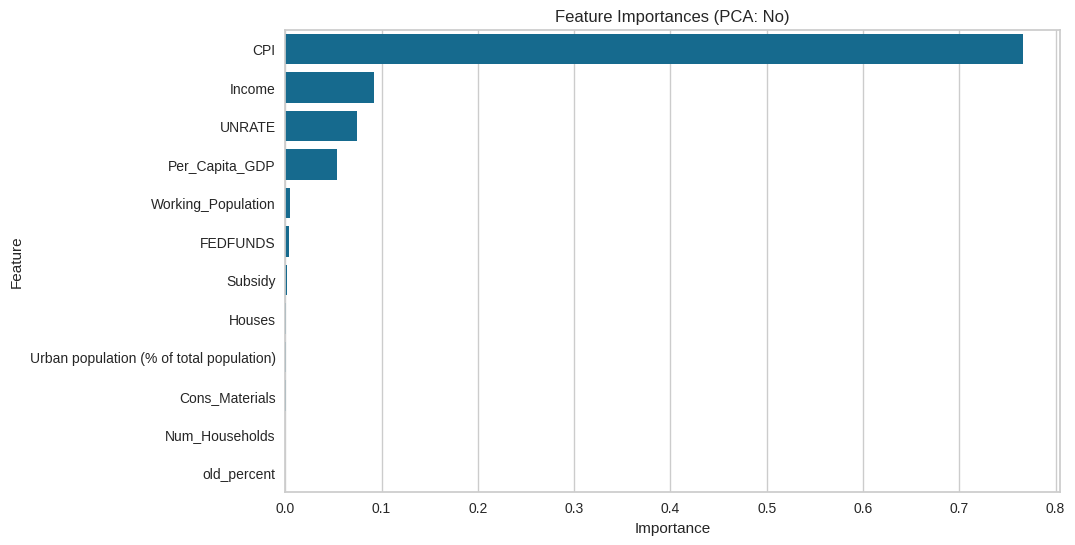

Residual Plot:


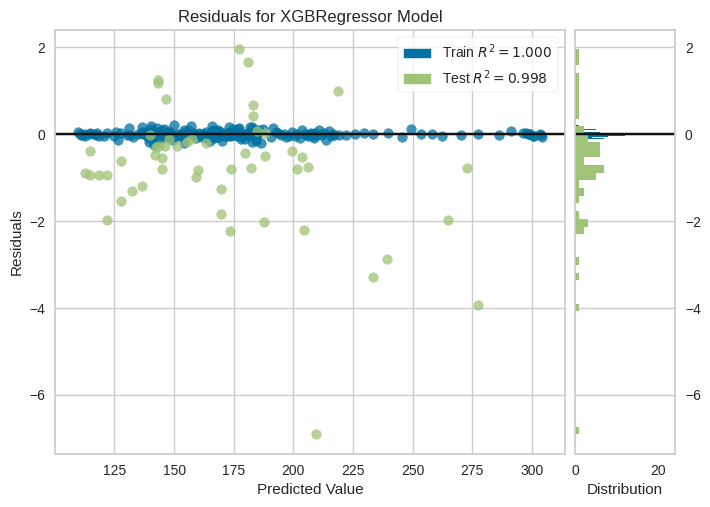

Predicted vs Actual Plot:


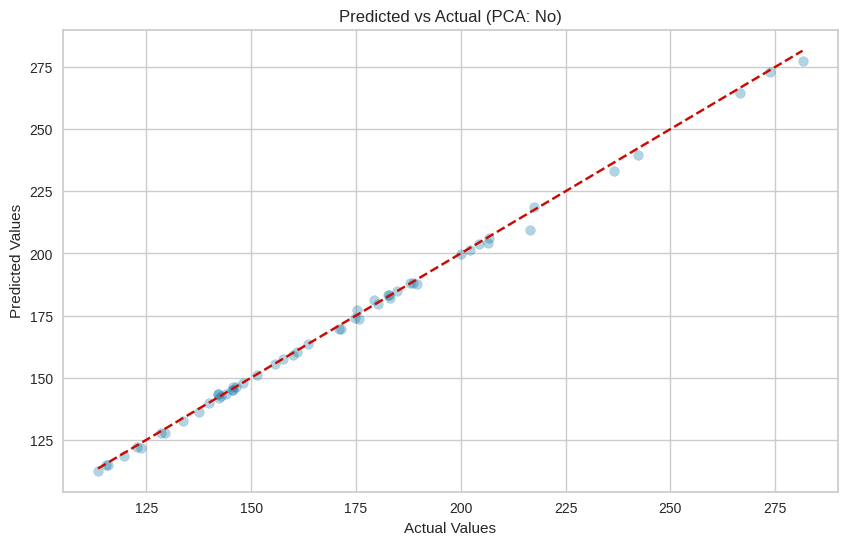

Best Model: LinearRegression (PCA: Yes)
LinearRegression()
Feature Importances:


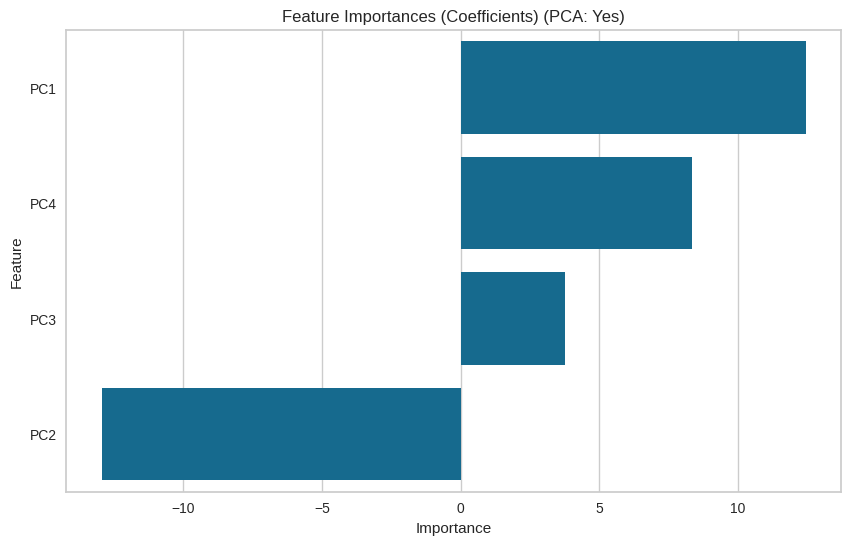

Residual Plot:


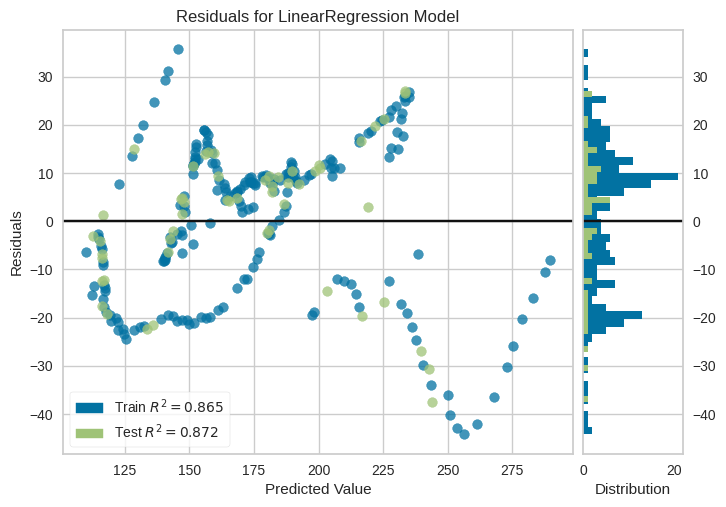

Predicted vs Actual Plot:


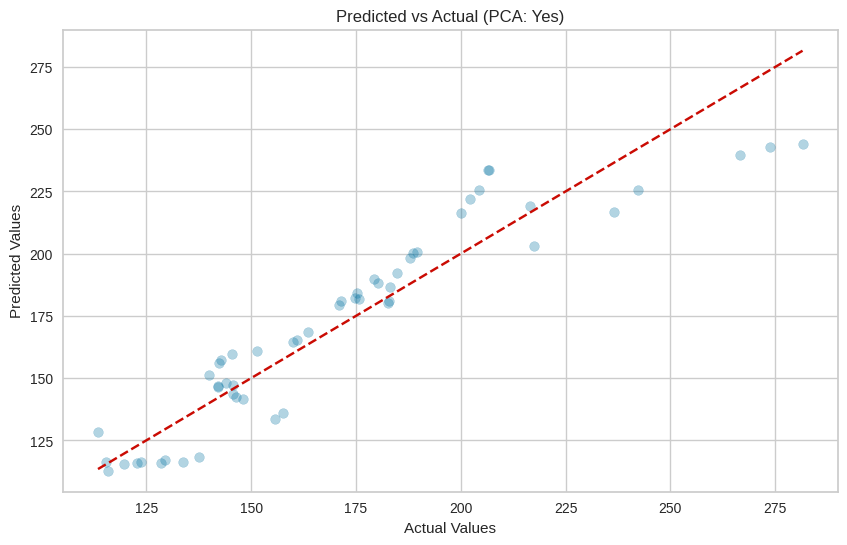

Best Model: Ridge (PCA: Yes)
Ridge(alpha=5.0)
Feature Importances:


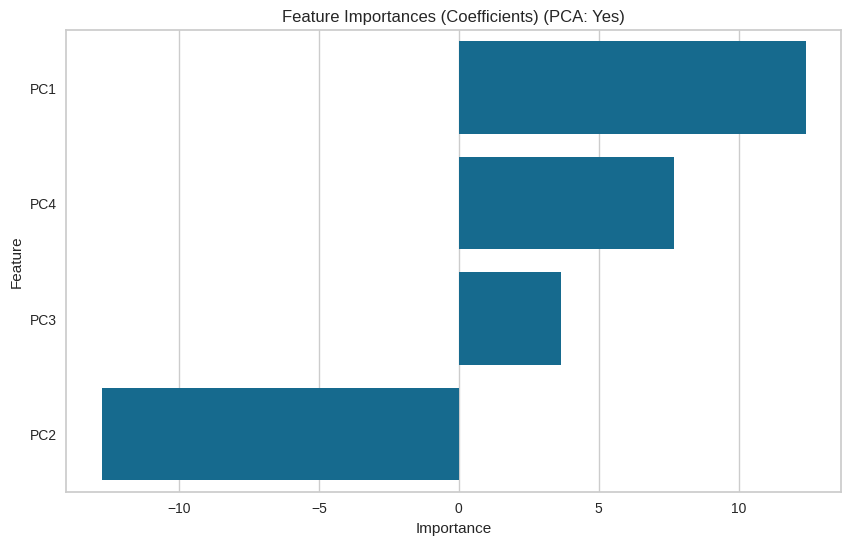

Residual Plot:


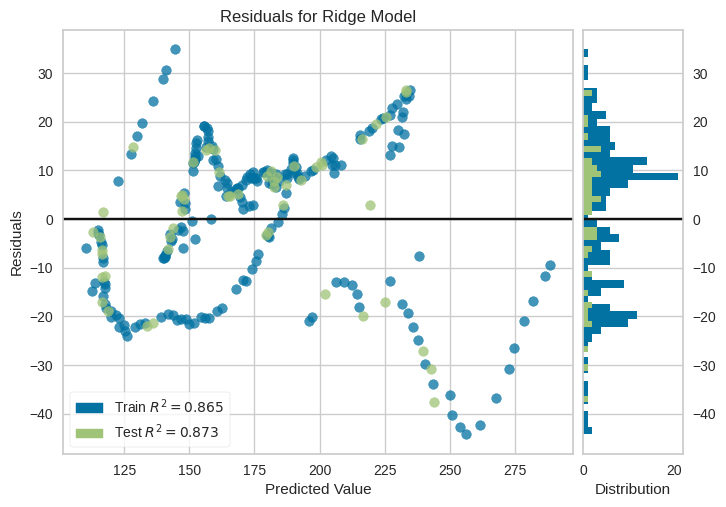

Predicted vs Actual Plot:


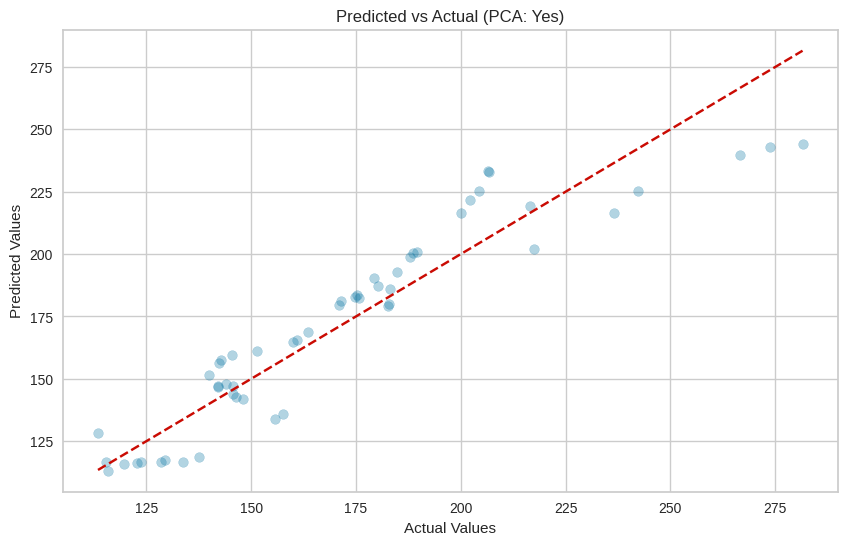

Best Model: Lasso (PCA: Yes)
Lasso(alpha=0.1)
Feature Importances:


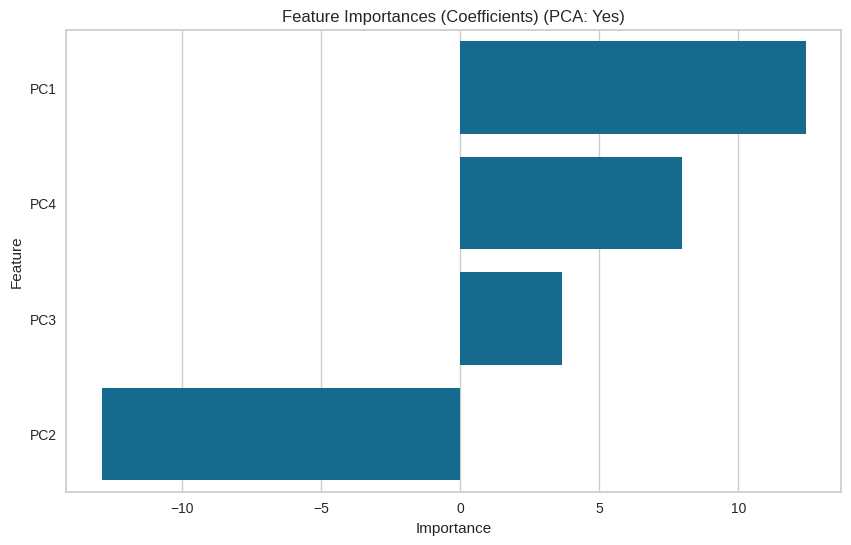

Residual Plot:


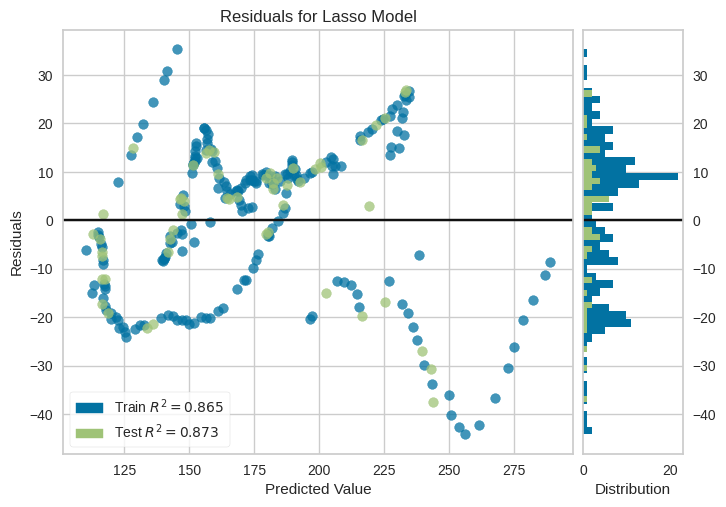

Predicted vs Actual Plot:


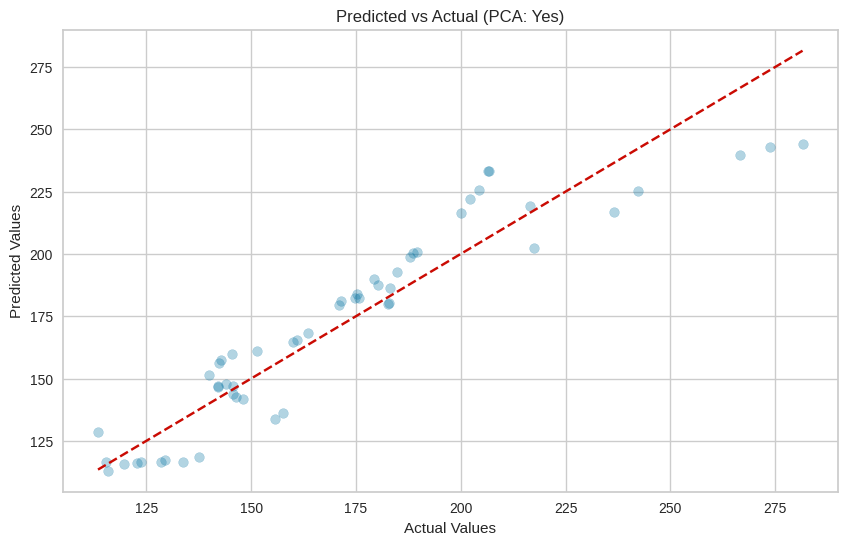

Best Model: ElasticNet (PCA: Yes)
ElasticNet(alpha=0.1, l1_ratio=0.9)
Feature Importances:


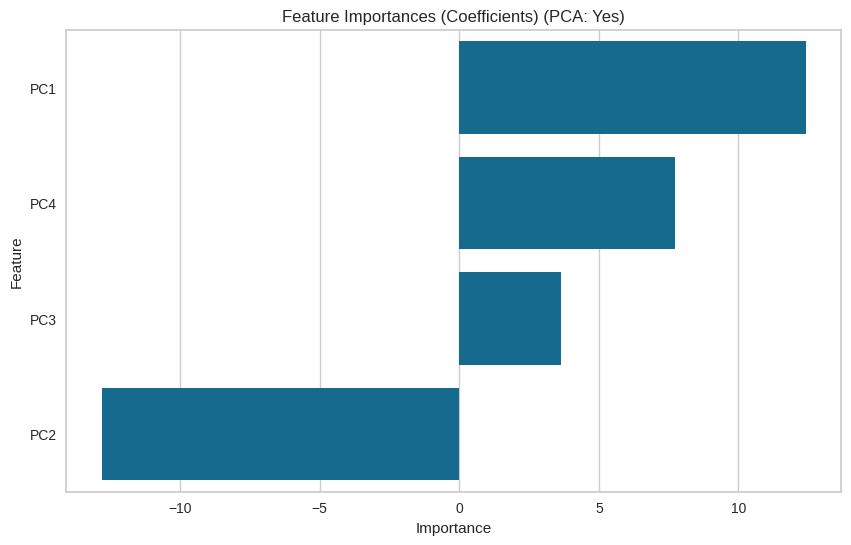

Residual Plot:


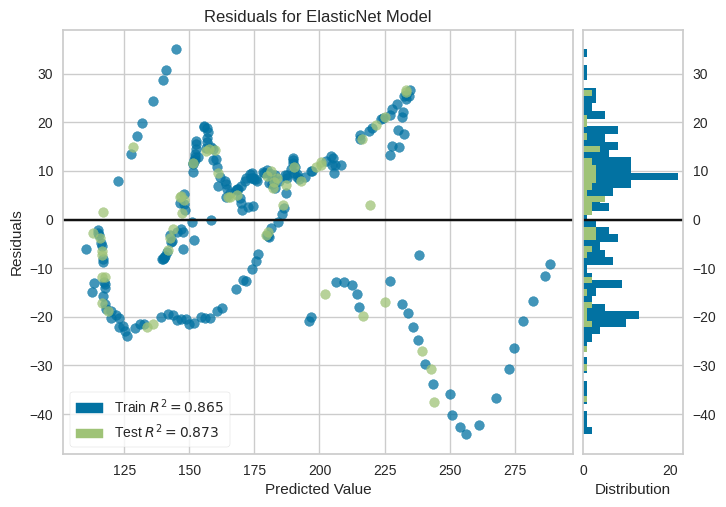

Predicted vs Actual Plot:


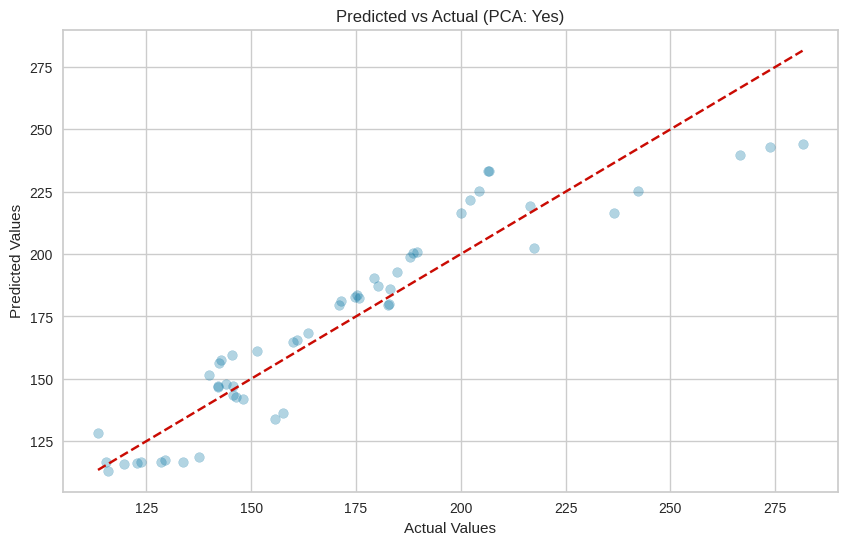

Best Model: SVR (PCA: Yes)
SVR(C=10)
Feature Importances:
Model does not have feature importances.
Residual Plot:


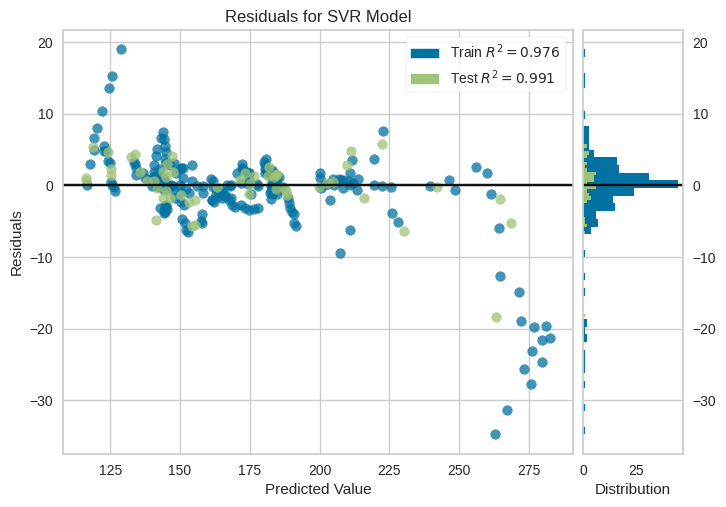

Predicted vs Actual Plot:


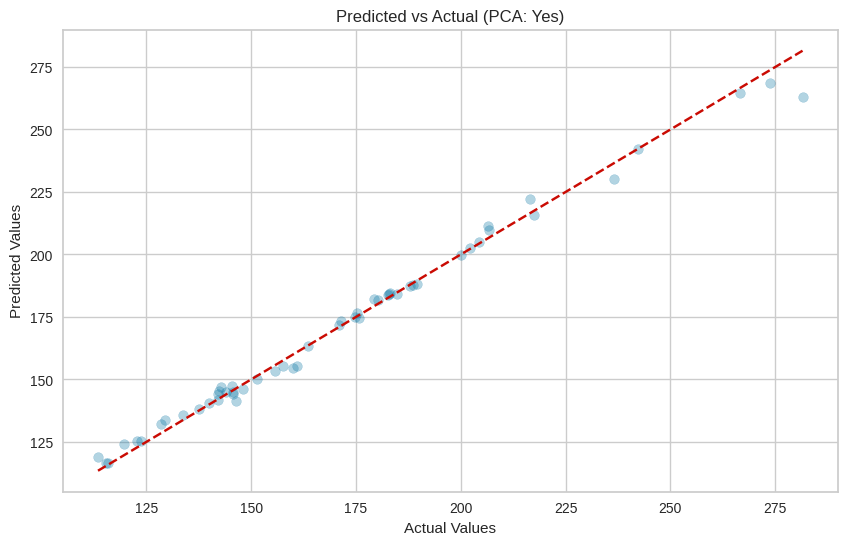

Best Model: RandomForestRegressor (PCA: Yes)
RandomForestRegressor(max_depth=20)
Feature Importances:


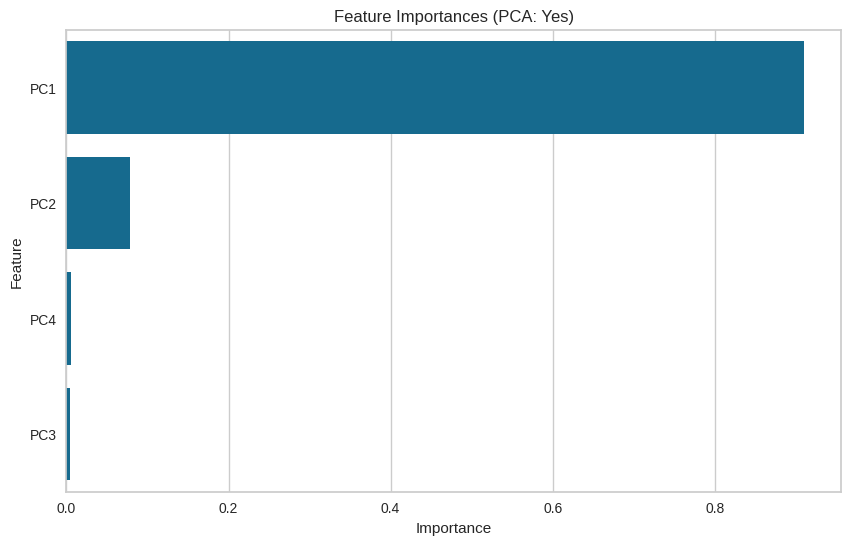

Residual Plot:


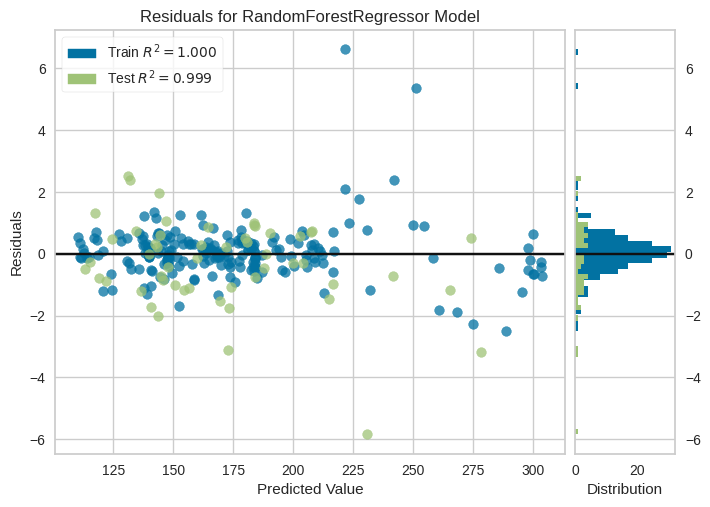

Predicted vs Actual Plot:


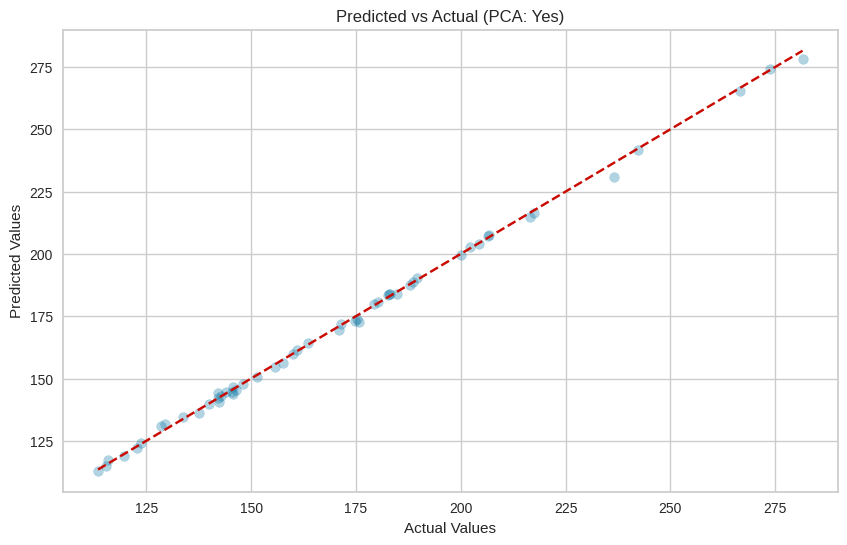

Best Model: XGBRegressor (PCA: Yes)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Feature Importances:


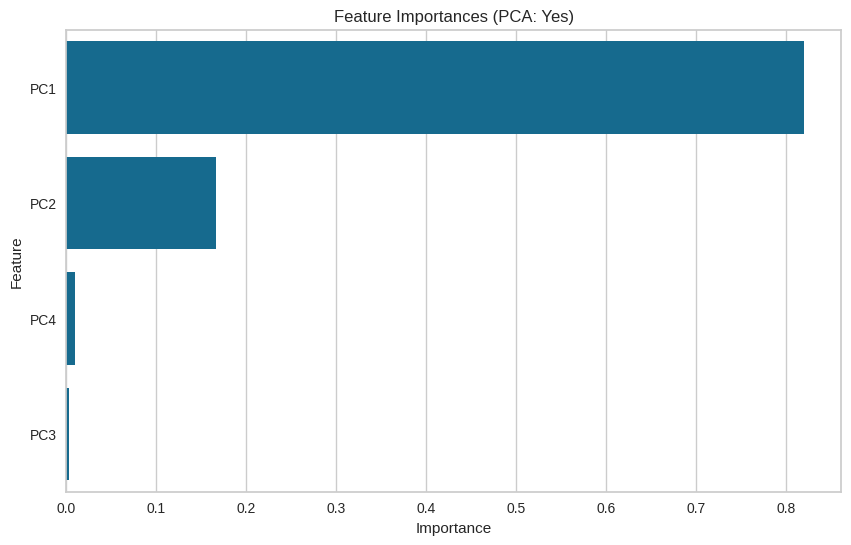

Residual Plot:


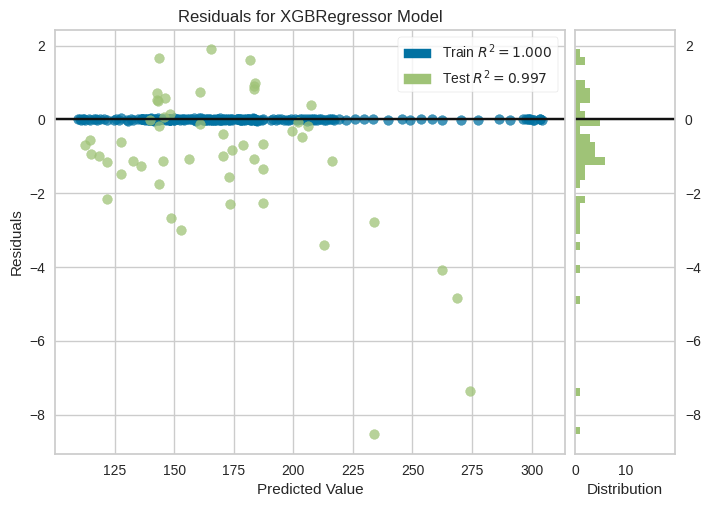

Predicted vs Actual Plot:


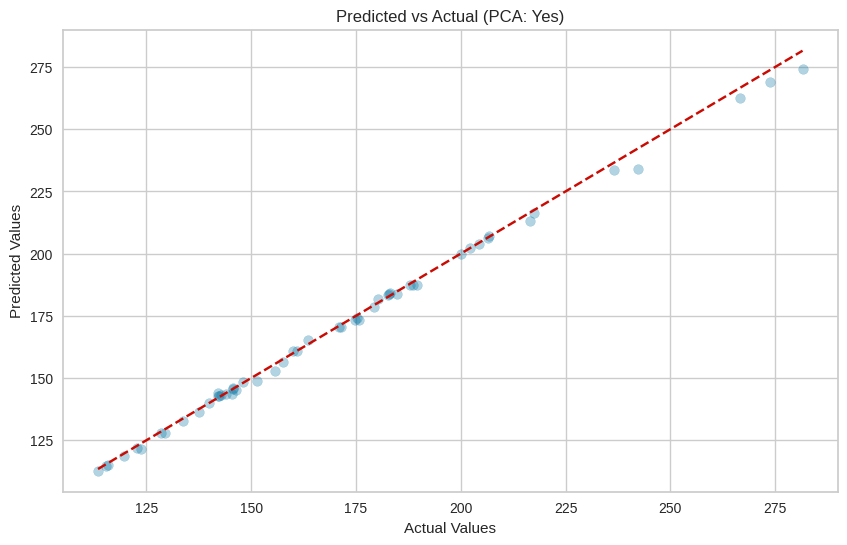

In [163]:
# Assuming X and y are the original features and target
X_train, X_valid, y_train, y_valid = split_data(X, y)
X_train_pca_, X_valid_pca_, y_train_pca_, y_valid_pca_ = split_data(X_pca_, y)

# Models and parameter grids to evaluate
models_and_params = [
    (LinearRegression(), {}),
    (Ridge(), {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}),
    (Lasso(), {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}),
    (ElasticNet(), {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.7, 0.9]}),
    (SVR(), {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}),
    (RandomForestRegressor(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}),
    (XGBRegressor(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}),
]

# Evaluate models on Box-Cox transformed data
results, best_models = evaluate_models(models_and_params, X_train, y_train, X_valid, y_valid, X_train_pca_, X_valid_pca_)

# Create DataFrame from results
results_df= pd.DataFrame(results)

# Extract and display the best models
for model_info in best_models:
    print(f"Best Model: {model_info['Model']} (PCA: {model_info['PCA']})")
    best_model = model_info['Best Model']
    print(best_model)

    # Plot feature importances if possible
    print("Feature Importances:")
    if model_info['PCA'] == 'No':
        feature_names = df.columns.tolist()
    else:
        feature_names = [f'PC{i+1}' for i in range(X_train_pca_.shape[1])]
    plot_feature_importances(best_model, feature_names, title_suffix=f"(PCA: {model_info['PCA']})")

    # Plot residuals if possible
    print("Residual Plot:")
    if model_info['PCA'] == 'No':
        plot_residuals(best_model, X_train, y_train, X_valid, y_valid, title_suffix=f"(PCA: {model_info['PCA']})")
    else:
        plot_residuals(best_model, X_train_pca_, y_train_pca_, X_valid_pca_, y_valid_pca_, title_suffix=f"(PCA: {model_info['PCA']})")

    # Plot predicted vs actual values
    print("Predicted vs Actual Plot:")
    if model_info['PCA'] == 'No':
        plot_predicted_vs_actual(best_model, X_valid, y_valid, title_suffix=f"(PCA: {model_info['PCA']})")
    else:
        plot_predicted_vs_actual(best_model, X_valid_pca_, y_valid_pca_, title_suffix=f"(PCA: {model_info['PCA']})")


In [164]:
results_df_transformed

Model  PCA  R2 Score  Cross Validation Score  \
0        LinearRegression   No  0.965166                0.940674   
1                   Ridge   No  0.967581                0.942714   
2                   Lasso   No -0.013901               -0.012851   
3              ElasticNet   No -0.013901               -0.012851   
4                     SVR   No -0.000584               -0.018415   
5   RandomForestRegressor   No  0.998449                0.997529   
6            XGBRegressor   No  0.996603                0.987858   
7        LinearRegression  Yes  0.853513                0.805603   
8                   Ridge  Yes  0.853350                0.805628   
9                   Lasso  Yes -0.013901               -0.012851   
10             ElasticNet  Yes -0.013901               -0.012851   
11                    SVR  Yes -0.000584               -0.018415   
12  RandomForestRegressor  Yes  0.998466                0.996581   
13           XGBRegressor  Yes  0.994333                0.988686   

                                      Best Parameters  
0                                                  {}  
1                                      {'alpha': 0.5}  
2                                      {'alpha': 0.1}  
3                     {'alpha': 0.1, 'l1_ratio': 0.1}  
4    {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}  
5              {'max_depth': 30, 'n_estimators': 200}  
6   {'learning_rate': 0.1, 'max_depth': 7, 'n_esti...  
7                                                  {}  
8                                      {'alpha': 5.0}  
9                                      {'alpha': 0.1}  
10                    {'alpha': 0.1, 'l1_ratio': 0.1}  
11   {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}  
12              {'max_depth': 20, 'n_estimators': 50}  
13  {'learning_rate': 0.2, 'max_depth': 5, 'n_esti...

In [165]:
results_df

Model  PCA  R2 Score  Cross Validation Score  \
0        LinearRegression   No  0.963610                0.961556   
1                   Ridge   No  0.967146                0.960501   
2                   Lasso   No  0.970347                0.958988   
3              ElasticNet   No  0.973274                0.955511   
4                     SVR   No  0.994216                0.956680   
5   RandomForestRegressor   No  0.998911                0.997857   
6            XGBRegressor   No  0.998376                0.995624   
7        LinearRegression  Yes  0.872445                0.857936   
8                   Ridge  Yes  0.872997                0.858016   
9                   Lasso  Yes  0.872799                0.857889   
10             ElasticNet  Yes  0.872983                0.857922   
11                    SVR  Yes  0.991299                0.946900   
12  RandomForestRegressor  Yes  0.998722                0.996835   
13           XGBRegressor  Yes  0.996976                0.992480   

                                      Best Parameters  
0                                                  {}  
1                                      {'alpha': 0.1}  
2                                      {'alpha': 0.1}  
3                     {'alpha': 0.1, 'l1_ratio': 0.9}  
4         {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}  
5            {'max_depth': None, 'n_estimators': 200}  
6   {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...  
7                                                  {}  
8                                      {'alpha': 5.0}  
9                                      {'alpha': 0.1}  
10                    {'alpha': 0.1, 'l1_ratio': 0.9}  
11       {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}  
12             {'max_depth': 20, 'n_estimators': 100}  
13  {'learning_rate': 0.1, 'max_depth': 7, 'n_esti...

# (H) Model Evaluation Summary

## Random Forest Regression (Best Model)

- **Transformation:** No PCA, No Box-Cox
- **Hyperparameters:** n_estimators = 100
- **R2 Score/cv-5:** 0.9977

## XGBoost Regression

- **Transformation:** PCA, Box-Cox
- **Hyperparameters:** learning_rate = 0.2, max_depth = 5, n_estimators = 50
- **R2 Score/cv-5:** 0.9943

## Linear Regression

- **Transformation:** PCA, Box-Cox (95% variance, 3 components)
- **R2 Scor/cv-5:** 0.8056
